# <center>TP 5 - Arbres de décision, forêts aléatoires et apprentissage d'ensemble</center>

# <center> Étude comparative d'apprentissage d'ensemble pour prédire le coronavirus Covid-19</center>


Nous utilisons le dataset covid-19 du TP n°3. Nous rappelons que ce dataset contient des données anonymes provenant de patients consultés à l'Hospital Israelita Albert Einstein de São Paulo au Brésil. Les échantillons ont été recueillis pour effectuer le RT-PCR du SRAS-CoV-2 et d'autres tests cliniques.

Toutes les données ont été rendues anonymes conformément aux meilleures pratiques et recommandations internationales. Elles sont aussi été standardisées pour avoir une moyenne nulle et un écart-type unitaire.

### Objectif:
Prédire si un patient est infecté en fonction des données cliniques disponibles.

## Plan 
[Importation des librairies essentielles](#section0)

[1. Analyse exploratoire de données](#section1) 



[2. Pré-traitement de données](#section2) 

  

[3. Modélisation](#section3) 
  
   

[4. Hyper-optimisation](#section4) 
 


<a id="section0"></a> 
# Importation des librairies essentielles

In [137]:
# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABRON
import seaborn as sns

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # normalisation des variables numériques
from sklearn.preprocessing import RobustScaler # normalisation des variables numériques
from sklearn.impute import SimpleImputer # imputation des valeurs manquantes
from sklearn.impute import KNNImputer # imputation des valeurs manquantes par la méthode KNN
from sklearn.feature_selection  import SelectKBest # sélectionner 
from sklearn. preprocessing import PolynomialFeatures 

# MODELES PREDICTIFS

## REGRESSION
from sklearn.linear_model import LogisticRegression # régréssion logistique

## SVM 
from sklearn.svm import LinearSVC # machines à vecteurs de support (linéaire)
from sklearn.svm import SVC # machines à vecteurs de support (non-linéaire)

## SGD
from sklearn.linear_model import SGDClassifier #  classifieurs (SVM, régression logistique, etc.) avec un algorithme SGD

## ARBRES, FORETS, APRRENTISSAGE D'ENSEMBLE
from sklearn.tree import DecisionTreeClassifier # arbres classification
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 

## KNN
from sklearn.neighbors import KNeighborsClassifier # KPP voisins

# VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # séparation des données en train et test set
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyperparamètres
from sklearn.model_selection import RandomizedSearchCV # tester arbitrairement plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION: METRIQUES DE CLASSIFICATION
from sklearn.metrics import accuracy_score # exactitude (accuracy)
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # matrice de confusion
## from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay # graphique de la matrice de confusion
from sklearn.metrics import classification_report # rapport pour le modèle de classification

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve #
from sklearn.metrics import f1_score, recall_score


# PIPELINE
from sklearn.pipeline import make_pipeline

# TRANSFORMATEUR COMPOSITE (PRE-PROCESSOR + MODELE)
from sklearn.compose import make_column_transformer


# WARNINGS
import warnings
warnings.filterwarnings('ignore')

<a id="section1"></a> 
# 1. Analyse exploratoire de données

<a id="section11"></a> 
# 1.1. Analyse de forme: description des variables

## 1.1.1. Chargement des données

In [138]:
# Système d'exploitation
import os
_REP_DATA_ = "G:/Dropbox/Perso/Mostafa/Ecole/UTC/UVs/AI28/git/ai28-azzouz-ghalia-traineau/TP5/data/" # chemin d'accès au dataset
_REP_DATA_COVID_ = os.path.join(_REP_DATA_, 'covid-19.xlsx')

# afficher le répertoire du dataset
print("Répertoire du dataset:", _REP_DATA_COVID_)

Répertoire du dataset: G:/Dropbox/Perso/Mostafa/Ecole/UTC/UVs/AI28/git/ai28-azzouz-ghalia-traineau/TP5/data/covid-19.xlsx


In [139]:
data = pd.read_excel(_REP_DATA_COVID_)
df_covid = data.copy()

In [140]:
# Vue d'ensemble des données
## Afficher les 2 premières lignes du dataset
df_covid.head(2)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    NaN                    NaN   
1    not_detected               detected                    NaN   

  Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae    Adenovirus  \
0              NaN             NaN                      NaN           NaN   
1     not_detected    not_detected             not_detected  not_detected   

  Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
0             NaN             NaN             NaN             NaN   
1    not_detected    not_detected    not_detected    not_detected   

  Bordetella pertussis Metapneumovirus Parainfluenza 2  Neutrophils      Urea  \
0                  NaN             NaN             NaN          NaN       NaN   
1         not_detected    not_detected    not_detected    -0.619086  1.198059   

   Proteina C reativa mg/dL  Creatinine  Potassium    Sodium  \
0                       NaN         NaN        NaN       NaN   
1                 -0.147895    2.089928  -0.305787  0.862512   

  Influenza B, rapid test Influenza A, rapid test  Alanine transaminase  \
0                     NaN                     NaN                   NaN   
1                negative                negative                   NaN   

   Aspartate transaminase  Gamma-glutamyltransferase   Total Bilirubin  \
0                     NaN                         NaN              NaN   
1                     NaN                         NaN              NaN   

   Direct Bilirubin  Indirect Bilirubin  Alkaline phosphatase  \
0               NaN                 NaN                   NaN   
1               NaN                 NaN                   NaN   

   Ionized calcium  Strepto A  Magnesium  pCO2 (venous blood gas analysis)  \
0               NaN       NaN        NaN                               NaN   
1               NaN       NaN        NaN                               NaN   

   Hb saturation (venous blood gas analysis)  \
0                                        NaN

In [141]:
## Afficher les 2 dernières lignes du dataset
df_covid.tail(2)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
5642          NaN                                               NaN   
5643    -0.295726                                         -0.353319   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
5642         NaN        NaN                                NaN          NaN   
5643   -1.288428  -1.140144                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
5642                            NaN        NaN   
5643                       0.025985   0.567652   

      Red blood cell distribution width (RDW)  Serum Glucose  \
5642                                      NaN            NaN   
5643                                 -0.18279            NaN   

     Respiratory Syncytial Virus Influenza A Influenza B Parainfluenza 1  \
5642                         NaN         NaN         NaN             NaN   
5643                         NaN         NaN         NaN             NaN   

     CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
5642             NaN                    NaN                    NaN   
5643             NaN                    NaN                    NaN   

     Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae Adenovirus  \
5642              NaN             NaN                      NaN        NaN   
5643              NaN             NaN                      NaN        NaN   

     Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009  \
5642             NaN             NaN             NaN             NaN   
5643             NaN             NaN             NaN             NaN   

     Bordetella pertussis Metapneumovirus Parainfluenza 2  Neutrophils  \
5642                  NaN             NaN             NaN          NaN   
5643                  NaN             NaN             NaN     0.380685   

          Urea  Proteina C reativa mg/dL  Creatinine  Potassium    Sodium  \
5642       NaN                       NaN         NaN        NaN       NaN   
5643  0.453725                  -0.50357   -0.735872  -0.552949 -0.934388   

     Influenza B, rapid test Influenza A, rapid test  Alanine transaminase  \
5642                     NaN                     NaN                   NaN   
5643                     NaN                     NaN              -0.28361   

      Aspartate transaminase  Gamma-glutamyltransferase   Total Bilirubin  \
5642                     NaN                         NaN              NaN   
5643                0.108761                   -0.420454        -0.480996   

      Direct Bilirubin  Indirect Bilirubin  Alkaline phosphatase  \
5642               NaN                 NaN                   NaN   
5643         -0.586463           -0.278654             -0.243405   

      Ionized calcium  Strepto A  Magnesium  pCO2 (venous blood gas analysis)  \
5642               NaN       NaN        NaN                               NaN   
5643               NaN     

In [142]:
# Afficher les noms de toutes les colonnes 
df_covid.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

## 1.1.2. Dimensions des données

In [143]:
# Identifier les nombres de lignes et de colonnes (n_samples, n_features)
n_samples, n_features = df_covid.shape
print("Nombre de lignes (samples): %s" %n_samples)
print("Nombre de colonnes (features): %s" %n_features)

Nombre de lignes (samples): 5644
Nombre de colonnes (features): 111


## 1.1.3. Types des variables

In [144]:
# Identifier les types de variables
# Pour un grand jeu de données il est préférable d'utiliser la fonction dtypes de pandas
df_covid.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [145]:
# Pour savoir combien on a de variables de chaque type, on utilise la méthode 
df_covid.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

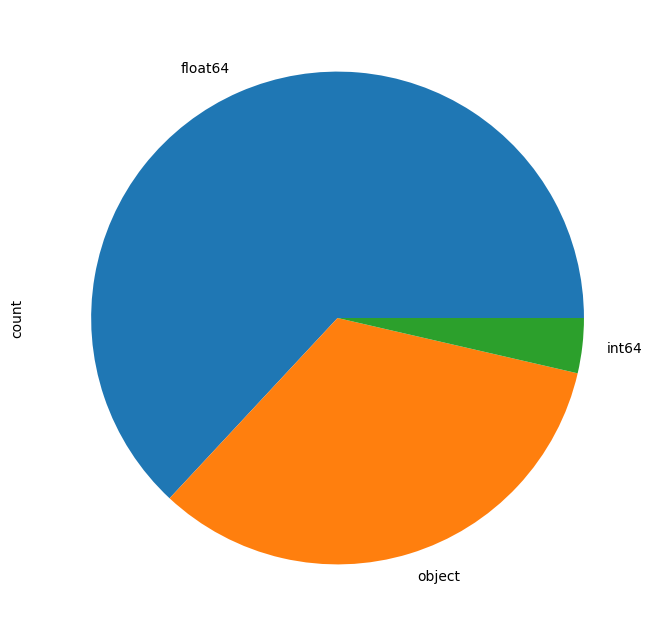

In [146]:
# On peut utiliser un graphique pour afficher les pourcentages des types de variables
plt.figure(figsize=(26, 8))
df_covid.dtypes.value_counts().plot.pie(); 

<font color='red'>**Interprétation:**</font> 
 - Les variables de type float  sont quantitatives.
 - Les varaibles de type object qont qualitatives.

## 1.1.4. Visualisation des valeurs manquantes

In [147]:
# Pour traiter les valuers manquantes, vérifier si une valeur est NaN
df_covid.isna()[:2] # retourne un tableau boléen

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0       False                 False                   False   
1       False                 False                   False   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                           False   
1                                           False   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                              False       
1                                              False       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                              False            True   
1                                              False           False   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        True       True                   True             True         True   
1       False      False                  False            False        False   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                              True        True       True   
1                                             False       False      False   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                               True         True   
1                              False        False   

   Mean corpuscular volume (MCV)  Monocytes  \
0                           True       True   
1                          False      False   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                     True           True   
1                                    False          False   

   Respiratory Syncytial Virus  Influenza A  Influenza B  Parainfluenza 1  \
0                         True         True         True             True   
1                        False        False        False            False   

   CoronavirusNL63  Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             True                    True                   True   
1            False                   False                   True   

   Coronavirus HKU1  Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  \
0              True             True                      True        True   
1             False            False                     False       False   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0             True             True             True             True   
1            False            False            False            False   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  Neutrophils   Urea  \
0                  True             True             True         True   True   
1                 False            False            False        False  False   

   Proteina C reativa mg/dL  Creatinine  Potassium  Sodium  \
0                      True        True       True    True   
1                     False       False      False   False   

   Influenza B, rapid test  Influenza A, rapid test  Alanine transaminase  \
0                     True                     True                  True   
1                    False                    False                  True   

   Aspartate transaminase  Gamma-glutamyltransferase   Total Bilirubin  \
0                    True                        True             True   
1                    True                        True             True   

   Direct Bilirubin  Indirect Bilirubin  Alkaline phosphatase  \
0              True                True                  True   
1              True                True                  True   

   Ionized calcium   Strepto A  Magnesium  pCO2 (venous blood gas analysis)  \
0              True       True       True                              True   
1              True       True       True                              True   

   Hb saturation (venous blood gas analysis)  \
0                          

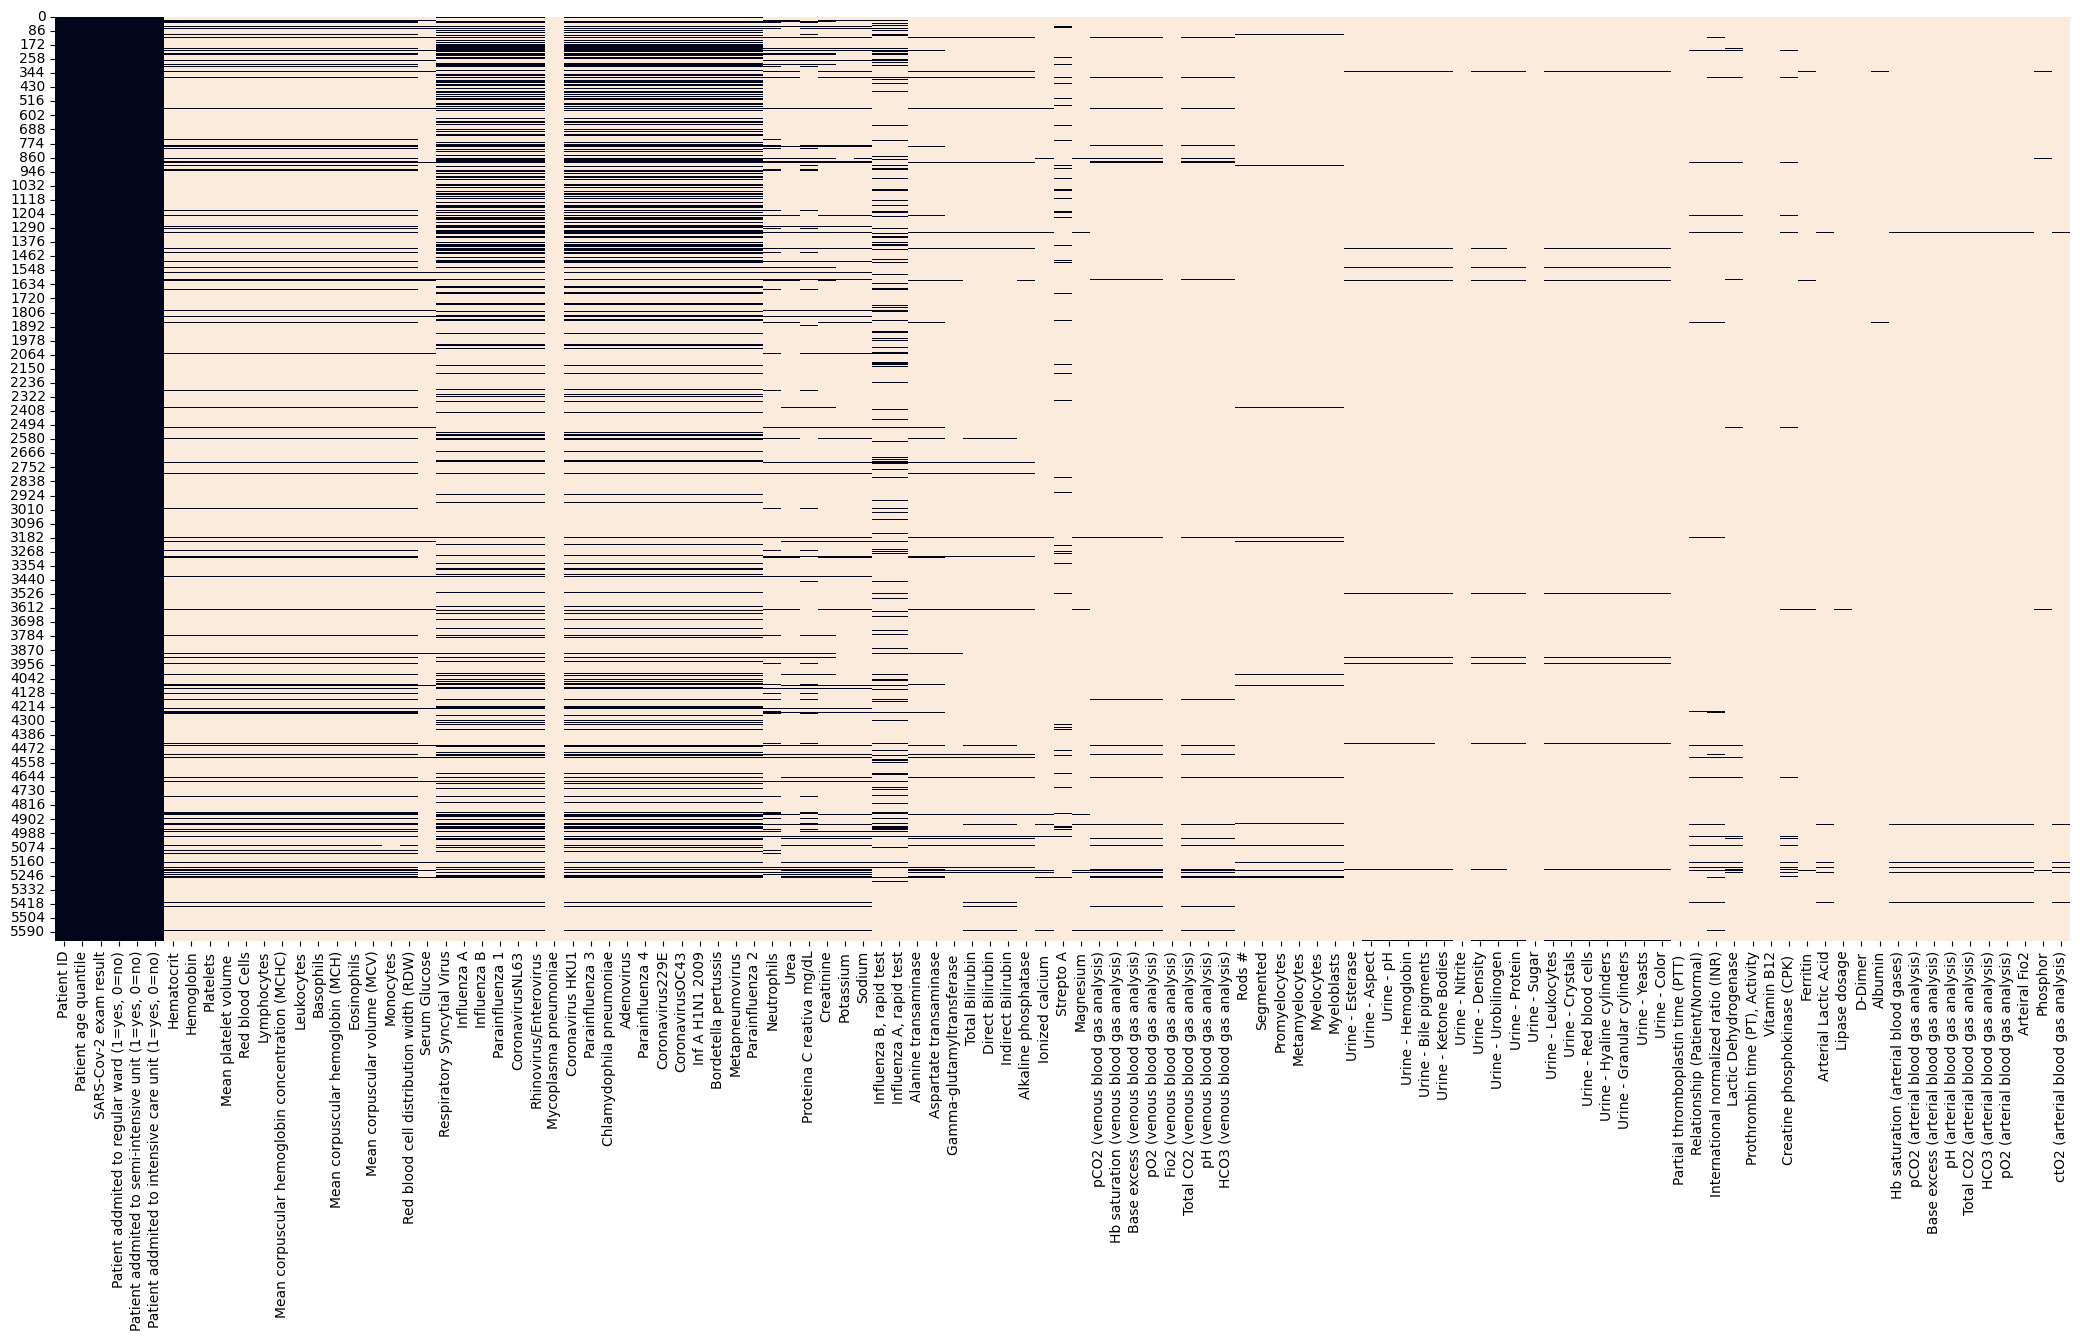

In [148]:
# Afficher avec seaborn
plt.figure(figsize=(26, 12))
sns.heatmap(df_covid.isna(), cbar=False)
plt.show()

In [149]:
# Mesurer le poucentage des valeurs manquantes
df_covid.isna().sum() # sum de toutes les valeurs manquantes dans chaque colonne

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [150]:
# Pourcentage
miss_rates = df_covid.isna().sum() /  n_samples
miss_rates

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [151]:
# Trier le pourcentage des valeurs manquantes dans l'ordre croissant
(df_covid.isna().sum() /  n_samples).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Élimination des colonnes remplies de vide

Pour la suite de notre analyse exploratoire, nous allons éliminer toutes les variables ayant un pourcentage des valeurs manquantes qui dépasse $90\%$. 

In [152]:
# Élimination des colonnes remplies de vides
# indexation booléenne
df_covid.columns[df_covid.isna().sum()/n_samples  < 0.9]

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'In

In [153]:
# On passe de 111 à 39 colonnes
df_covid[df_covid.columns[df_covid.isna().sum()/n_samples  < 0.9]].head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [154]:
# On réécrit notre dataframe 
df_covid = df_covid[df_covid.columns[df_covid.isna().sum()/n_samples  < 0.9]]
df_covid.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

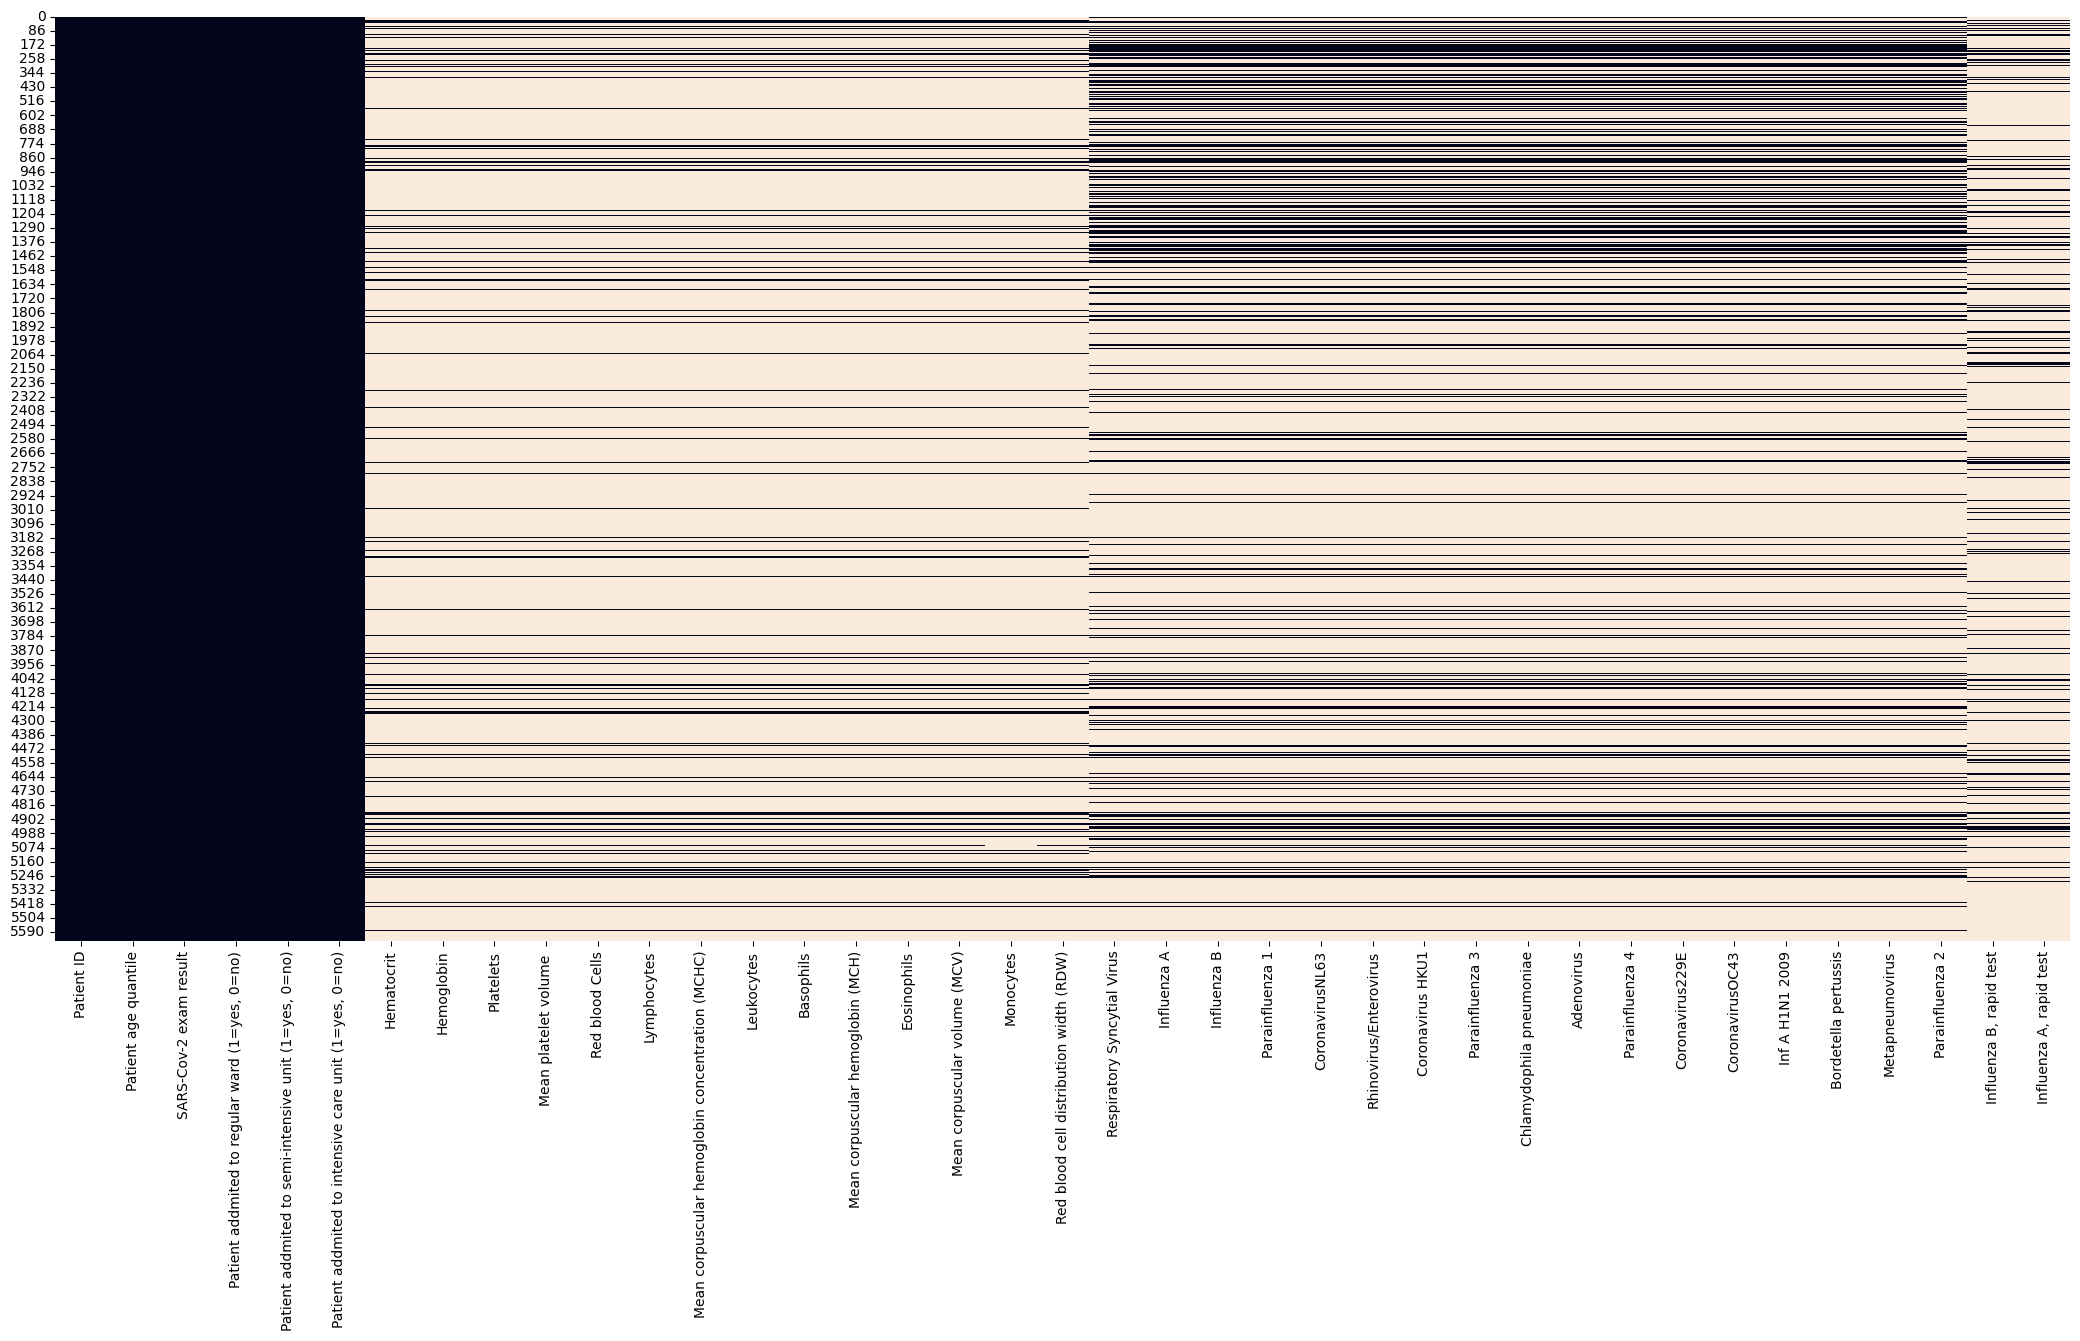

In [155]:
# On réaffiche le tableau avec le heatmap de seaborn
plt.figure(figsize=(26, 12))
sns.heatmap(df_covid.isna(), cbar=False)
plt.show()

In [156]:
# On élimine le numéro du patient (Patiend ID) (il ne sert à rien)
df_covid = df_covid.drop('Patient ID', axis=1)

In [157]:
(df_covid.isna().sum() /  n_samples).sort_values(ascending=True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Metapneumovirus                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainfluenza 3                                          0.760454
Coronaviru

<font color='red'>**Interprétation:**</font> 

- On remarque que la première variable **Patient age quantile** et notre variables cible **SARS-Cov-2 exam result** n'ont aucune valeur manquante. 

- Nous constatons qu'on un groupe de variables qui sont toutes à $76\%$ de valeurs manquantes à savoir les variables: **Influenza B, Influenza A, Respiratory Syncytial Virus, Parainfluenza 2, Bordetella pertussis, Inf A H1N1 2009, CoronavirusOC43, Coronavirus229E, Parainfluenza 4, Adenovirus, Chlamydophila pneumoniae, Parainfluenza 3, Coronavirus HKU1, Rhinovirus/Enterovirus, Metapneumovirus, CoronavirusNL63, Parainfluenza 1**. Il s'agit de variables catégorielles représentant des tests viraux.

- On voit aussi qu'il y a un deuxième groupe de variables qui ont approximativement $89\%$ de valeurs manquantes: **Hemoglobin, Hematocrit, Mean corpuscular volume (MCV), Eosinophils, Mean corpuscular hemoglobin (MCH), Basophils, Leukocytes, Mean corpuscular hemoglobin concentration (MCHC), Lymphocytes, Red blood Cells, Platelets, Red blood cell distribution width (RDW), Monocytes, Mean platelet volume**. Il s'agit des variables quantitatives représentant des taux sanguins.

In [158]:
# Vérifier
df_covid.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

<a id="section12"></a> 
# 1.2. Analyse univariée: signification des variables

## 1.2.1 Visualisation de la variable cible (target variable)

In [159]:
# Compter le nombre des cas postifs et le nombre des cas négatifs
df_covid['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

In [160]:
# On donc peut affirmer que nos classes ne sont pas équilibrées pour ce probléme
5086 / 558 # 9.11 % de cas postifs

9.114695340501791

In [161]:
# On peut l'afficher en terme de pourcentage 
df_covid['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

<font color='red'>**Interprétation:**</font> 

On peut affirmer que nos classes ne sont pas équilibrées (unbalanced classes) pour ce dataset. Il faudra prendre ceci en compte lors du choix de la métrique pour l'évaluation d'un algorithme de classification. Sinon, on pourrait procéder à des techniques propores aux problèmes de classes déséquilibres telles que le sous-échantillonnage. 

## 1.2.2. Histogrammes de valeurs continues


In [162]:
# Afficher toutes les variables continues
for col in df_covid.select_dtypes('float'):
    print(col)

Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


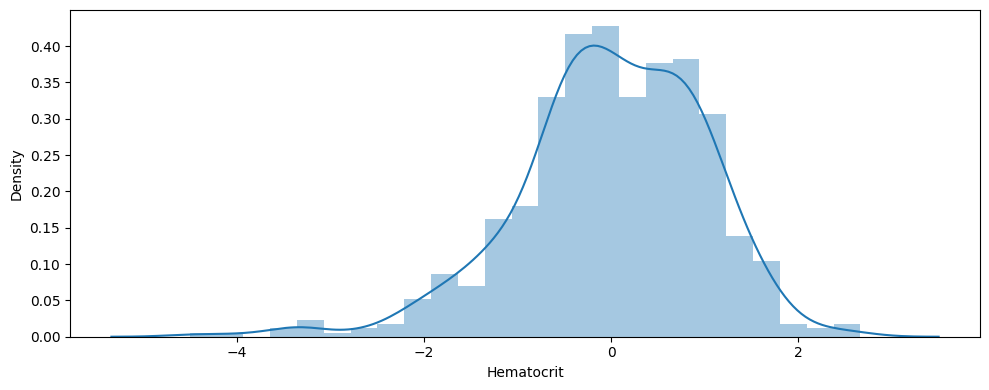

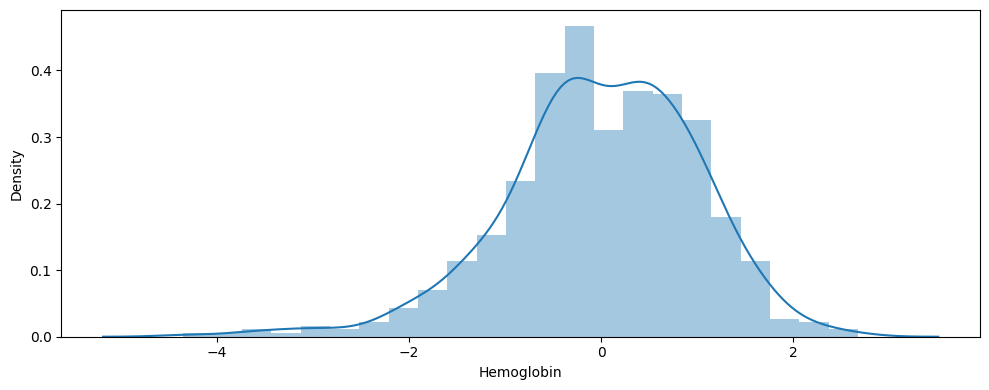

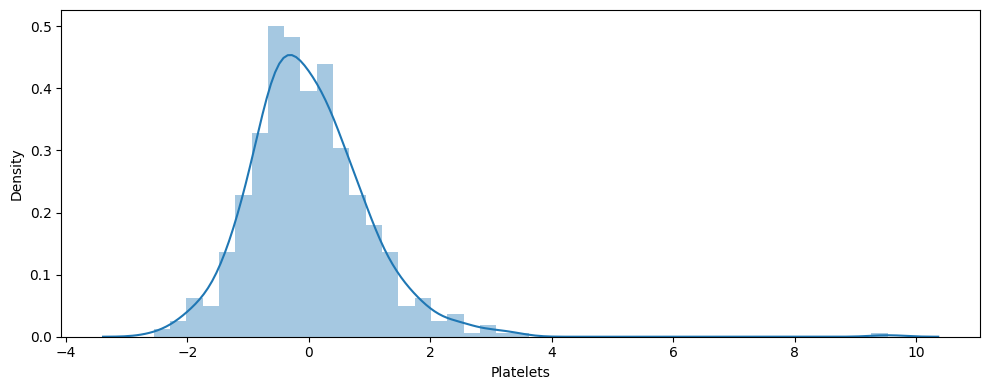

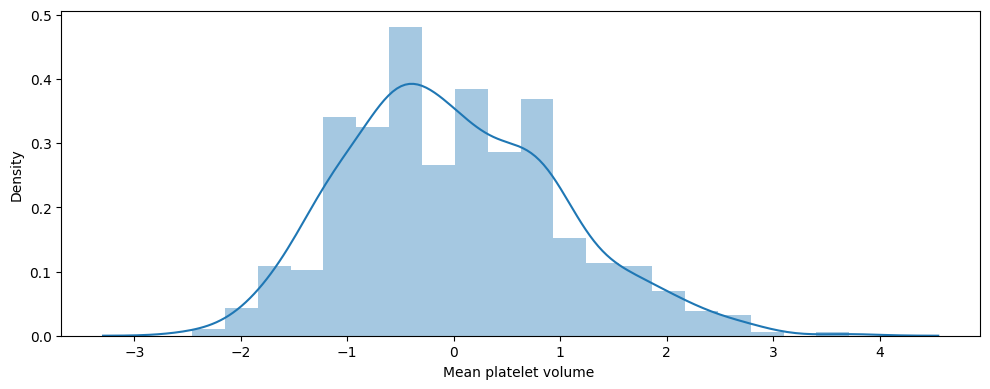

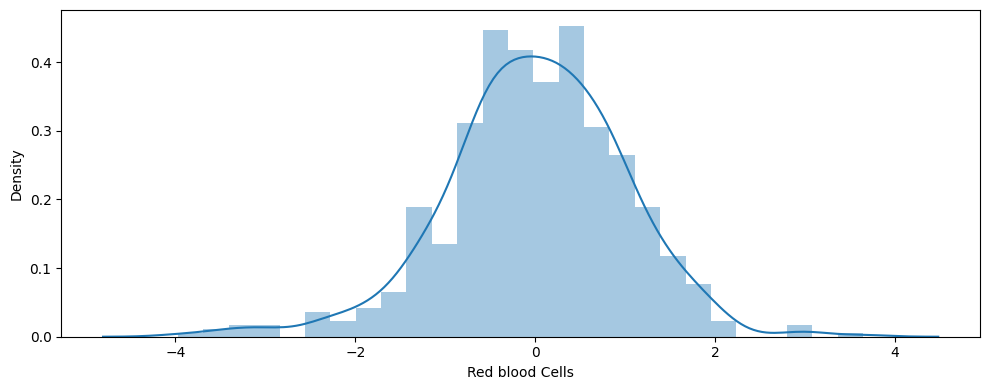

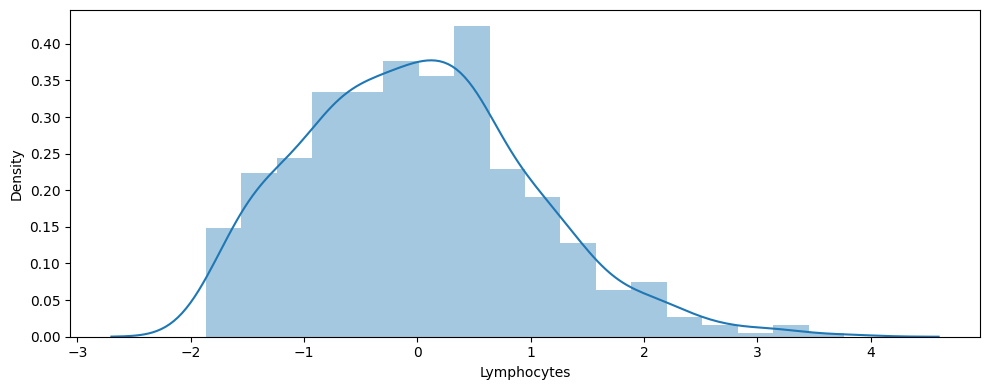

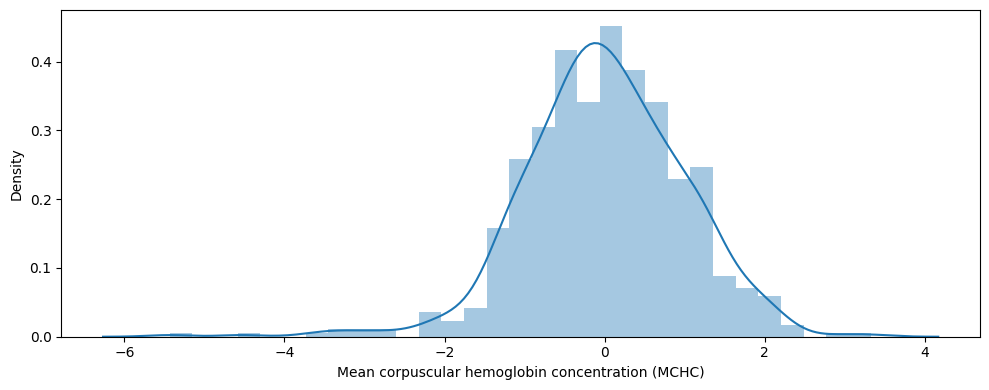

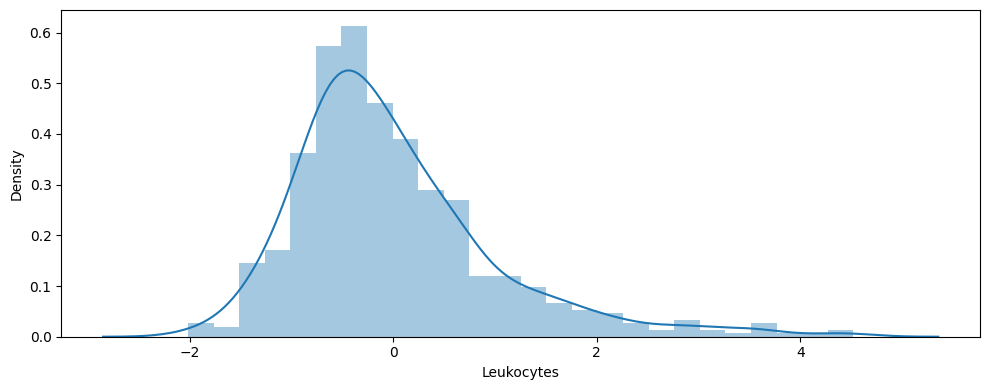

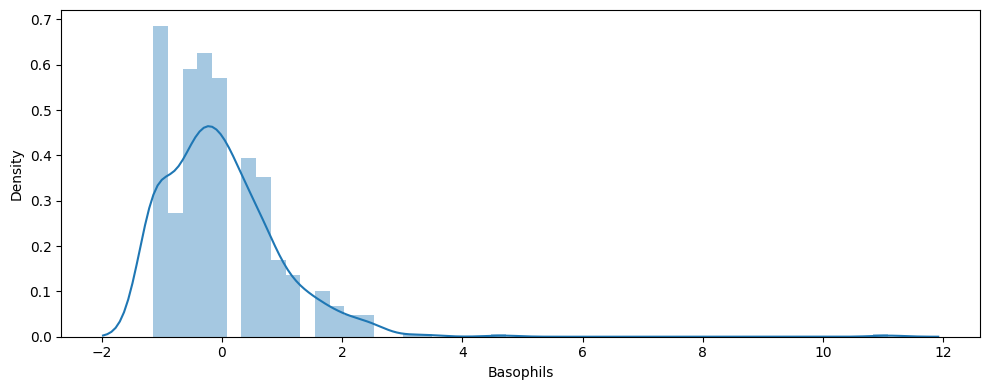

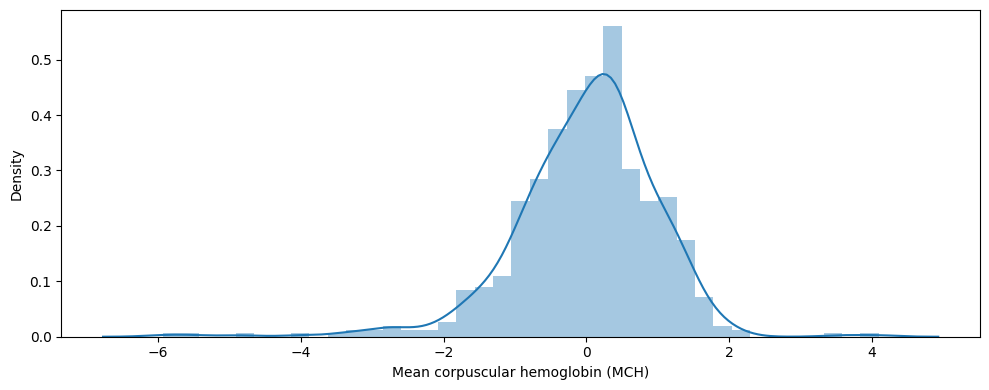

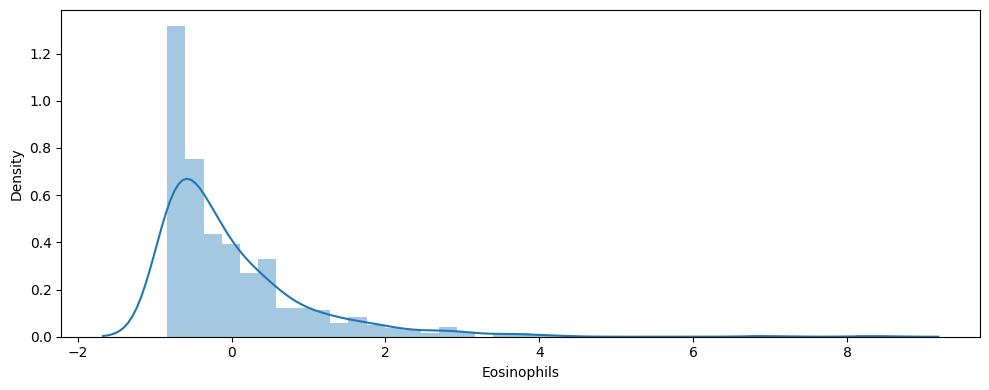

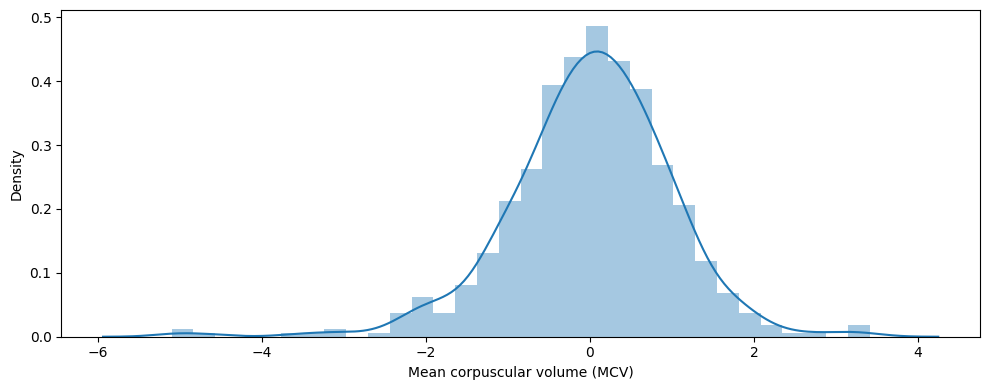

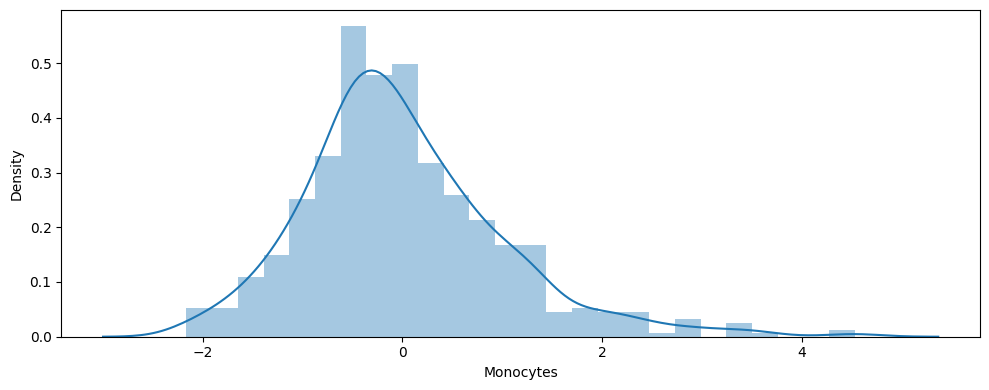

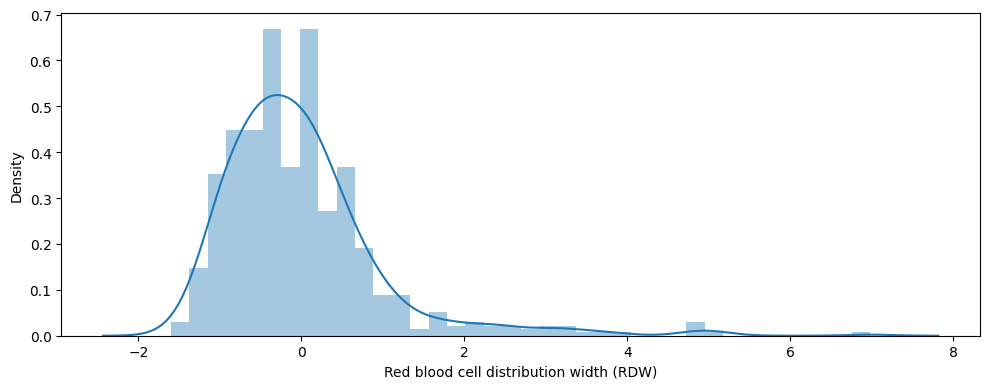

In [163]:
# Histogrammes: on utlise la fonction distplot de seaborn
for col in df_covid.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_covid[col])
    # plt.hist(df_covid[col], bins=20, alpha=1, density=True)
    plt.tight_layout()
    plt.show()

<font color='red'>**Interprétation:**</font> 

Avec les histogrammes on observe la répartition des de la distribution des données de chaque variable continue. Nous remarquons que la pluspart de ses variables suivent une distribution de moyenne nulle et d'éacrt type égal à $1$. Ce qui nous laisse immédiatemment comprendre que ces variables ont été standardisées. D'aures ont des distributions assymétriques. Pour certaines variables, nous pourrons tester s'il s'agissent des distributions gaussiennes en faisant des test statistiques de type test de conformité avec une loi normale, par exemple un test de Kolmogorov Smirnov.

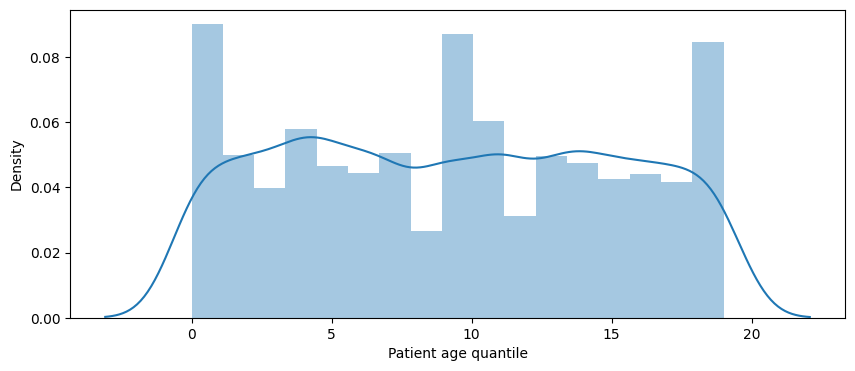

In [164]:
# Age quantile 
sns.distplot(df_covid['Patient age quantile'])
plt.show()

<font color='red'>**Interprétation:**</font> 

Pour la variable **Patient age quantile**, on pourrait penser qu'il s'agit de tranches d'âge: $0$ correspond aux individus qui sont entre $[0, 5]$ ans, $1$ correspond aux personnes qui ont entre $]5, 10]$ ans, etc... Toutefois, cette constation reste une simple hypothèse vu que nous n'avons pas assez d'informations sur cette variable. Nous pouvons aussi penser au fait que cette dernière a subi une transforamtion mathématique pour qu'elle figure sous cette forme de tranches d'âge. Enfin, il est difficle d'interpréter clairemetn le graphique de l'histogramme de cette variable car ses valeurs ont été traitées d'une manière inconnue.

## 1.2.3. Visulaliser les variables qualitatives 

### 1.2.3.1. Voir les différents modalités de chaque variable

In [165]:
# Vérifier les différentes catégories quirésident dans chaque variable
df_covid['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [166]:
for col in df_covid.select_dtypes('object'):
    print(col, df_covid[col].unique())

SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
Influenza B, rapid test [nan 'negative' 'positive']
Influenza A, rapid test [nan 'negative' 'positive']


In [167]:
# Petit astude d'affichage 
for col in df_covid.select_dtypes('object'):
    print(f'{col :-<70} {df_covid[col].unique()}') # créer un sytème de marge

SARS-Cov-2 exam result------------------------------------------------ ['negative' 'positive']
Respiratory Syncytial Virus------------------------------------------- [nan 'not_detected' 'detected']
Influenza A----------------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B----------------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1------------------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63------------------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------------------------------------ [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------------------------------------ [nan 'not_detected' 'detected']
Parainfluenza 3------------------------------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae---------------------------------------------- [nan 'not_

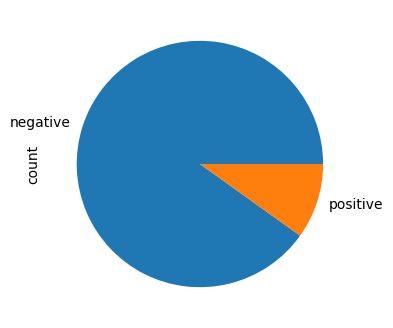

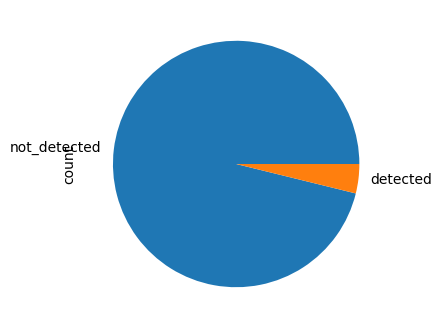

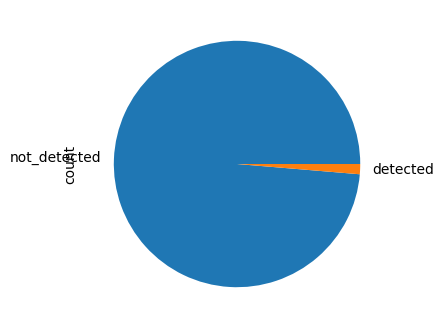

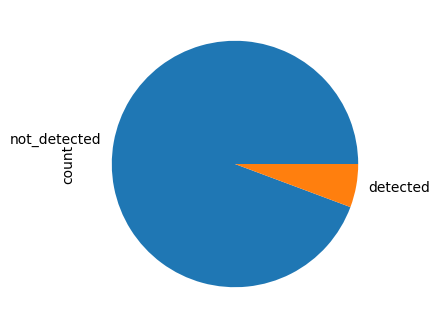

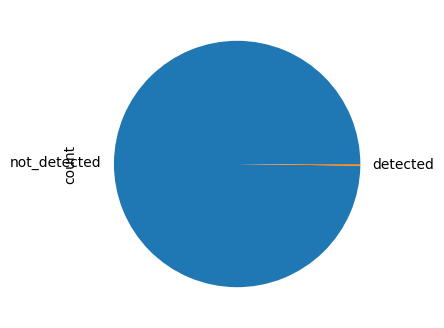

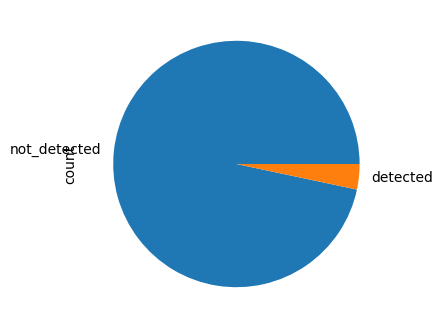

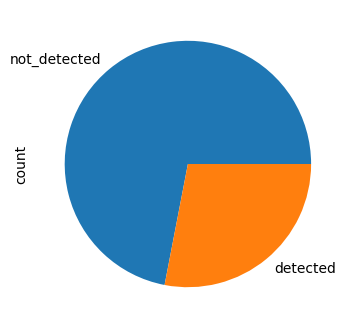

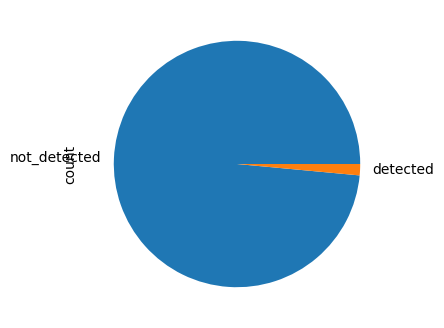

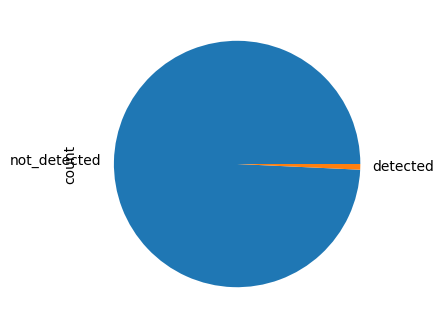

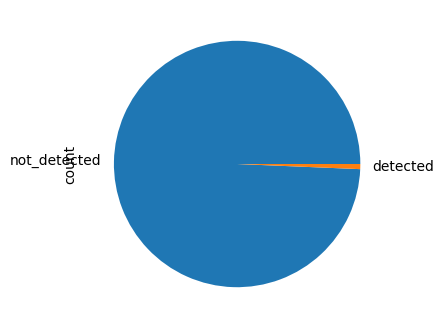

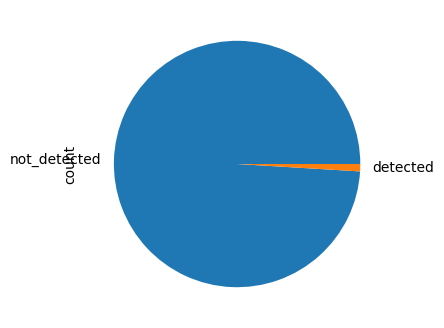

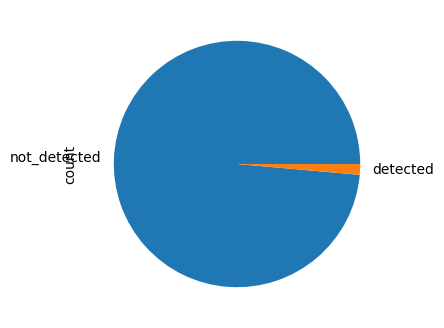

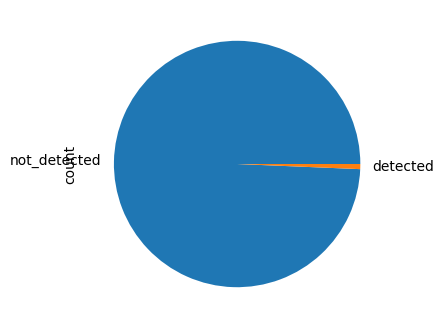

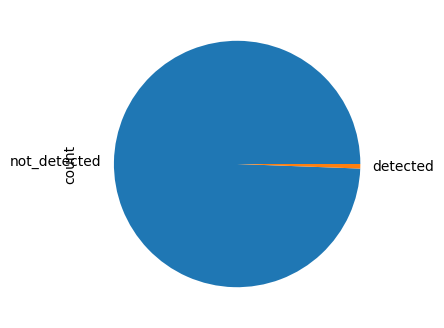

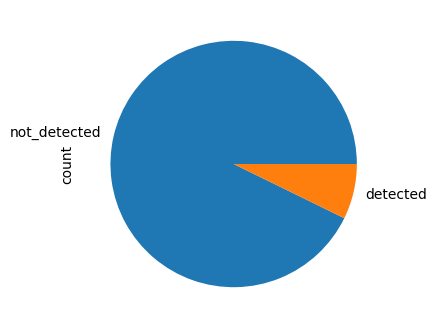

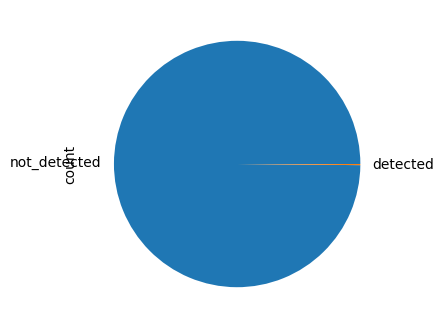

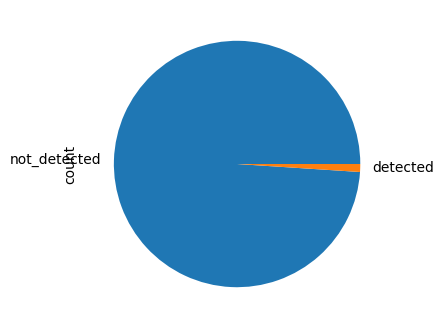

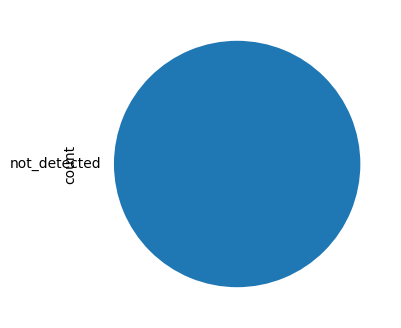

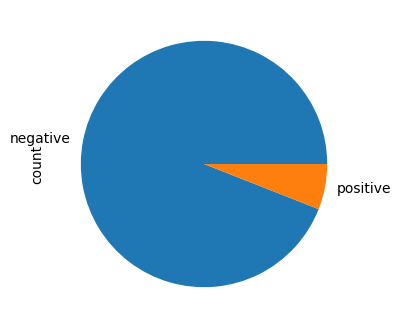

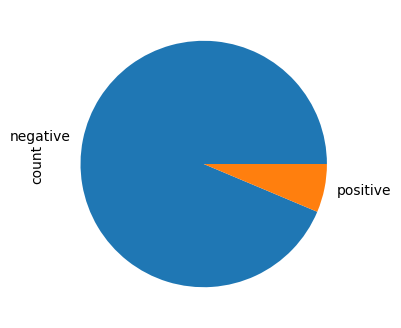

In [168]:
# Compter le nombre de chaque modalité sous forme d'un graphique de camebert
for col in df_covid.select_dtypes('object'):
    plt.figure()
    df_covid[col].value_counts().plot.pie()
    plt.show()

<font color='red'>**Interprétation:**</font> 


Nous remarquons que Les variables qualitatives (tests viraux) sont binaires *['not_detected' 'detected']*. La majorité de ces tests sont négatifs, mis à part un qui semble intéressant c'est le **Rhinovirus/Enterovirus** avec un nombre élévé de cas positifs liés à ce virus. 

<a id="section13"></a> 
# 1.3. Analyse bivariée: relation entre la variable cible / autres variables)

## 1.3.1. Création des sous ensembles

Étant donnée que le dataset contient des individus testés négatifs et autres testés positifs. Nous allons procéder de créer deux sous ensembles (donc deux dataframes) **dfcovPos** et **dfcovNeg**.

### Création de deux dataframes selon les cas positive et négative

In [169]:
# création de deux dataframes selon les cas positive et négative
df_covid_pos = df_covid[df_covid['SARS-Cov-2 exam result'] == 'positive']
df_covid_neg = df_covid[df_covid['SARS-Cov-2 exam result'] == 'negative']

In [170]:
df_covid_pos.shape, df_covid_neg.shape

((558, 38), (5086, 38))

### Création de deux groupes de variables: taux sanguins et tests viraux

Suite à notre première constation sur la présence de deux groupes des variables qui partagent un taux de manquement des valeurs, nous créeons deux sous ensembles de variables correspondant aux tests viraux et taux sanguins.

In [171]:
miss_rates = df_covid.isna().sum() / len(df_covid)
bloodtest_features = df_covid.columns[(miss_rates < 0.9) & (miss_rates >0.88)]
viraltest_features = df_covid.columns[(miss_rates < 0.88) & (miss_rates >0.75)]

In [172]:
# Afficher les taux sanguins
bloodtest_features

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [173]:
# Afficher les tests viraux
viraltest_features

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

## 1.3.2. Relation: variable cible / variables quantitatives (taux sanguins)

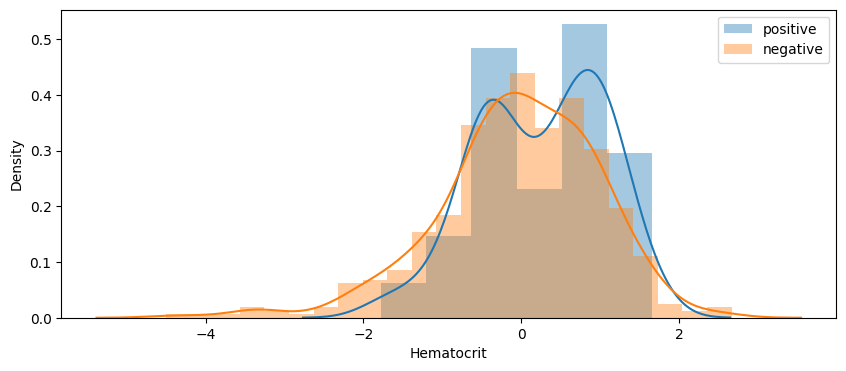

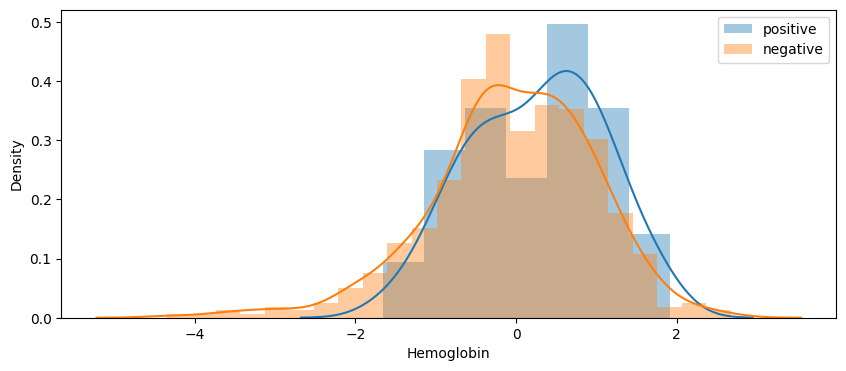

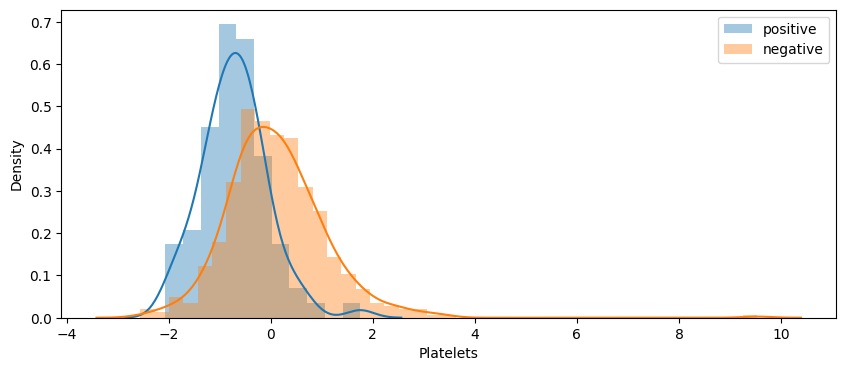

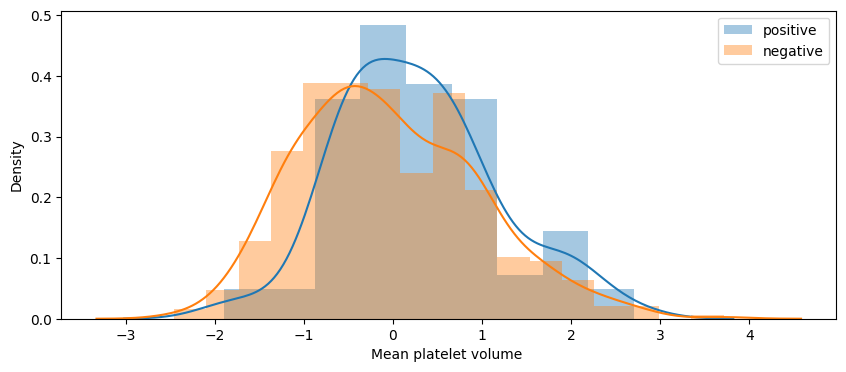

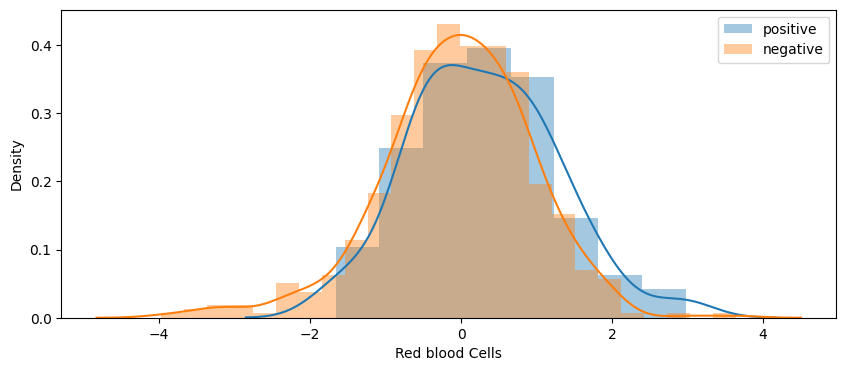

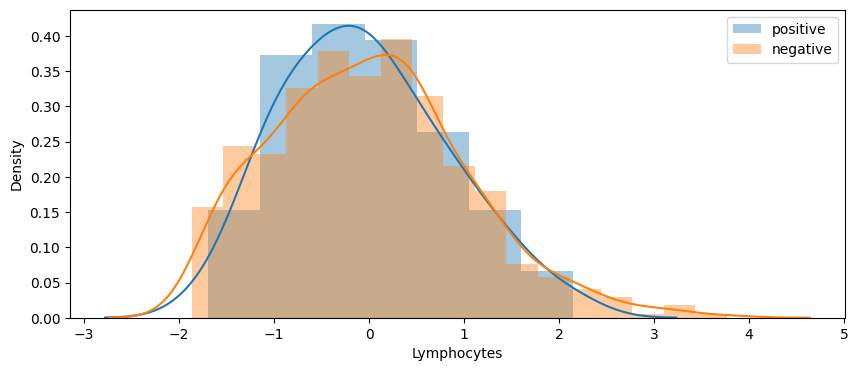

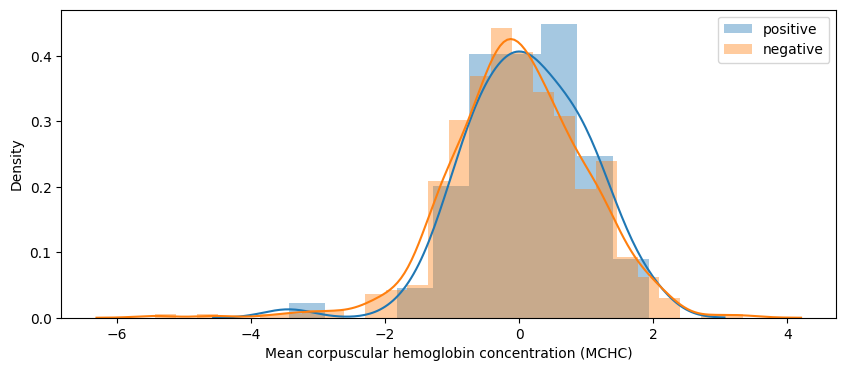

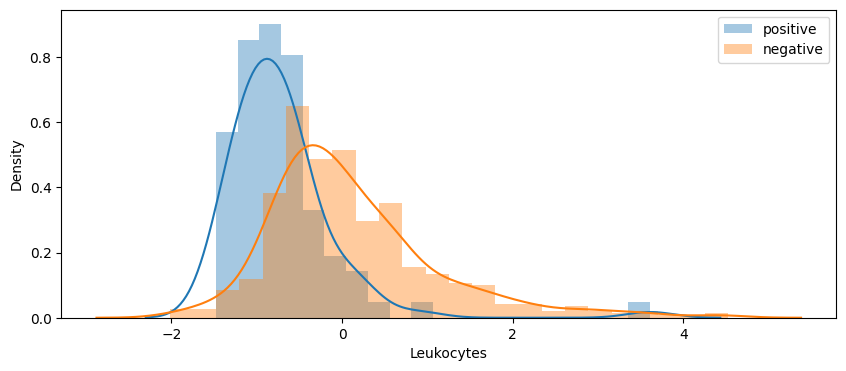

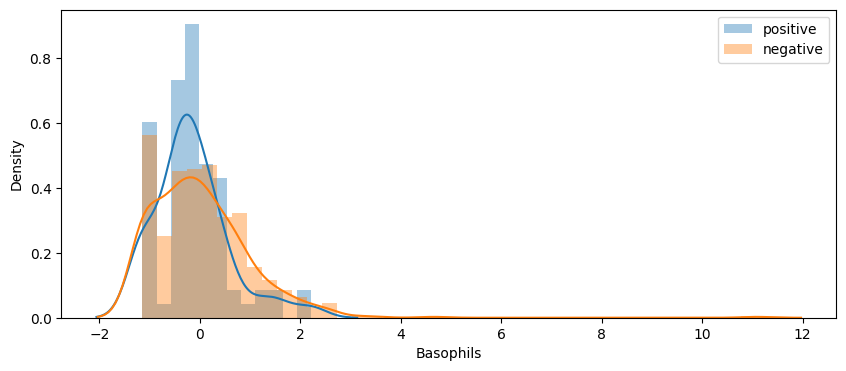

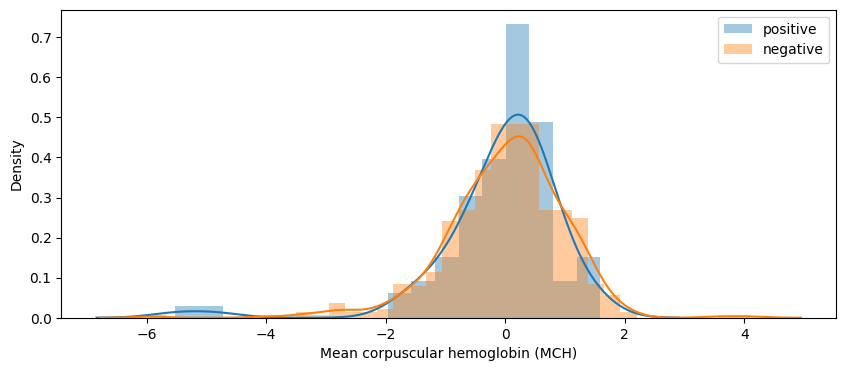

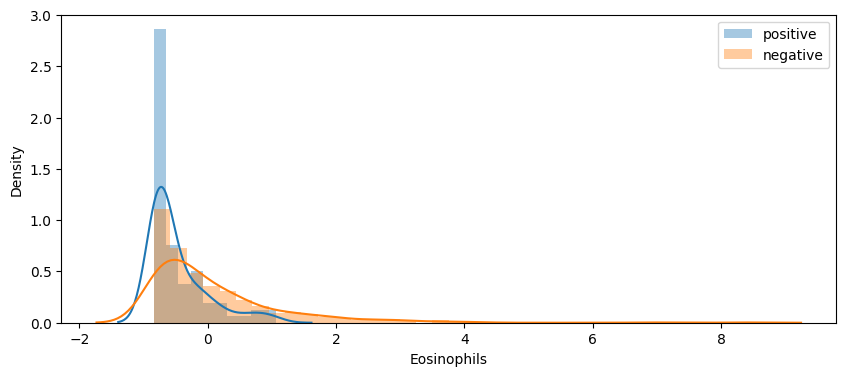

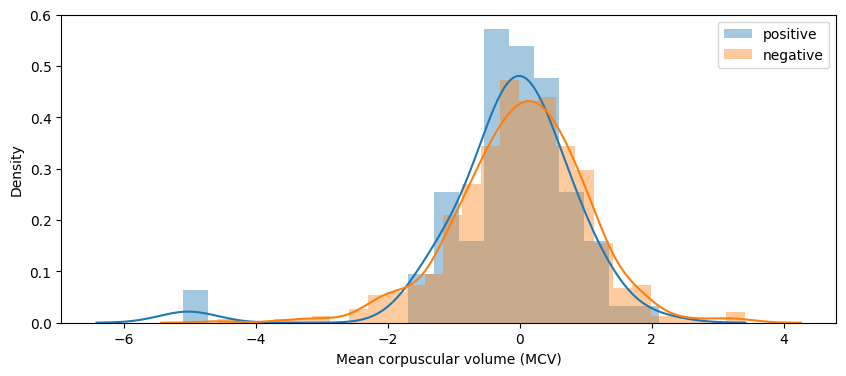

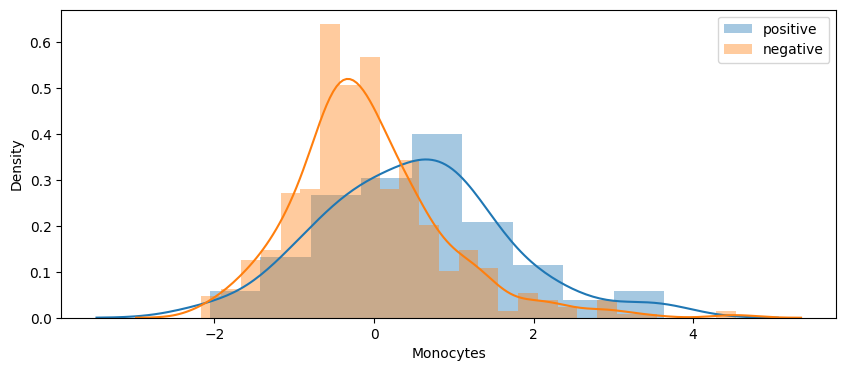

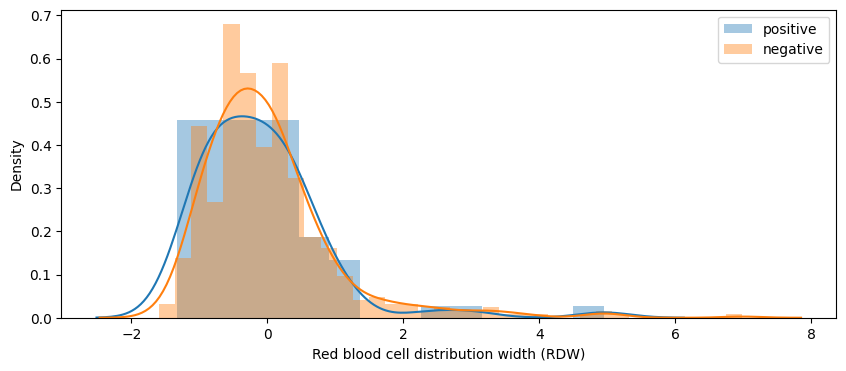

In [174]:
for feature in bloodtest_features:
    plt.figure()
    sns.distplot(df_covid_pos[feature], label='positive')
    sns.distplot(df_covid_neg[feature], label='negative')
    plt.legend()
    plt.show()

<font color='red'>**Interprétation:**</font> 

Les histogrammes correspondent aux distributions des variables continues sachant la varible cible, c'est dire des distributions conditionnelles. Nous constatons que le taux des **Platelets, Lymphocytes**  et **Leukocytes** chez les individus testés positifs au Corona virus sont différents de ceux des personnes testées négatives. 
Pour bien valider ces constations, il va falloir les transfromer en tests d'hypothèse et étudier leurs robustesses, c'est à dire vérifier la signification de chaque test (voir la section 5 sur la validation des tests).

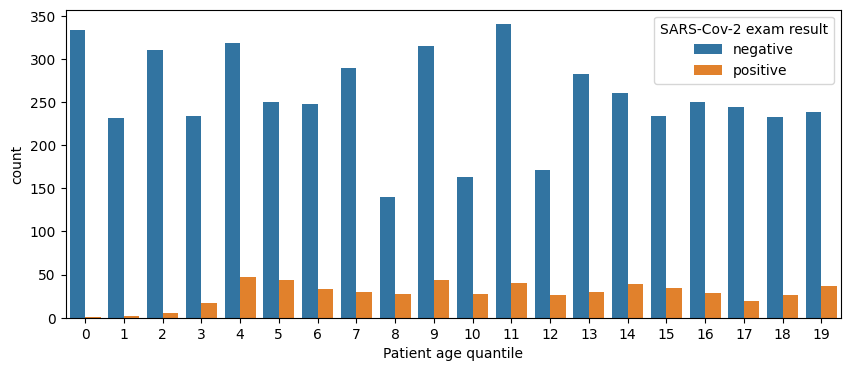

In [175]:
# Relation cible / age 
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df_covid)
plt.show()

<font color='red'>**Interprétation:**</font> 

Il semblerait que l'âge soit lié au fait que l'on soit testé positif ou négatif au Corona virus. Mais cette hypothèse est à fort risque puisque on ne sait pas trop sur la varible âge. Sur le grpahique, on observe aussi les enfants et mineurs (tranches d'ages $[0, 2]$ ansne soient pas touchés par le Corona virus, par contre dans la vraie vie on a des il existe des cas positifs chez les enfants et minuers.

## 1.3.3. Relation:  variable cible / varibales qualitatives (tests viraux)

Puisque la varible cible est catégorielle et les tests viraux le sont, on trace les distribution conditionelles des variabls tests viraux sachant la variable cible en utilisant des tableaux de contingence (cross tabulation, cross-tab), qui sont des méthodes de représentation de données issues d'un comptage permettant d'estimer la dépendance entre deux caractères. Ces tableaux consistent à croiser deux caractères en dénombrant l'effectif correspondant à lleur conjonction.

In [176]:
# On utilise la fonction crosstab du Pandas (table de contingence)
pd.crosstab(df_covid['SARS-Cov-2 exam result'], df_covid['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

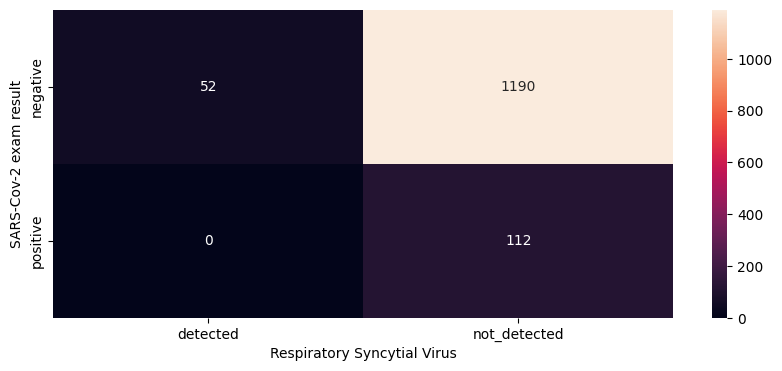

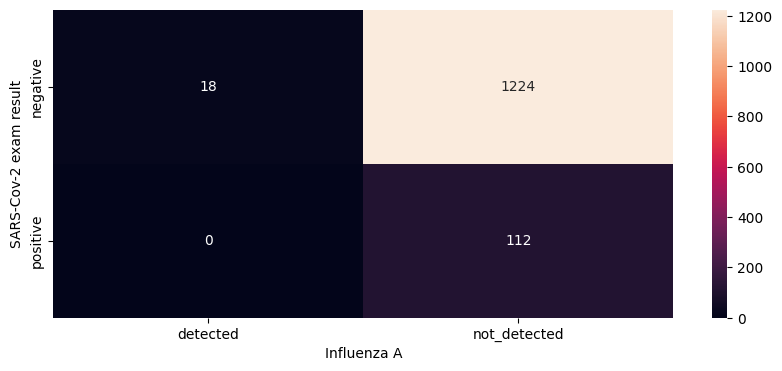

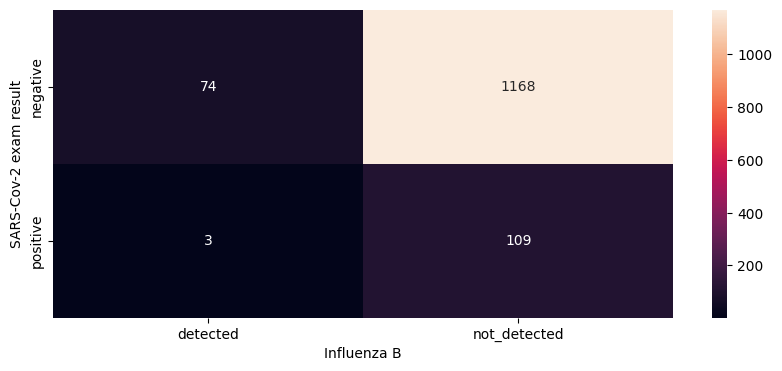

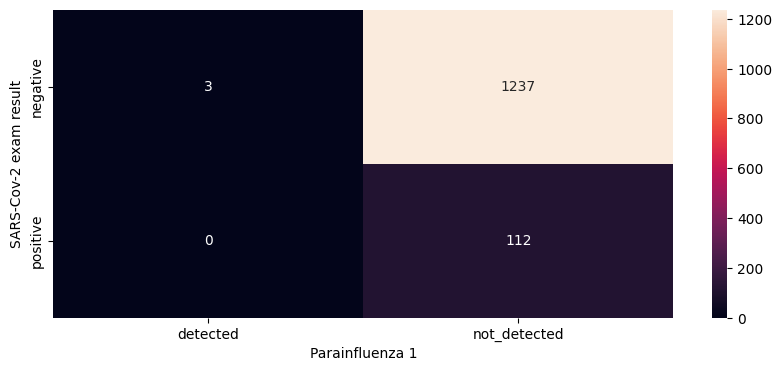

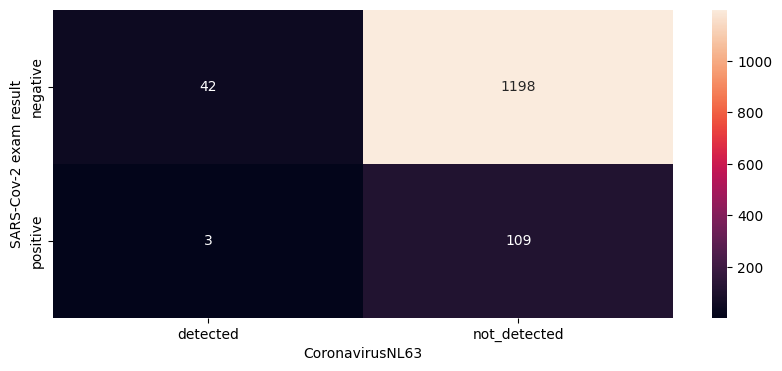

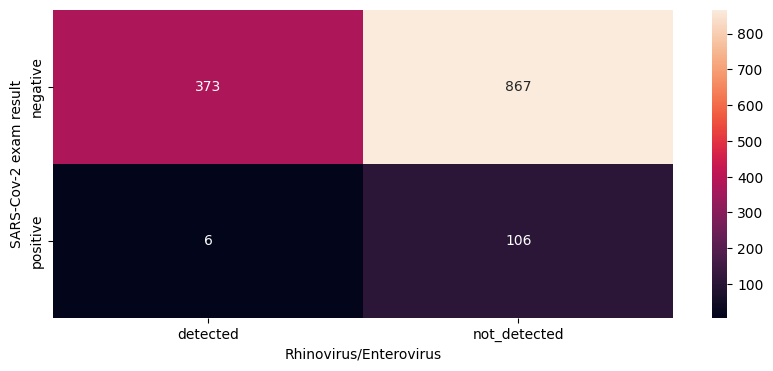

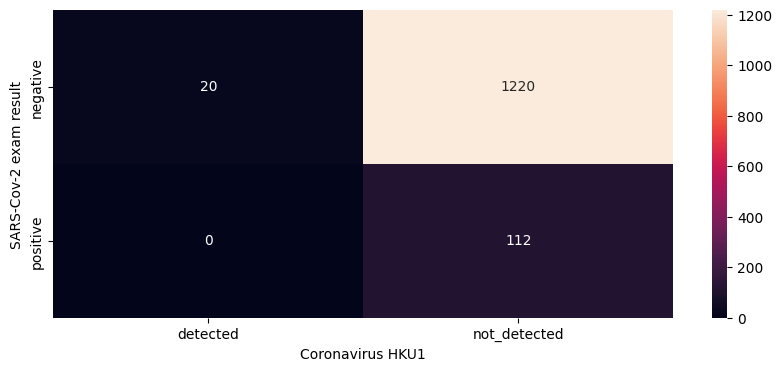

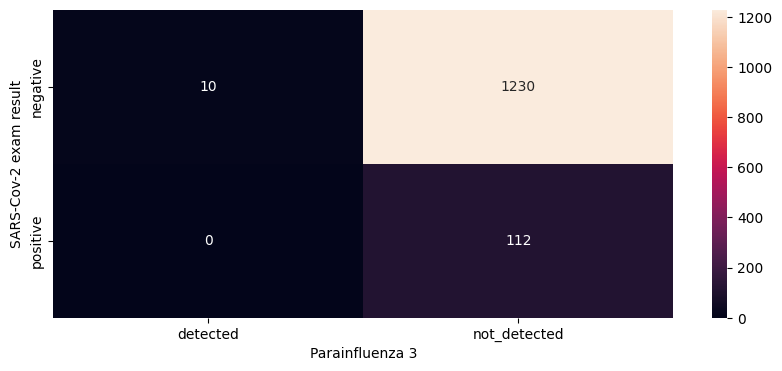

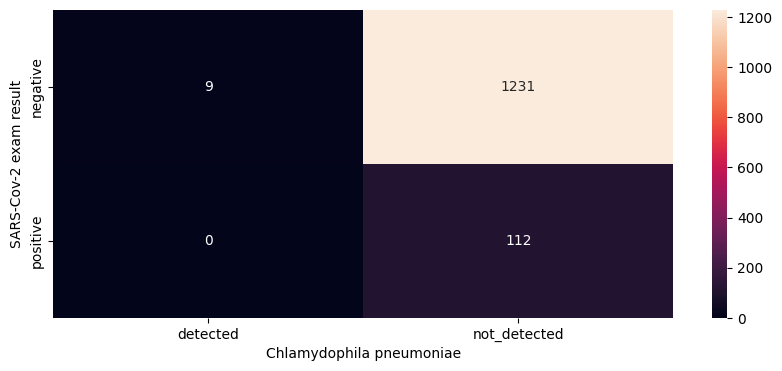

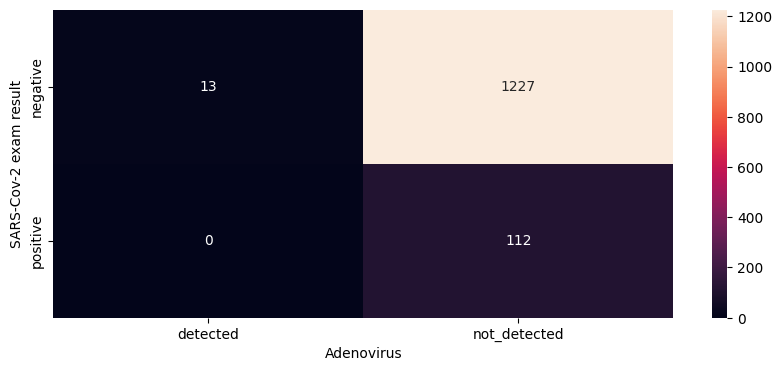

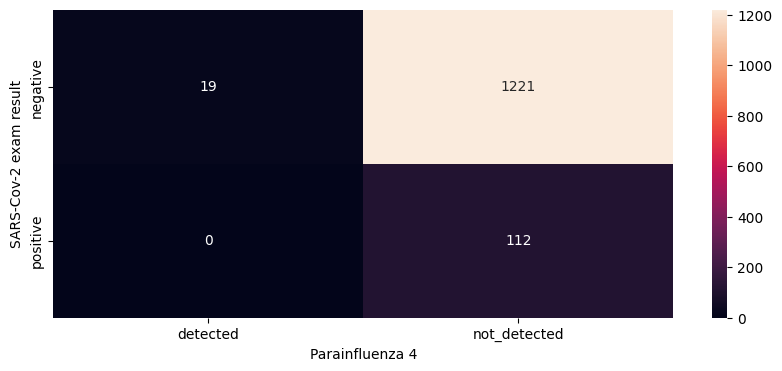

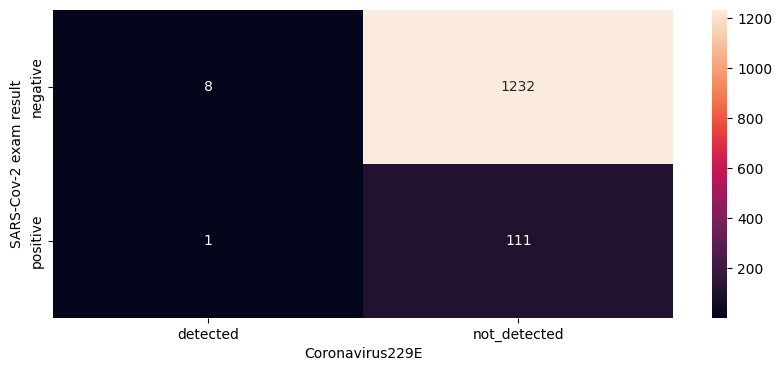

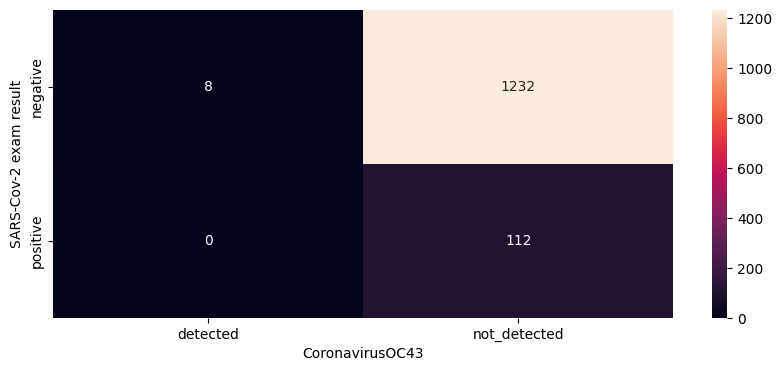

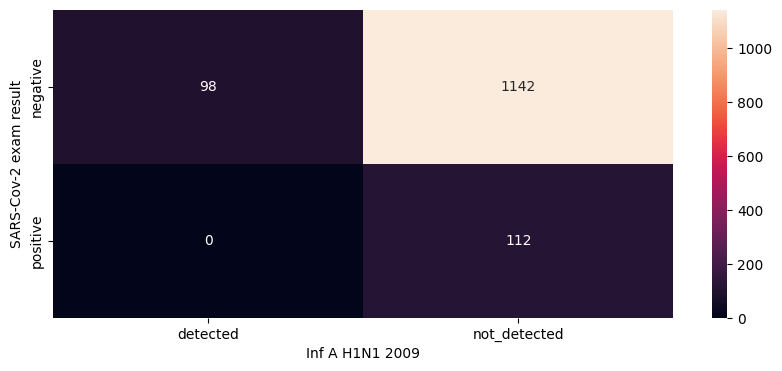

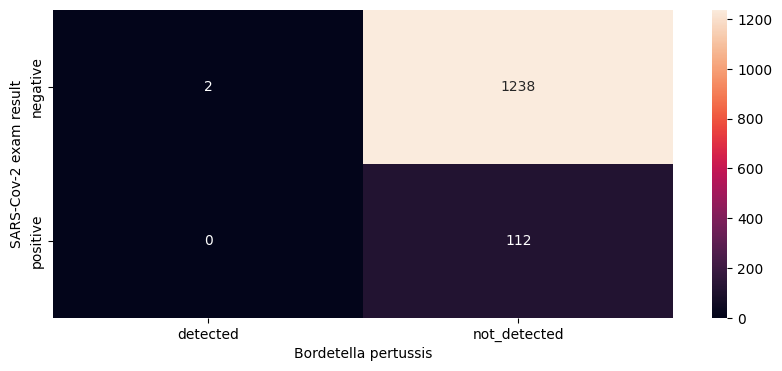

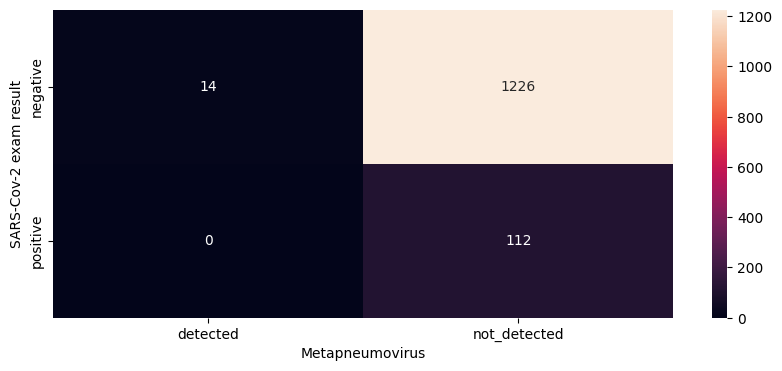

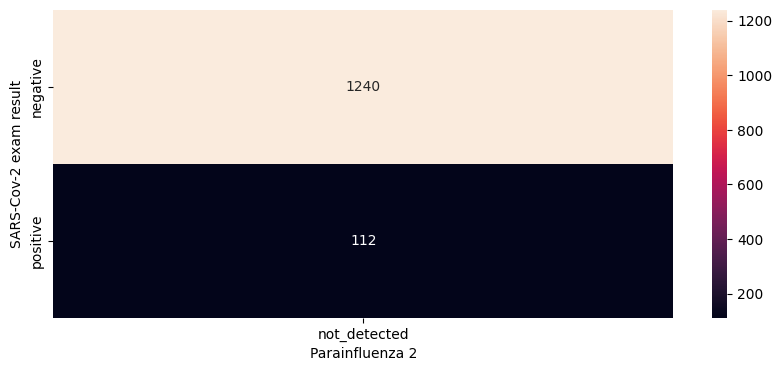

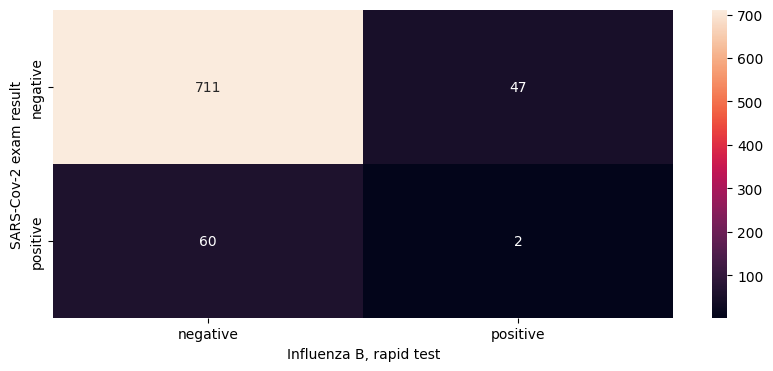

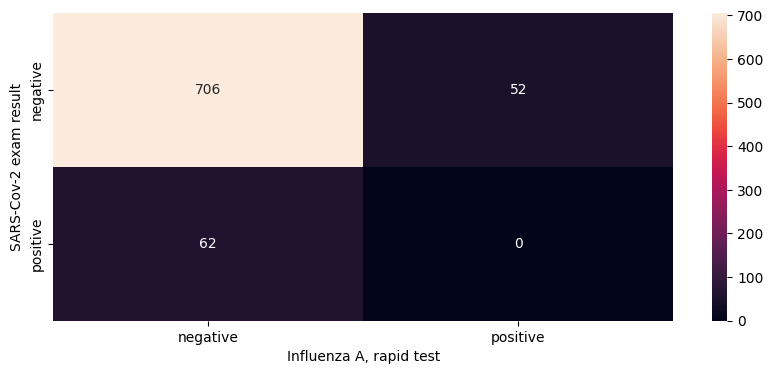

In [177]:
for feature in viraltest_features:
    plt.figure()
    sns.heatmap(pd.crosstab(df_covid['SARS-Cov-2 exam result'], df_covid[feature]), annot=True, fmt='d')
    plt.show()

<font color='red'>**Interprétation:**</font> 

- Nous remarquons qu'il y a très peu de personnes qui vont avoir deux virus en même temps. C'est assez rare mais ce n'est pas impossible. Nous constatons aussi qu'il y a un nombre assez important de personnes qui son testées positives au virus **Rhinovirus/Enterovirus** mais que ne l'ont pas au Corona virus. 

- On peut penser à faire un test statistique pour vérfier l'existence (ou non ) d'absence d'un lien statistique de dépendance entre: le fait d'être testé postif au **Rhinovirus/Enterovirus** et être testé postif au Corona virus. Pour cela on pourrait utiliser le test de Khi-Deux.

- Le test de Khi-deux permet de vérifier l'absence de lien statistique entre deux variables $X$ et $Y$. Les deux variables sont dites indépendantes lorsqu'il n'existe aucun lie nstatique entre elles, dit autrement la connaissance de $X$ ne permet en aucune manière de se prononcer sur $Y$. 

<a id="section14"></a> 
# 1.4. Analyse approdondie



## 1.4.1. Relation: variables quantitatives / variables quantitatives (taux sanguins / taux sanguins)

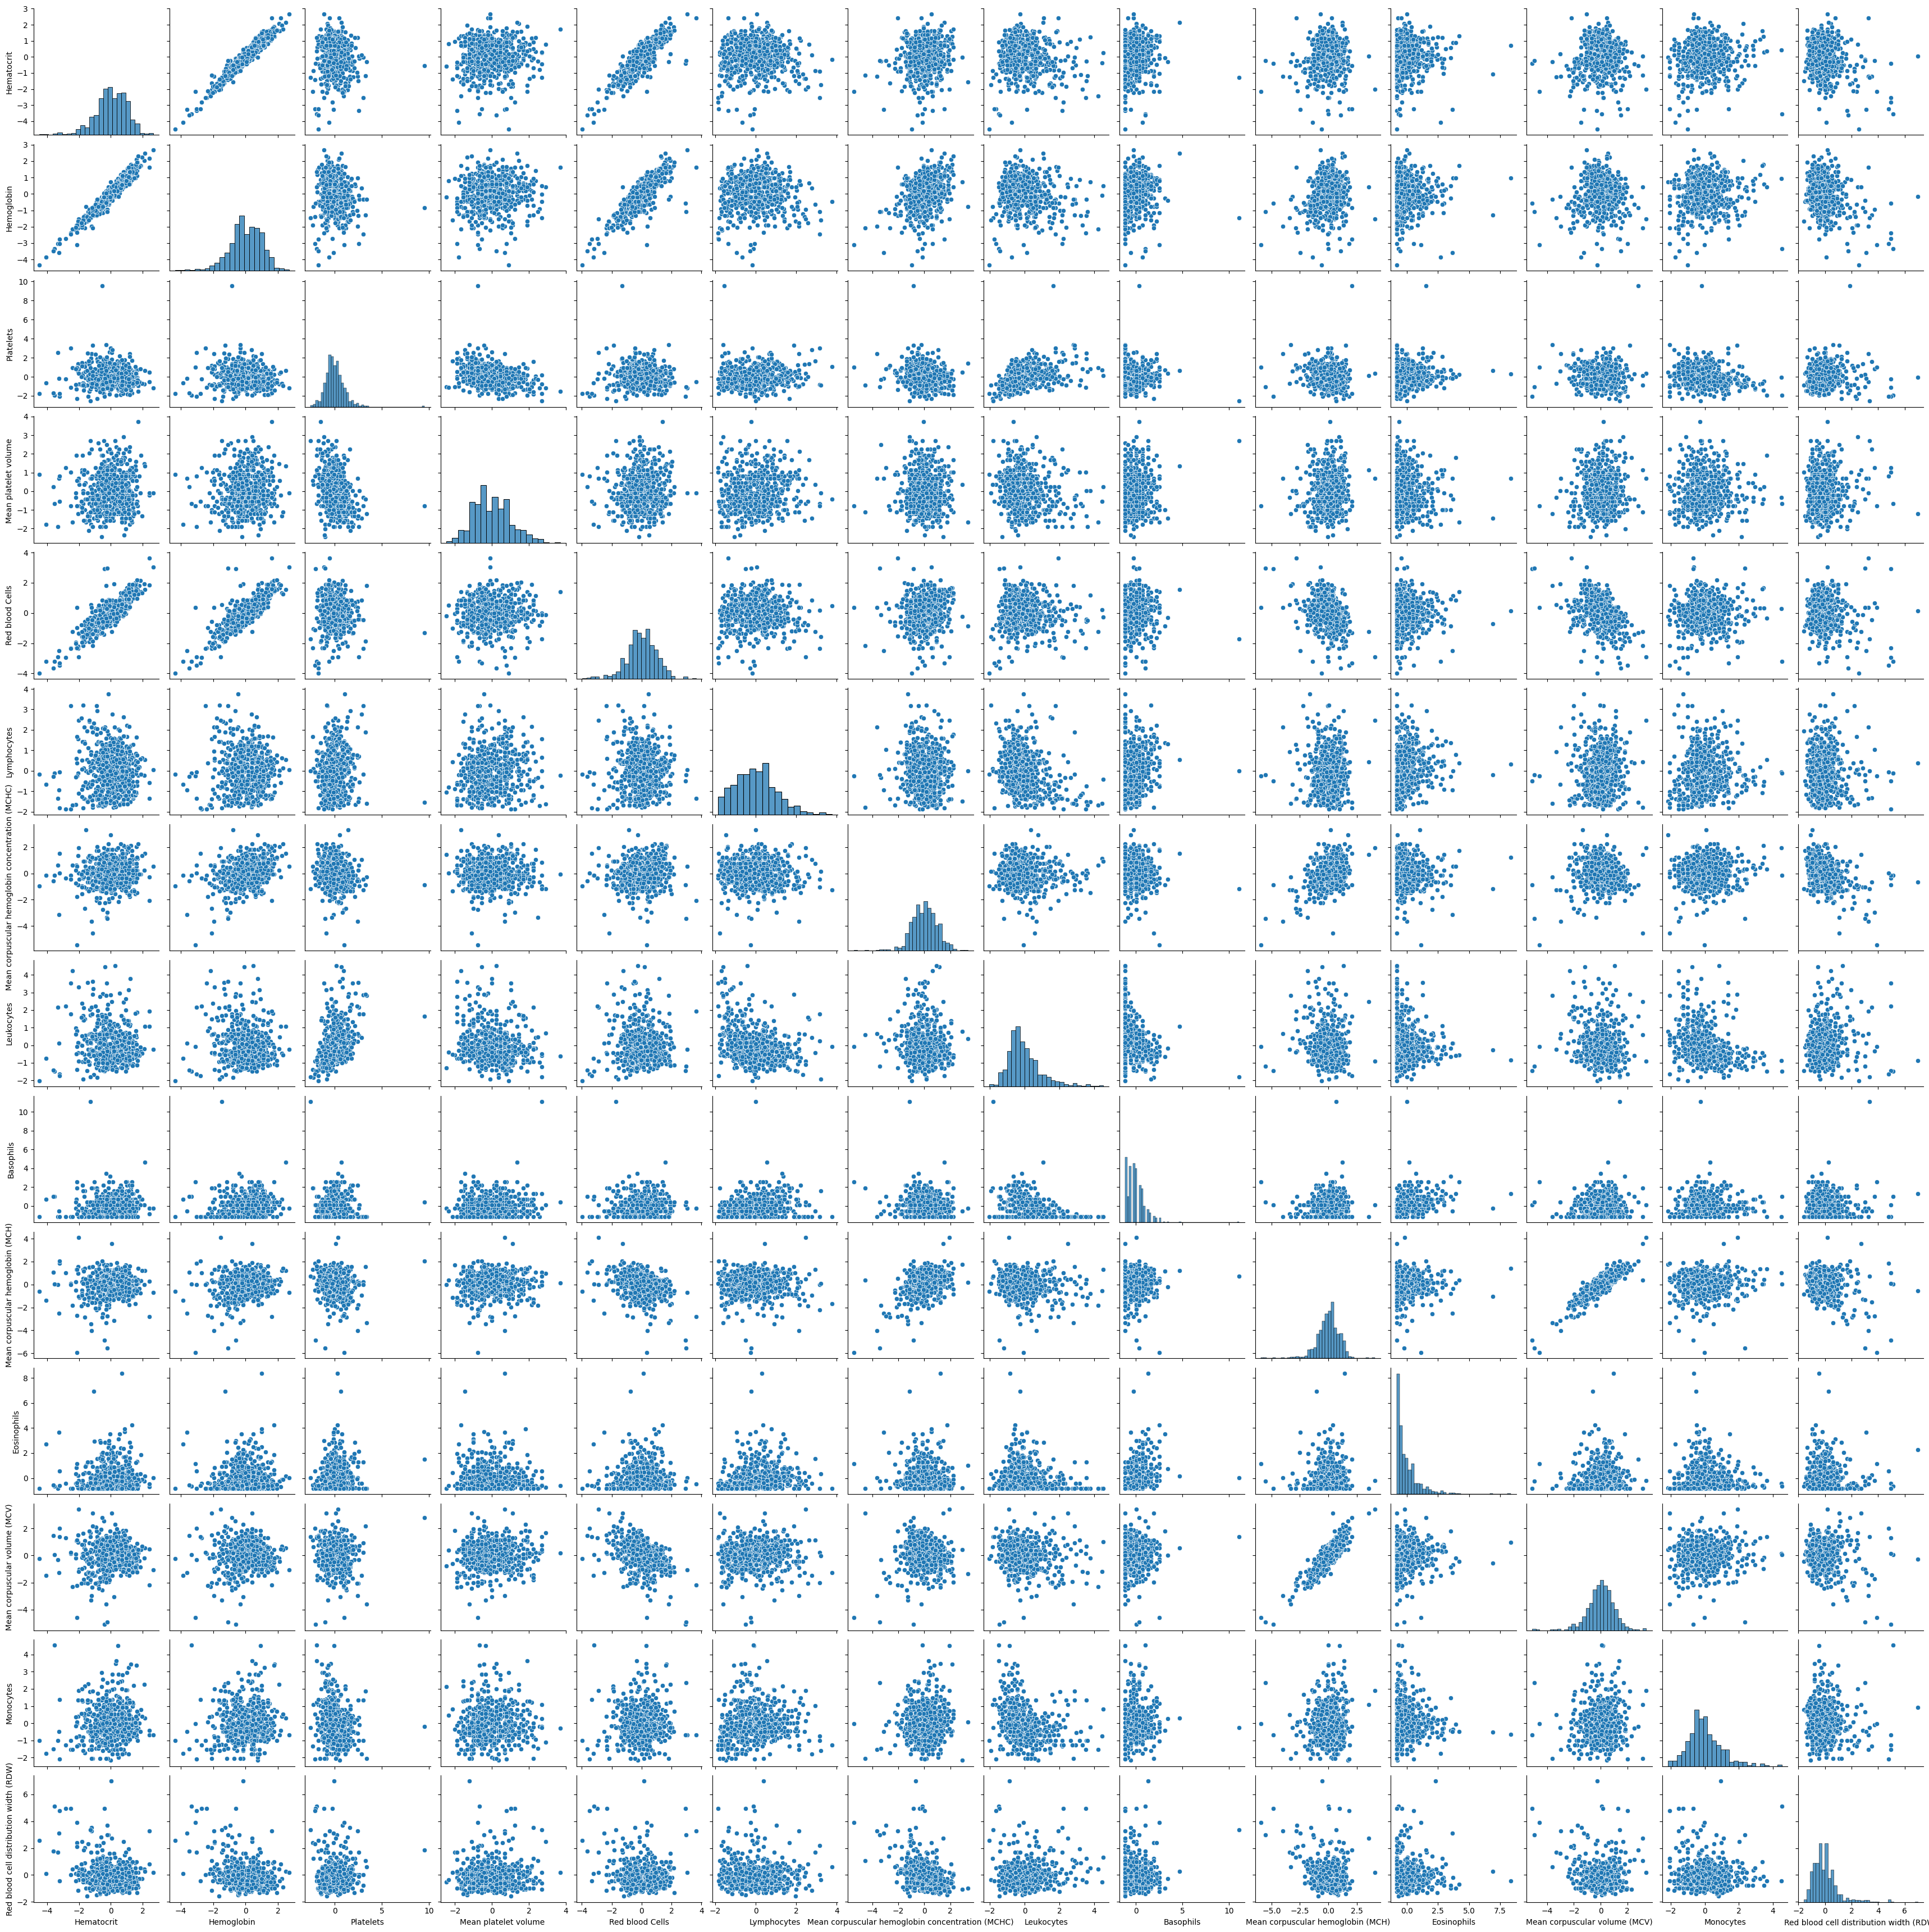

In [178]:
# On utilise la fonction pairplot de Seaborn
sns.pairplot(df_covid[bloodtest_features])
plt.show()

<font color='red'>**Interprétation:**</font> 

Le graphique sur les distributions entre les variables quantitatives (taux sanguins) nous apportent l'existence de ceratianes relations de colinéarité réelles, par exemple entre les variables **(Hematocrit, Hemoglobin), (Hematocrit, Red blood Cells), (Hemoglobin, Red blood Cells)** et d'autres. Nous pouvons constater cette relation de colinéarité réelle à l'aide de la forme d'une droite des nuages de points de ces variables. Ceci parait tres clair en faisant le calcul de leurs corrélations dans le graphique suivant.

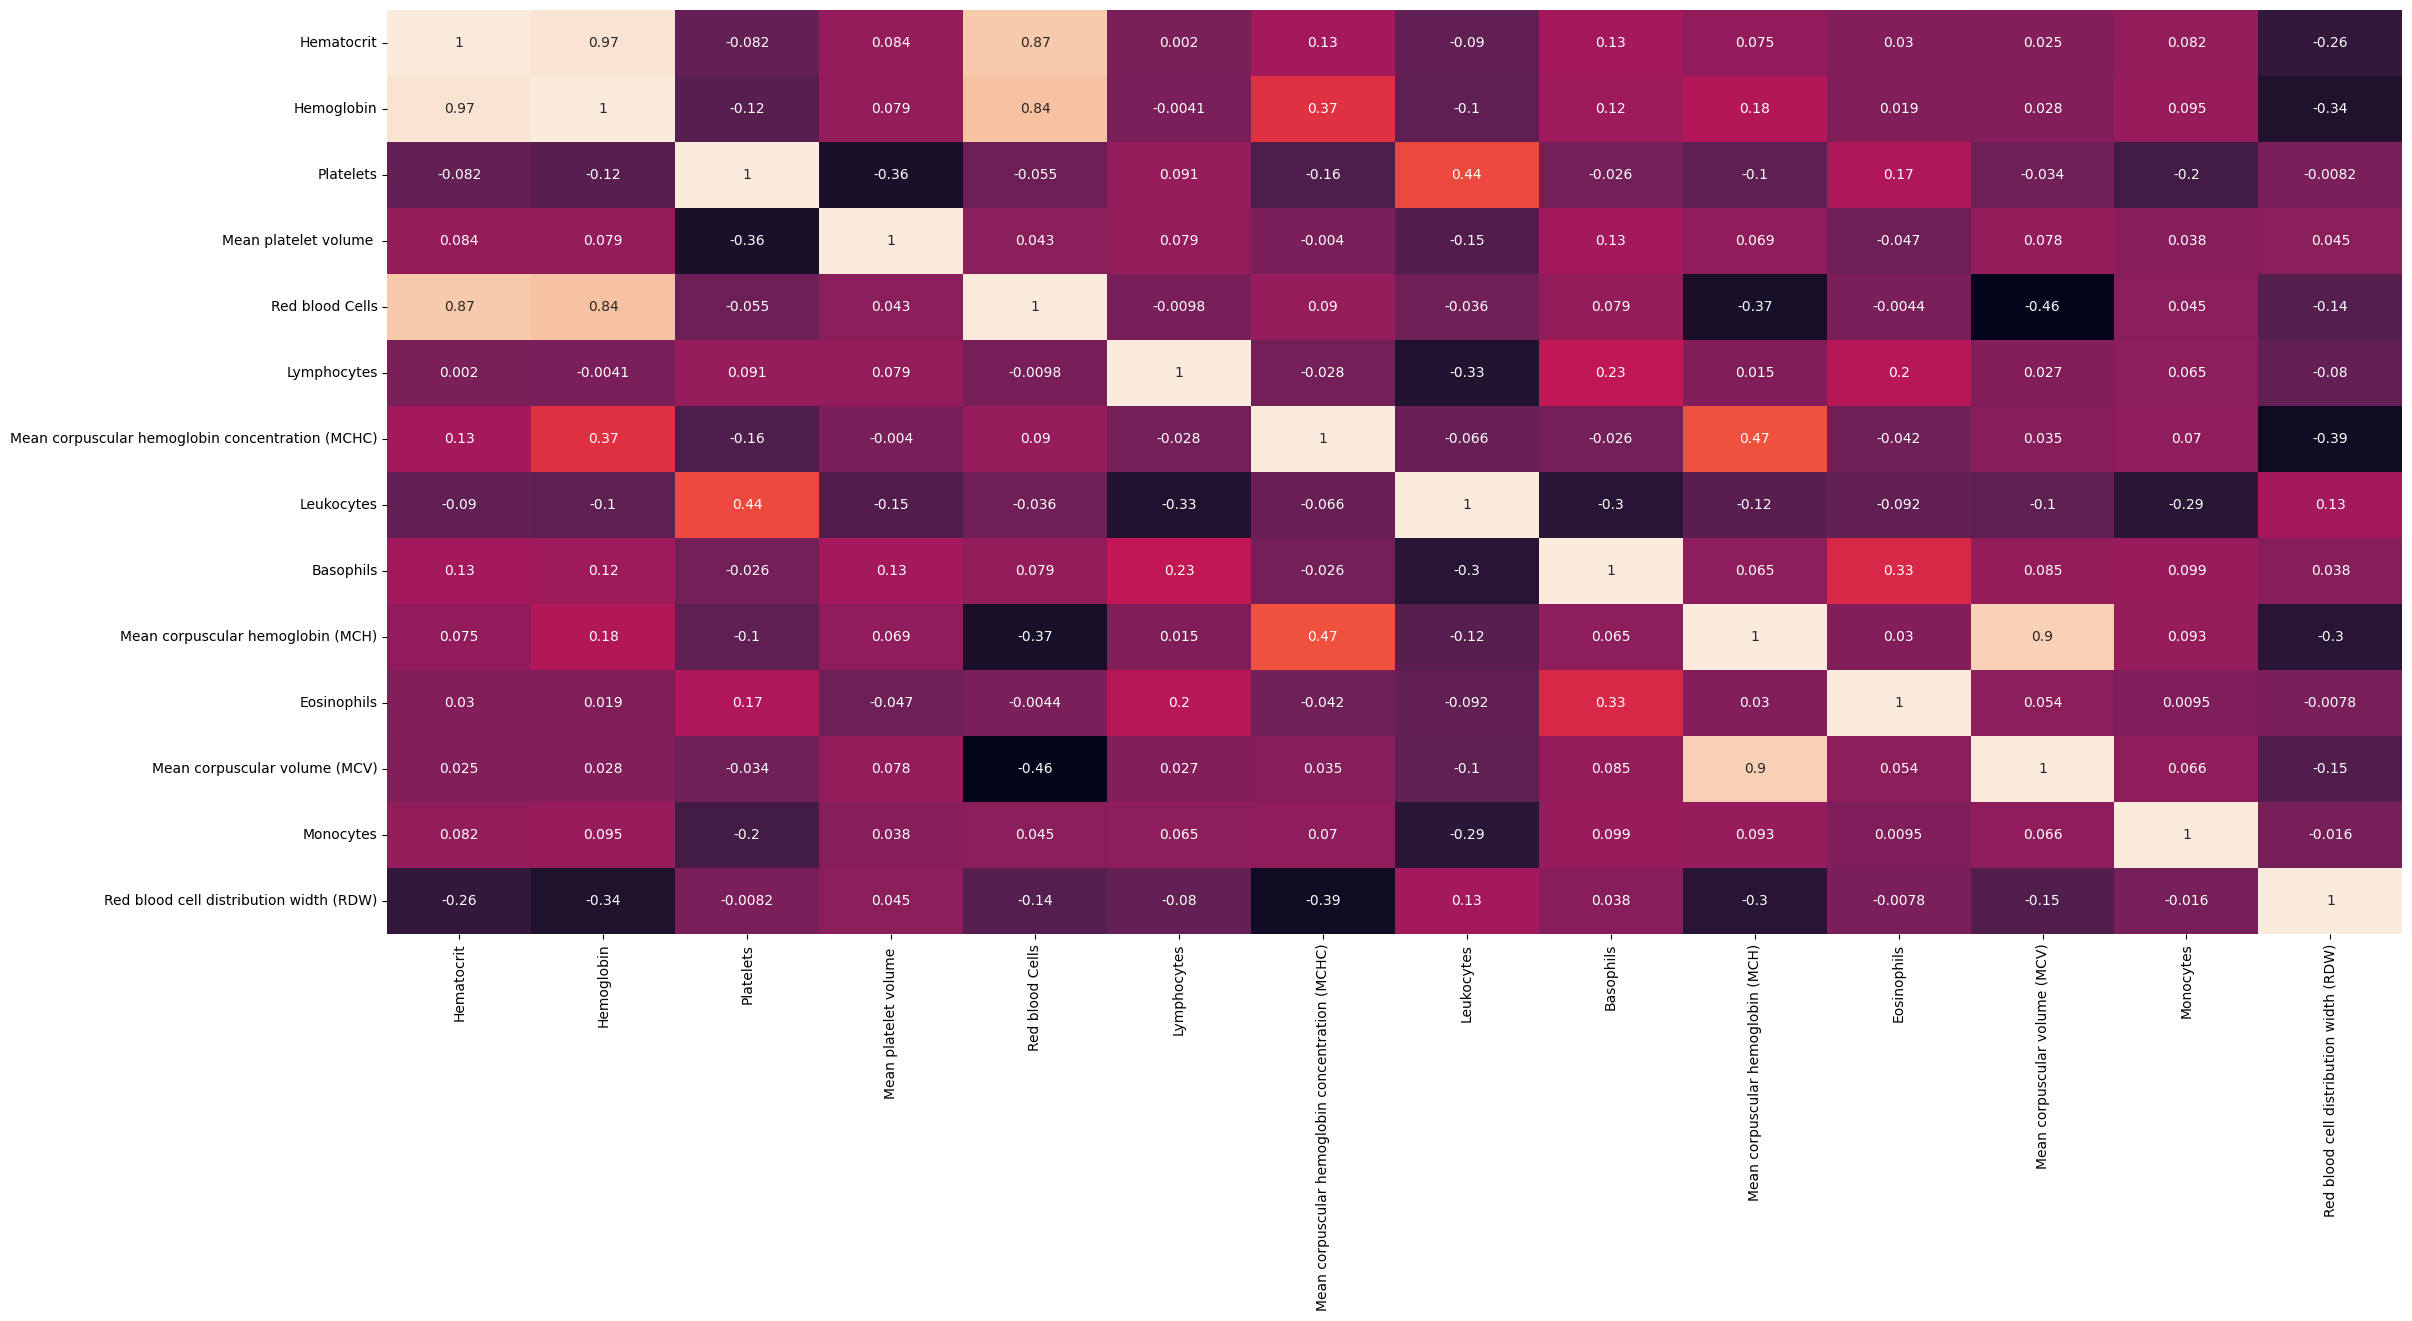

In [179]:
plt.figure(figsize=(26, 12))
sns.heatmap(df_covid[bloodtest_features].corr(), annot=True, cbar=False) # très utile
plt.show()

<font color='red'>**Interprétation:**</font> 

Plus la corrélation est proche de $1$ (respectivement $-1$), plus les deux variables évoluent positivement (respectivement négativement) les unes avec les autres, c'est à dire quand l'une augmente l'autre augemnte aussi (respectivement quand l'une augmente l'autre diminue). 

<Figure size 4500x3200 with 0 Axes>

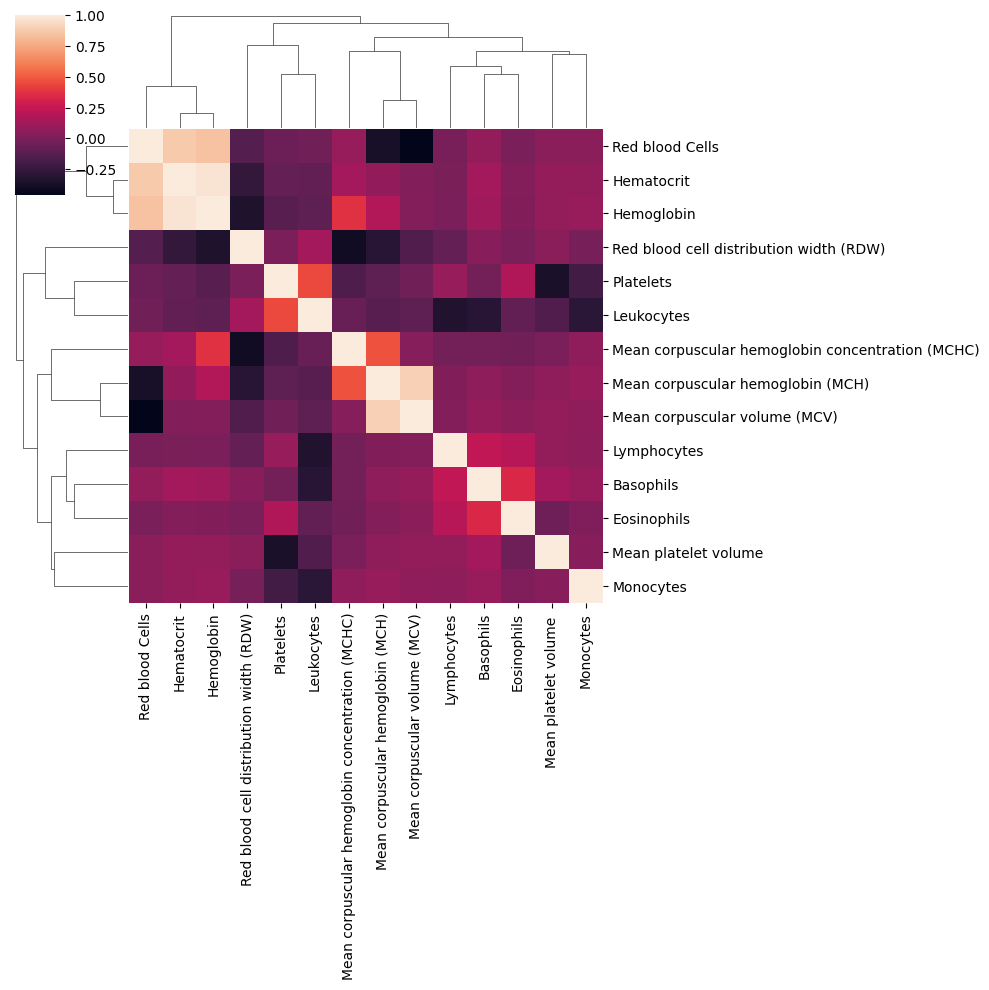

In [180]:
plt.figure(figsize=(45, 32));
sns.clustermap(df_covid[bloodtest_features].corr()) # 
plt.show()

<font color='red'>**Interprétation:**</font> 

La fonction clustermap de Seaborn permetr de rassembler directement les variables et les organise sous forme de cluster ayant des fortes corrélations linéaires. On voit par exemple les trois variables **(Hematocrit, Hemoglobin, Red blood Cells)** sont corrélées et aussi un autre cluster formé par les variables **(MCH, MVH)**. Cette information semble très utile pour prendre des décisions apr la suite notamment lorsqu'on fera de la modélisation.

<font color='red'>**Interprétation:**</font> 

La fonction lmplot de Seaborn permet de visualiser des courbes de régression dans les nuages des points. Elle sert à afficher en abcisse l'age d'un patient et en ordonnée une variable des taux sanguins, en discriminant les cas positfs et négatifs au Corona virus. On remarque quelques valeurs abérrantes ces variables. De plus, la teandance linéaire de ces variables avec l'age de patient semble très faible. Pour vérifier cela, nous caclulons les coefficients de corrélations entre les variables taux sanguins et la varaible age de patient.

### 1.4.2. Matrice de corrélation entre les variables quantitatives de df_cov

In [181]:
numeric_features = df_covid.select_dtypes('float').columns
numeric_features

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [182]:
# df_covid.head()
df_covid[numeric_features].corr()

Hematocrit  Hemoglobin  \
Hematocrit                                          1.000000    0.968447   
Hemoglobin                                          0.968447    1.000000   
Platelets                                          -0.082296   -0.120150   
Mean platelet volume                                0.083580    0.078816   
Red blood Cells                                     0.872987    0.841420   
Lymphocytes                                         0.002035   -0.004105   
Mean corpuscular hemoglobin concentration (MCHC)    0.130771    0.371708   
Leukocytes                                         -0.089937   -0.102375   
Basophils                                           0.129268    0.116389   
Mean corpuscular hemoglobin (MCH)                   0.075216    0.184883   
Eosinophils                                         0.029781    0.018618   
Mean corpuscular volume (MCV)                       0.025161    0.027679   
Monocytes                                           0.082361    0.094586   
Red blood cell distribution width (RDW)            -0.264708   -0.342426   

                                                  Platelets  \
Hematocrit                                        -0.082296   
Hemoglobin                                        -0.120150   
Platelets                                          1.000000   
Mean platelet volume                              -0.356332   
Red blood Cells                                   -0.054561   
Lymphocytes                                        0.090607   
Mean corpuscular hemoglobin concentration (MCHC)  -0.159397   
Leukocytes                                         0.443056   
Basophils                                         -0.025990   
Mean corpuscular hemoglobin (MCH)                 -0.101245   
Eosinophils                                        0.169453   
Mean corpuscular volume (MCV)                     -0.033844   
Monocytes                                         -0.200660   
Red blood cell distribution width (RDW)           -0.008222   

                                                  Mean platelet volume   \
Hematocrit                                                     0.083580   
Hemoglobin                                                     0.078816   
Platelets                                                     -0.356332   
Mean platelet volume                                           1.000000   
Red blood Cells                                                0.043419   
Lymphocytes                                                    0.079060   
Mean corpuscular hemoglobin concentration (MCHC)              -0.004011   
Leukocytes                                                    -0.154643   
Basophils                                                      0.128630   
Mean corpuscular hemoglobin (MCH)                              0.069457   
Eosinophils                                                   -0.046539   
Mean corpuscular volume (MCV)                                  0.078026   
Monocytes                                                      0.038380   
Red blood cell distribution width (RDW)                        0.045468   

                                                  Red blood Cells  \
Hematocrit                                               0.872987   
Hemoglobin                                               0.841420   
Platelets                                               -0.054561   
Mean platelet volume                                     0.043419   
Red blood Cells                                          1.000000   
Lymphocytes                                             -0.009843   
Mean corpuscular hemoglobin concentration (MCHC)         0.090073   
Leukocytes                                              -0.036159   
Basophils                                                0.079362   
Mean corpuscular hemoglobin (MCH)                       -0.367077   
Eosinophils                                             -0.004408   
Mean corp

## 1.4.3. Relation: variables catégorielles / variables catégorielles

In [183]:
pd.crosstab(df_covid['Influenza A'], df_covid['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [184]:
pd.crosstab(df_covid['Influenza B'], df_covid['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

<font color='red'>**Interprétation:**</font> 

Nous pourrons éléiminer les deux variables **Influenza A, rapid test** et **Influenza B, rapid test** car elles ont une très mauvaise sensiblité donc ces tests sont très peu fiables.

In [185]:
np.sum(df_covid[viraltest_features[:-2]] == 'detected', axis=1).head()

0    0
1    1
2    0
3    0
4    1
dtype: int64

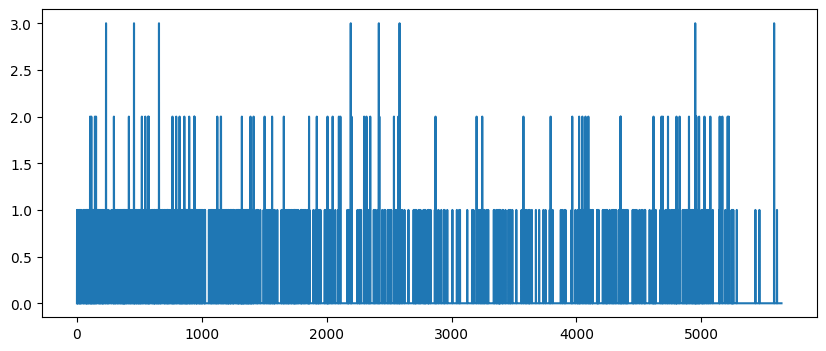

In [186]:
np.sum(df_covid[viraltest_features[:-2]] == 'detected', axis=1).plot()
plt.show()

<font color='red'>**Interprétation:**</font> 

Ce graphique nous permet de visualiser les patients qui sont testés positives à tous les virus. On voit des qu'il y a des patients qui ont été détéectés jusqu'à trois tests à la fois, ce que ne veut pas forcément dire qu'ils ont trois maladies mais ils ont été testés positifs à trois maladies.  

In [187]:
# On peut vérifier si un individu est testé positif au moins à deux maladies.
# np.sum(df_covid[viraltest[:-2]] == 'detected', axis=1) > 1

## 1.4.4 Relation: variables qualitatives / variables quantitatives

Premièrement, nous allons créer une nouvelle variables **etre_malade** qui permet de vérifier si un patient est atteint d'au mimum 2 maladies:

In [188]:
# Créer d'une variable etre_malde: le patient testé  positive
df_covid['etre_malade'] = np.sum(df_covid[viraltest_features[:-2]] == 'detected', axis=1) > 1 

In [189]:
df_covid.head(2)

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  etre_malade  
0             NaN                     NaN                     NaN        False  
1    not_detected                negative                negative        False

In [190]:
# création de deux dataframes: df_malade et df_non_malade
df_malade  = df_covid[df_covid['etre_malade'] == True]
df_non_malade  = df_covid[df_covid['etre_malade'] == False]

In [191]:
df_malade.head(2)

Patient age quantile SARS-Cov-2 exam result  \
105                    15               negative   
115                    17               negative   

     Patient addmited to regular ward (1=yes, 0=no)  \
105                                               0   
115                                               0   

     Patient addmited to semi-intensive unit (1=yes, 0=no)  \
105                                                  0       
115                                                  0       

     Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
105                                                  0       -0.450142   
115                                                  0       -0.038148   

     Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
105   -0.460932  -0.542537               1.132609        -0.779514   
115   -0.147652  -0.404357              -0.213711        -0.039039   

     Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
105    -0.671003                                         -0.154166   
115    -0.363958                                         -0.452899   

     Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
105   -1.138157  -1.140144                           0.648619    -0.835508   
115   -1.024063   0.387152                          -0.239998    -0.245556   

     Mean corpuscular volume (MCV)  Monocytes  \
105                       0.807138  -0.220244   
115                      -0.034103   0.042388   

     Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
105                                -0.005877                not_detected   
115                                -0.005877                not_detected   

      Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
105  not_detected  not_detected    not_detected    not_detected   
115  not_detected      detected    not_detected    not_detected   

    Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
105               detected     not_detected    not_detected   
115               detected     not_detected    not_detected   

    Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
105             not_detected  not_detected    not_detected    not_detected   
115             not_detected  not_detected    not_detected    not_detected   

    CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
105        detected    not_detected         not_detected    not_detected   
115    not_detected    not_detected         not_detected    not_detected   

    Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  \
105    not_detected                negative                negative   
115    not_detected                     NaN                     NaN   

     etre_malade  
105         True  
115         True

In [192]:
df_non_malade.head(2)

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  etre_malade  
0             NaN                     NaN                     NaN        False  
1    not_detected                negative                negative        False

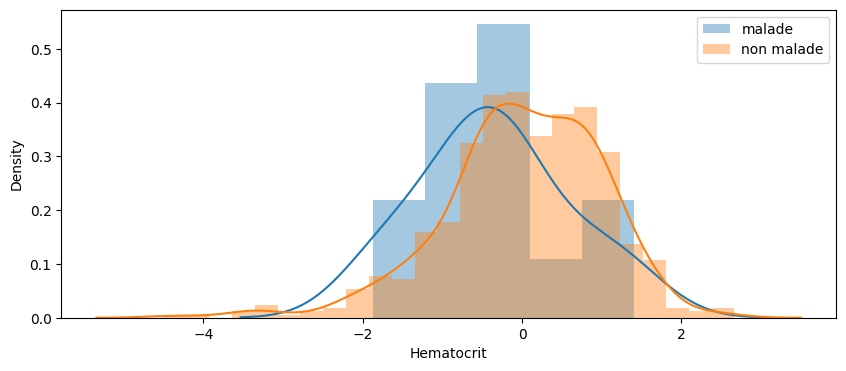

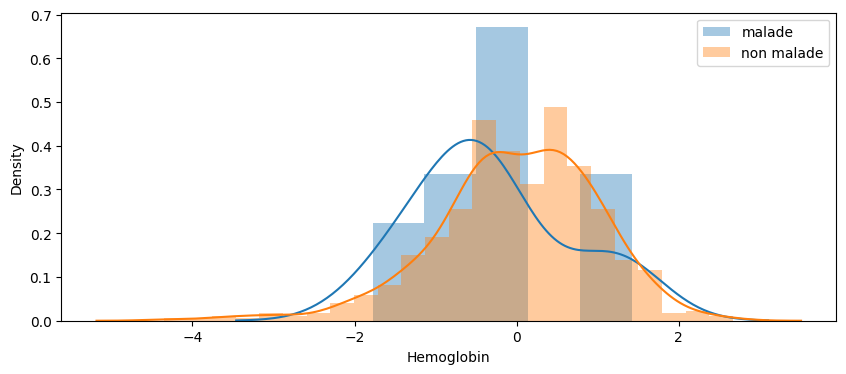

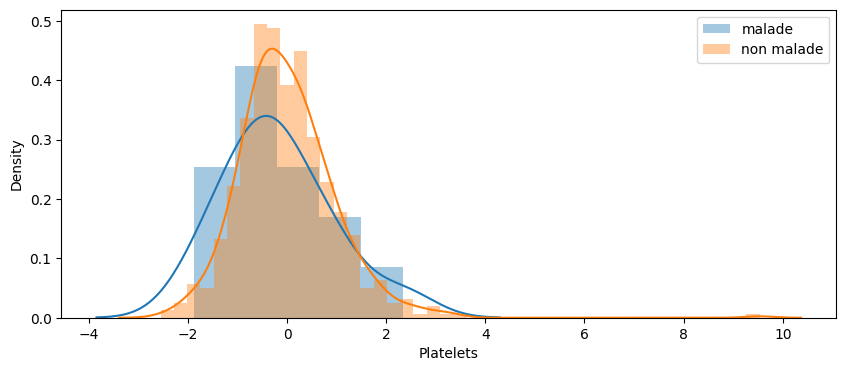

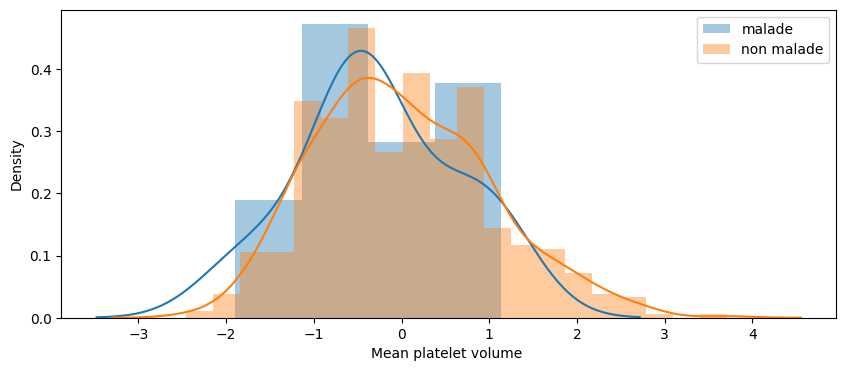

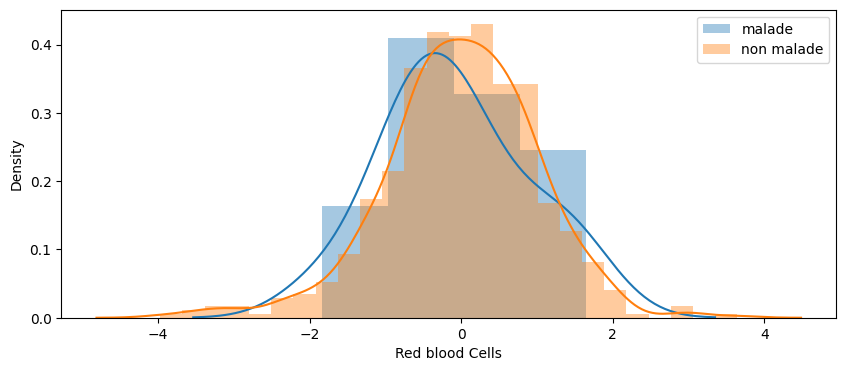

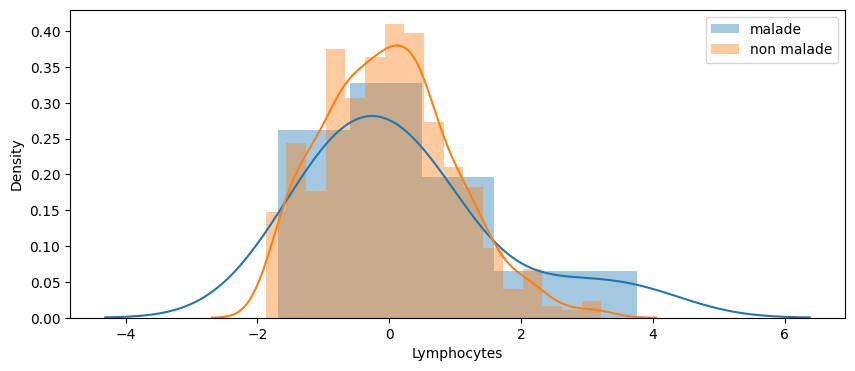

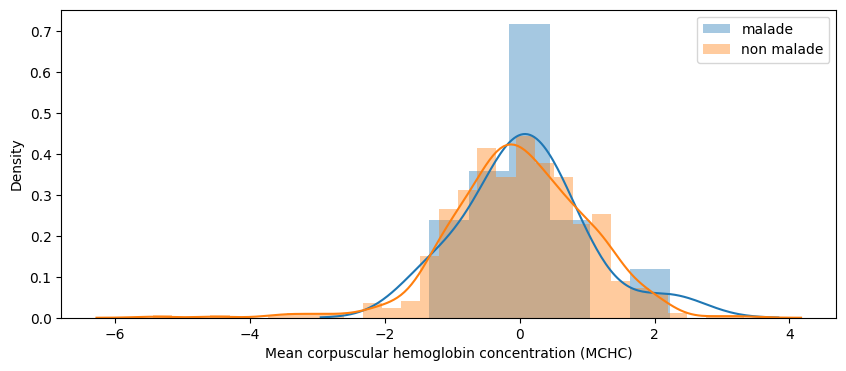

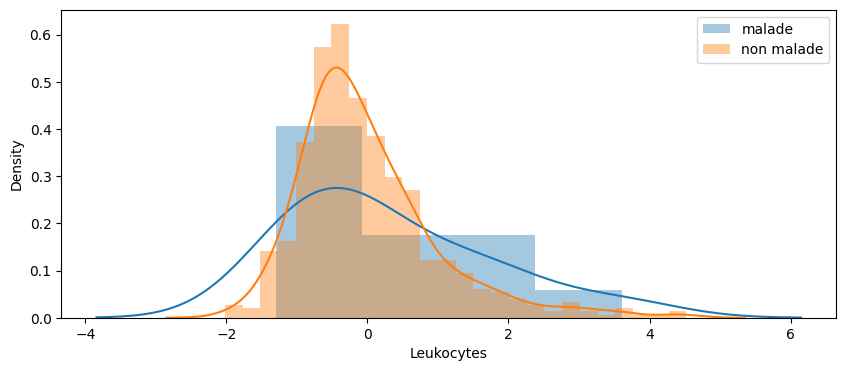

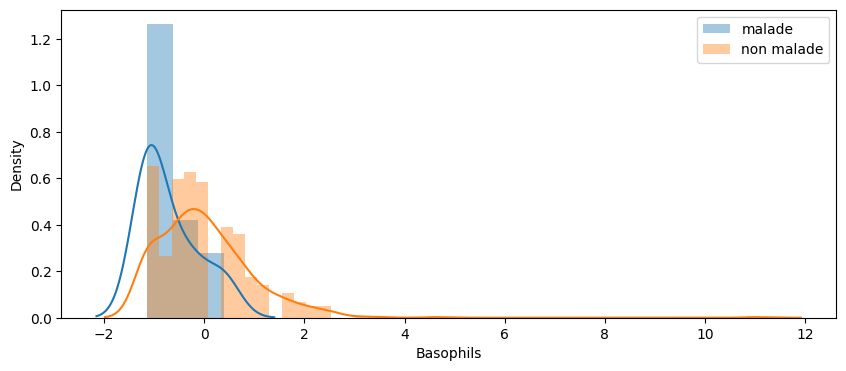

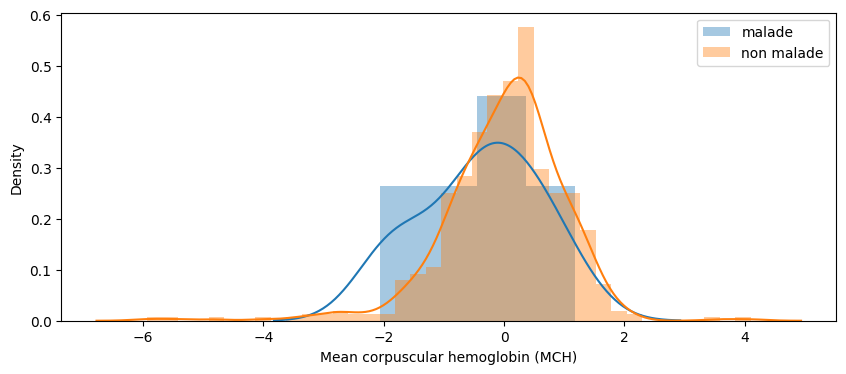

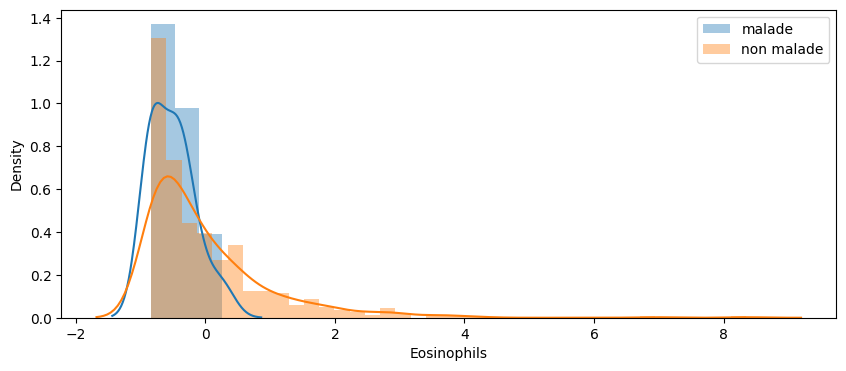

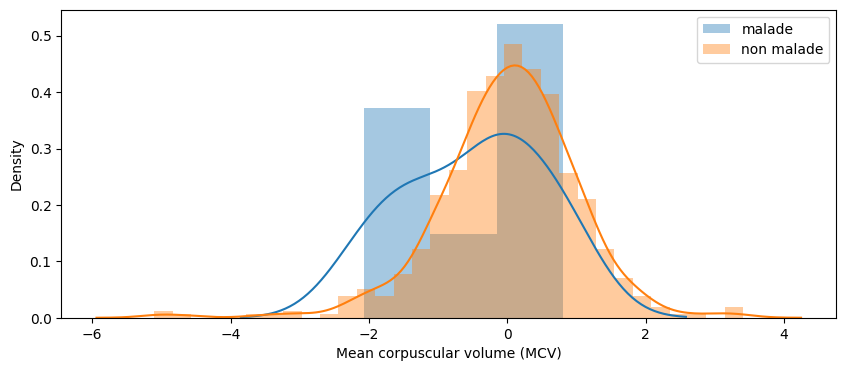

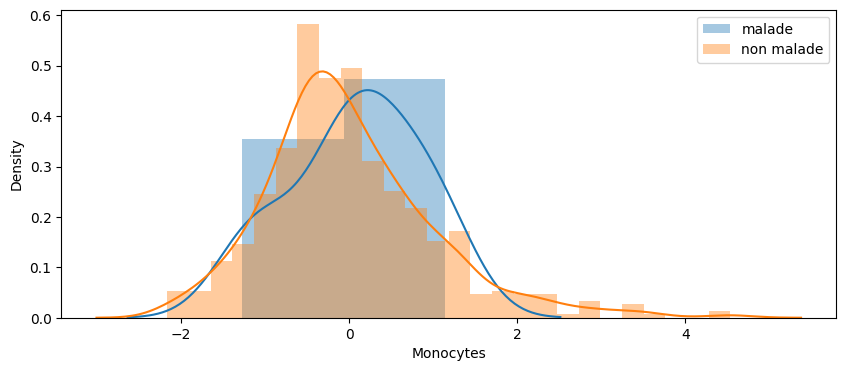

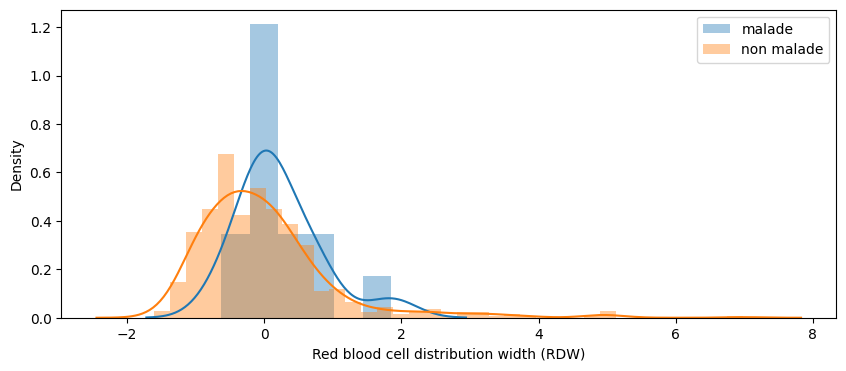

In [193]:
for feature in bloodtest_features:
    plt.figure()
    sns.distplot(df_malade[feature], label='malade')
    sns.distplot(df_non_malade[feature], label='non malade')
    plt.legend()
    plt.show()

<font color='red'>**Interprétation:**</font> 
Nous remarquons que les taux des **Lymphocytes, Leukocytes, MCH, MCV** sont différents entre les personnes malades et non malades. Pour rendre ces constations robustes il va falloi formuler des tests d'hypothèses pour comparer les moyennes des ces taux. 

## 1.4.4.1. Relation hospitalisation / être malade

A present, nous nous intéressons aux trois variables **Patient addmited to regular ward (1=yes, 0=no)**, **Patient addmited to semi-intensive unit (1=yes, 0=no)** et **Patient addmited to intensive care unit (1=yes, 0=no)** qui indiquent l'état d'hospitalisation des individus soient: patient admis au service de surveillance, soins semi-intensive, et soins intensifs. 

Nous commençons par écrire une fonction qui s'appelle hospitalisation:

In [194]:
def hospitalisation(dataframe=df_covid):
    if dataframe['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif dataframe['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive'
    elif dataframe['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'autre'

In [195]:
# Créer une variable hopitalisation dans le df_covid 
df_covid['hospitalisation'] = df_covid.apply(hospitalisation, axis=1)

In [196]:
df_covid.head(2)

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  \
0             NaN                     NaN                     NaN   
1    not_detected                negative                negative   

   etre_malade hospitalisation  
0        False           autre  
1        False           autre

Pour afficher la relation qui pourrait avoir entre les taux sanguins des individus qui sont situés dans les différents services de l'hopital avec leurs états d'hospitalisation on trace les graphiques suivants:

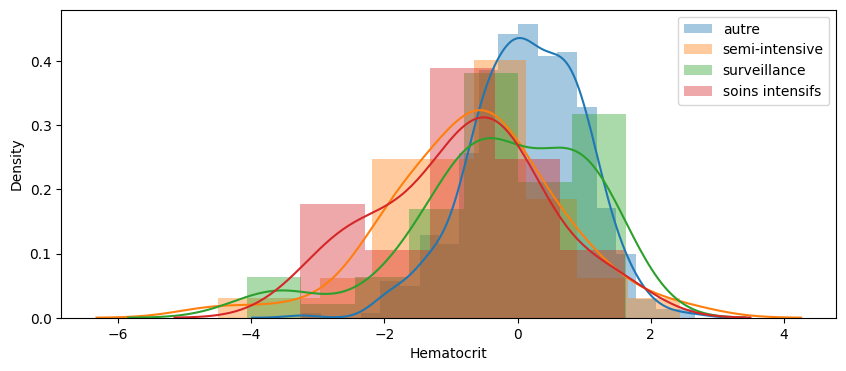

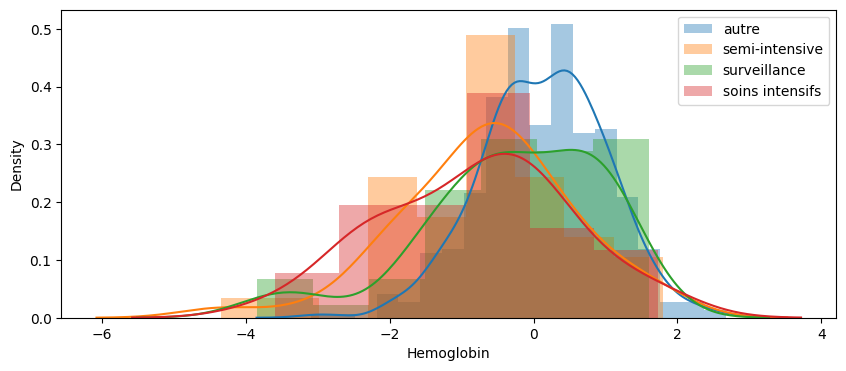

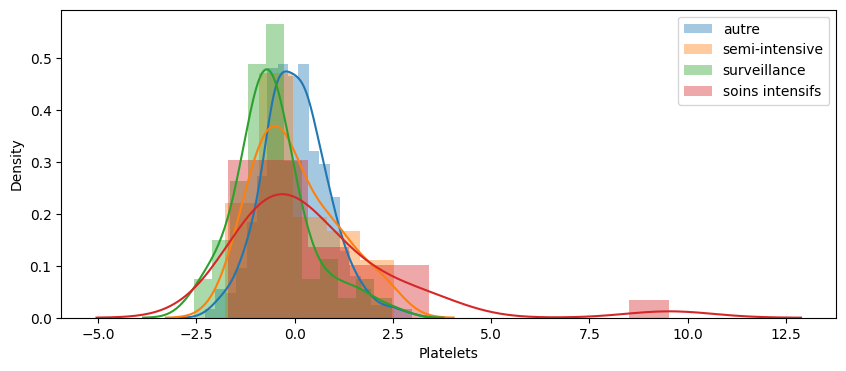

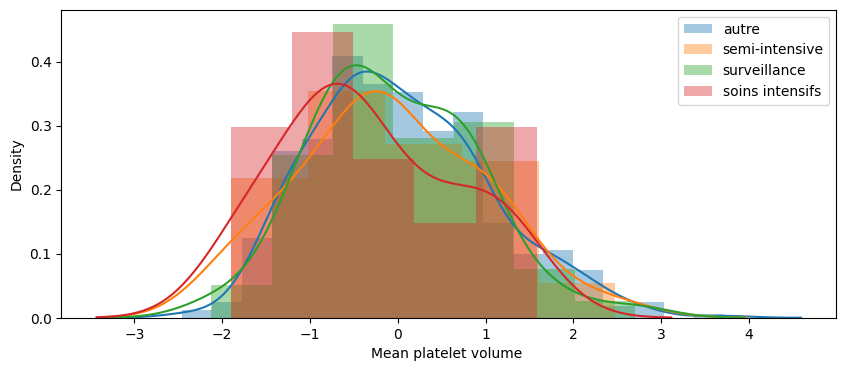

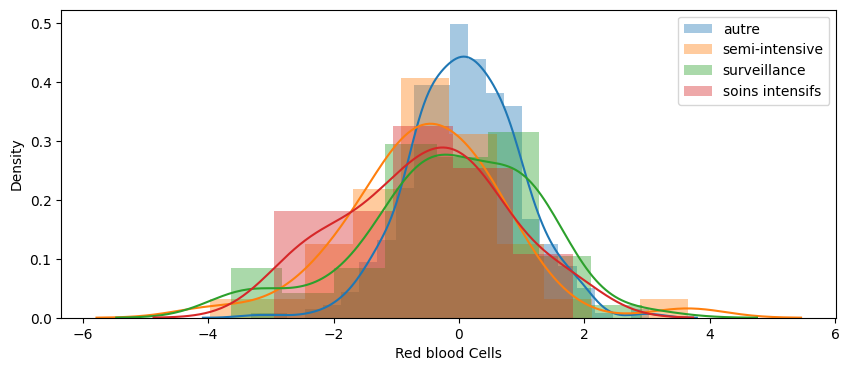

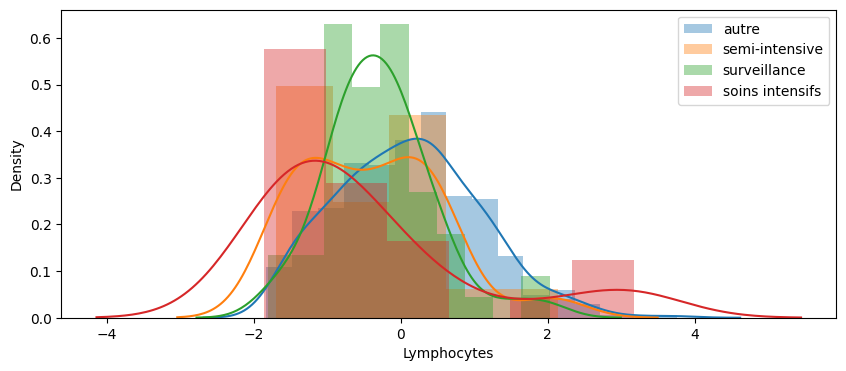

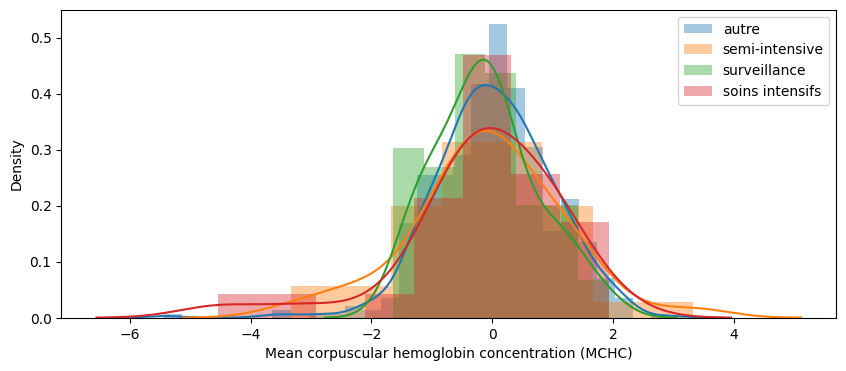

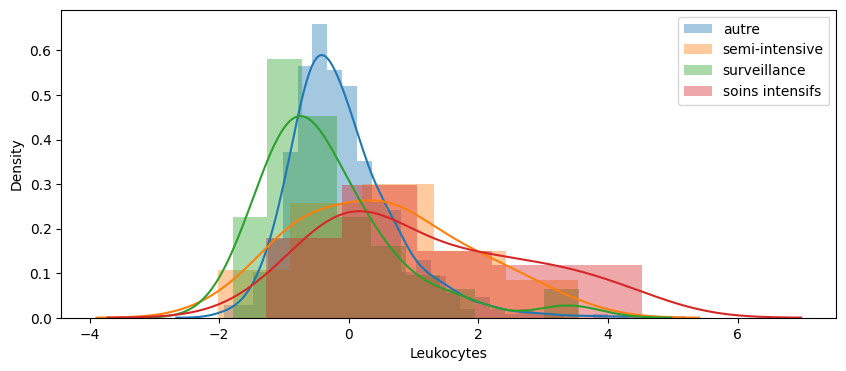

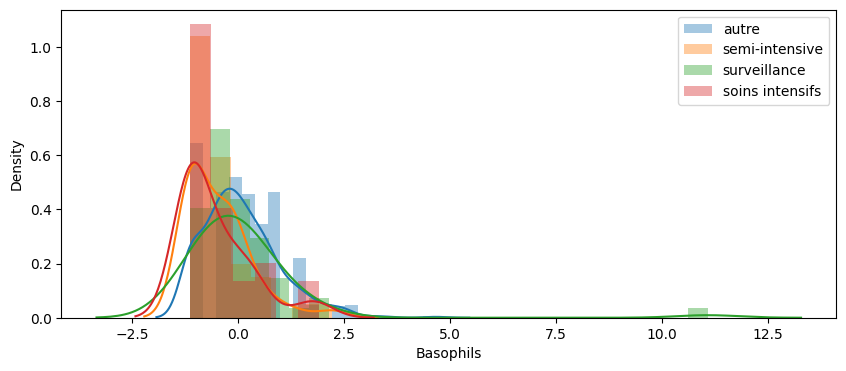

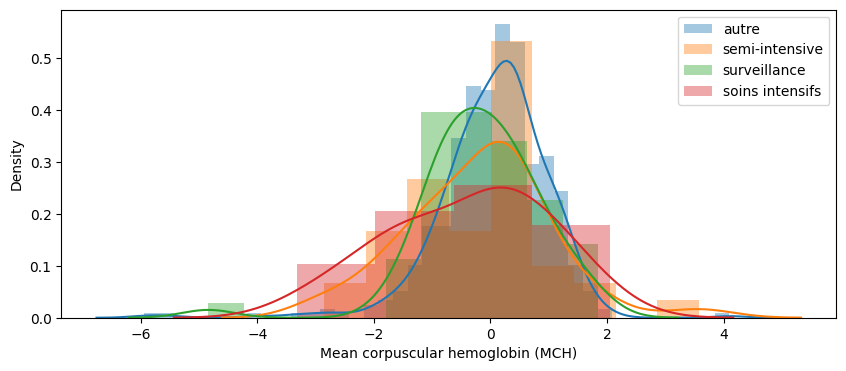

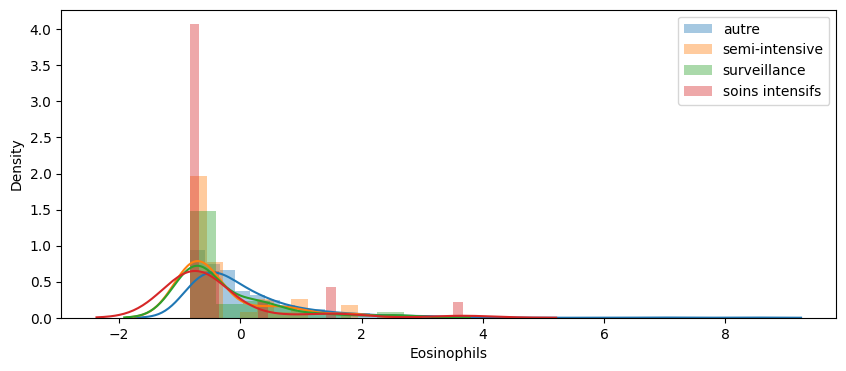

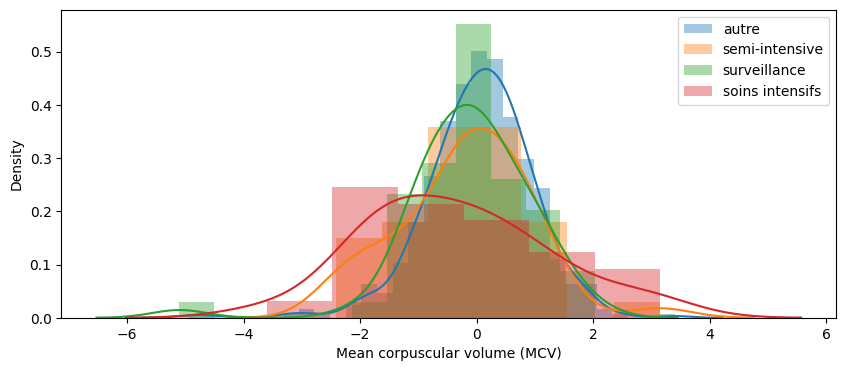

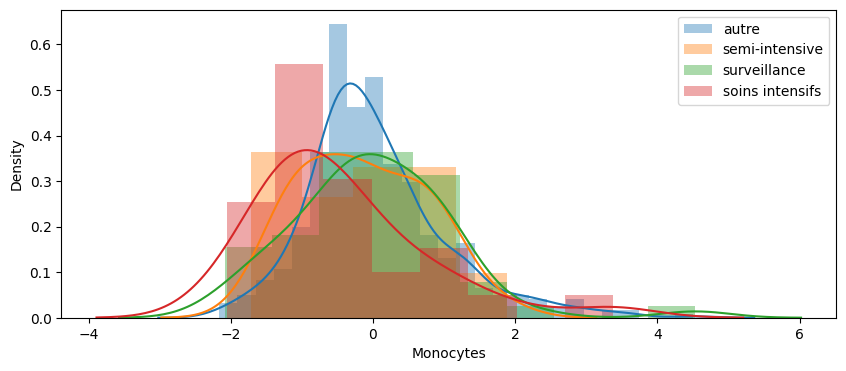

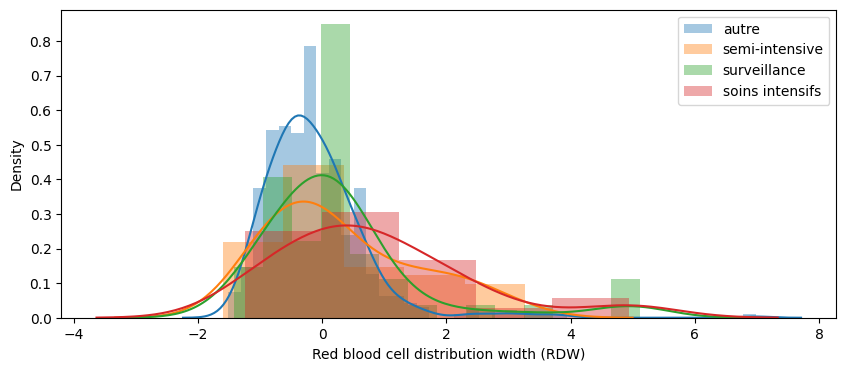

In [197]:
# 
for feature in bloodtest_features:
    plt.figure()
    for categorie in df_covid['hospitalisation'].unique():
        sns.distplot(df_covid[df_covid['hospitalisation'] == categorie][feature], label=categorie)
    plt.legend()
    plt.show()

<font color='red'>**Interprétation:**</font> 

On remarque que les individus hospitalisés en soins intensifs ont un taux de **Leukocytes, MCH** et  **MCV** différents des ceux qui sont en surveillance normale ou autre; On pourrait avoir un oautre objectif qui consiste à faire la bonne l'affectation des gens dans les services selon par exemple leur taux de Leukocytes, etc.. (autre objectif de prédiction).

<a id="section15"></a> 
# 1.5. Validations des tests d'hypothèse

Les individus atteints du coivd-19 ont des taux de leukocytes, Monocytes, Patletes significativeetn différents.
Les individus attiends d'une quelconque maladie ont des taux significativement différents.

$(H0):$ Les taux moyens sont égaux chez les indiviuds testés positifs et ceux testés négatifs.

$(H1):$ Les taux moyens sont différents chez les indiviuds testés positifs et ceux testés négatifs.

Pour tester cette hypothèse, nous allons utiliser le test de Stutent (T-Test). ce test permet de vérifier si la moyenne entre deux distributions est significativement différente. 
Une condition pou pouvoir appliquer ce test et que les deux échantillons doivent avoir la même taille, en particulier dans notre cas: le nombre de gens testés positifs doit égal au nombre des gens testés négatifs. Cependant, dans notre cas, ce n'est pas le cas. Par conséquent, nous allons faire de sous-échantillonnage: on choisit aléatoirement un sous-échantillon de **df_covid_neg** de même taille que celui de l'échantillon **df_covid_pos**

In [198]:
# Importer le ttest_ind de scipy
from scipy.stats import ttest_ind
n_samples_pos, _ = df_covid_pos.shape
df_covid_neg.sample(n_samples_pos)
df_covid_neg_samples = df_covid_neg.sample(n_samples_pos)

In [199]:
# Dimensions
n_samples_pos, _ = df_covid_pos.shape
n_samples_pos

558

In [200]:
# dmensions du df_covid_neg
df_covid_neg.shape

(5086, 38)

In [201]:
# sous-échantillonnage
df_covid_neg.sample(n_samples_pos).head(2)

Patient age quantile SARS-Cov-2 exam result  \
4038                    19               negative   
1837                    15               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
4038                                               0   
1837                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
4038                                                  0       
1837                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
4038                                                  0             NaN   
1837                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
4038         NaN        NaN                    NaN              NaN   
1837         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
4038          NaN                                               NaN   
1837          NaN                                               NaN   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
4038         NaN        NaN                                NaN          NaN   
1837         NaN        NaN                                NaN          NaN   

      Mean corpuscular volume (MCV)  Monocytes  \
4038                            NaN        NaN   
1837                            NaN        NaN   

      Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
4038                                      NaN                         NaN   
1837                                      NaN                not_detected   

       Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
4038           NaN           NaN             NaN             NaN   
1837  not_detected  not_detected    not_detected    not_detected   

     Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
4038                    NaN              NaN             NaN   
1837           not_detected     not_detected    not_detected   

     Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
4038                      NaN           NaN             NaN             NaN   
1837             not_detected  not_detected    not_detected    not_detected   

     CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
4038             NaN             NaN                  NaN             NaN   
1837    not_detected    not_detected         not_detected    not_detected   

     Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  
4038             NaN                     NaN                     NaN  
1837    not_detected                     NaN                     NaN

In [202]:
# On réécrit le df_covid sous-échantillonné
df_covid_neg_samples = df_covid_neg_samples.sample(n_samples_pos)

On choisit un seuil $\alpha=2\%$. On vérifie si la p-valeur issue du test est inférieur à $\alpha$ et si tel est le cas on rejette $(H0)$ sinon on retourne $0$.

In [203]:
# Test de Student 
def t_test(col):
    alpha = 0.02# 2%
    stat, p = ttest_ind(df_covid_neg.sample(n_samples_pos)[col].dropna(), df_covid_pos[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return '1'

In [204]:
bloodtest_features

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [205]:
# 
for feature in bloodtest_features:
    print(f'{feature:-<70} {t_test(feature)}')

Hematocrit------------------------------------------------------------ H0 rejetée
Hemoglobin------------------------------------------------------------ 1
Platelets------------------------------------------------------------- H0 rejetée
Mean platelet volume ------------------------------------------------- 1
Red blood Cells------------------------------------------------------- 1
Lymphocytes----------------------------------------------------------- 1
Mean corpuscular hemoglobin concentration (MCHC)---------------------- 1
Leukocytes------------------------------------------------------------ H0 rejetée
Basophils------------------------------------------------------------- 1
Mean corpuscular hemoglobin (MCH)------------------------------------- 1
Eosinophils----------------------------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)----------------------------------------- 1
Monocytes------------------------------------------------------------- H0 rejetée
Red bl

<font color='red'>**Interprétation:**</font> 

On remarque les variables **Platelets, Red blood Cells, Leukocytes** et **Eosinophils** semblent être des variables significativement différentes pour les gens atteints du Corona virus par rapport aux gens sui ne sont pas atteints au Corona. Donc on peut conclure que ces taux moyens ne sont pas égaux chez les individus testés positifs et négatifs. 

#### 

<a id="section2"></a> 
# 2. Pré-traitement de données

Avant de se lancer dans l'étape de pré-traitement des données, il est important de découper ("splittter") les données en train et test. On rappelle la régle de pré-traitement: on ``fit`` sur les données train et ``transform``sur les données test pour éviter la fuite des données. Pour le découpage de données on utilise la méthode `train_test_split` de scikit-learn: 

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`
`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html`

In [206]:
df_covid_copy = df_covid.copy()

In [207]:
df_covid = df_covid.copy()

In [208]:
df_covid.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [209]:
df_covid.shape

(5644, 40)

In [210]:
df_covid_train, df_covid_test = train_test_split(df_covid, test_size=0.2, random_state=0)

In [211]:
# Afficher les dimensions  de: 
df_covid_train.shape

(4515, 40)

In [212]:
df_covid_test.shape

(1129, 40)

In [213]:
df_covid.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [214]:
# On affiche de nouveau les types de features
df_covid.dtypes

Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils              

In [215]:
df_covid_train['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [216]:
df_covid_test['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

In [217]:
for feature in df_covid_train.select_dtypes('object'):
    print(f'{feature :-<50} {df_covid_train[feature].unique()}') # créer un sytème de marge

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'not_detected' 'detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

In [218]:
df_covid_train['etre_malade'][:5]

543     False
4937    False
2884    False
1837    False
2228    False
Name: etre_malade, dtype: bool

In [219]:
df_covid_train["Patient age quantile"][:5]

543     18
4937    11
2884     3
1837    15
2228     7
Name: Patient age quantile, dtype: int64

In [220]:
df_covid_train["hospitalisation"][:5]

543     semi-intensive
4937             autre
2884             autre
1837             autre
2228             autre
Name: hospitalisation, dtype: object

In [221]:
# Changer le type de la feautre Patient age quantile de int64 en float
df_covid_train['Patient age quantile'] = df_covid_train['Patient age quantile'].astype(float)
df_covid_test['Patient age quantile'] = df_covid_test['Patient age quantile'].astype(float)

In [222]:
# Petite vérification
# df_covid_train.dtypes

In [223]:
np.unique(df_covid_train["hospitalisation"])

array(['autre', 'semi-intensive', 'soins intensifs', 'surveillance'],
      dtype=object)

In [224]:
# Encodage de la feature "hospitalisation"
code_hopsitalisation = {
    'autre': 0,
    'surveillance': 1,
    'semi-intensive': 2,
    'soins intensifs': 3
}

df_covid_train["hospitalisation"] = df_covid_train["hospitalisation"].map(code_hopsitalisation)
df_covid_test["hospitalisation"] = df_covid_test["hospitalisation"].map(code_hopsitalisation) 

In [225]:
# Petite vérification
df_covid_train.dtypes

Patient age quantile                                     float64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils              

In [226]:
df_covid_train['etre_malade'] = df_covid_train['etre_malade'].astype(int)
df_covid_test['etre_malade'] = df_covid_test['etre_malade'].astype(int)

In [227]:
# Petite vérification
df_covid_train.dtypes

Patient age quantile                                     float64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils              

In [228]:
def encodage(dataframe): # on peut passer en paramètre soit le df_covid_train ou le df_covid_test
    code = {'positive': 1,
       'negative': 0,
       'detected': 1,
       'not_detected': 0}
    for feature in dataframe.select_dtypes('object'):
        dataframe[feature] = dataframe[feature].map(code)
        # dataframe[feature] = dataframe[feature].astype('int')
        dataframe[feature] = dataframe[feature].astype(float).astype('Int64')
    
    # dataframe = dataframe.replace({pd.NA: np.nan})
    return dataframe

Les modalités de la variable `SARS-Cov-2 exam result` sont: negative et positive. On peut appliquer un un labelEncoder pour son encodage.

In [229]:
df_covid_train.head()

Patient age quantile SARS-Cov-2 exam result  \
543                   18.0               negative   
4937                  11.0               negative   
2884                   3.0               negative   
1837                  15.0               negative   
2228                   7.0               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
543                                                0   
4937                                               0   
2884                                               0   
1837                                               0   
2228                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
543                                                   1       
4937                                                  0       
2884                                                  0       
1837                                                  0       
2228                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
543                                                   0        1.358055   
4937                                                  0             NaN   
2884                                                  0             NaN   
1837                                                  0             NaN   
2228                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
543     1.356092  -0.228491              -0.438097         1.142196   
4937         NaN        NaN                    NaN              NaN   
2884         NaN        NaN                    NaN              NaN   
1837         NaN        NaN                    NaN              NaN   
2228         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
543     -0.517481                                          0.244149   
4937          NaN                                               NaN   
2884          NaN                                               NaN   
1837          NaN                                               NaN   
2228          NaN                                               NaN   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
543     0.275501  -0.223767                           0.178175    -0.793368   
4937         NaN        NaN                                NaN          NaN   
2884         NaN        NaN                                NaN          NaN   
1837         NaN        NaN                                NaN          NaN   
2228         NaN        NaN                                NaN          NaN   

      Mean corpuscular volume (MCV)  Monocytes  \
543                        0.066045   0.987864   
4937                            NaN        NaN   
2884                            NaN        NaN   
1837                            NaN        NaN   
2228                            NaN        NaN   

      Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
543                                 -0.005877                         NaN   
4937                                      NaN                         NaN   
2884                                      NaN                         NaN   
1837                                      NaN                not_detected   
2228                                      NaN                not_detected   

       Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
543            NaN           NaN             NaN             NaN   
4937           NaN           NaN             NaN             NaN   
2884           NaN           NaN             NaN             NaN   
1837  not_detected  not_detected    not_detected    not_detected   
2228  not_detected  not_detected    not_detected    not_detected   

     Rhinovirus/En

In [230]:
df_covid_train = encodage(df_covid_train)
df_covid_test = encodage(df_covid_test)

In [231]:
df_covid_train.dtypes

Patient age quantile                                     float64
SARS-Cov-2 exam result                                     Int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils              

In [232]:
# Construction features numériques et catégorielles
categorical_features = df_covid_train.select_dtypes('Int64').columns
numeric_features = df_covid_train.select_dtypes('float').columns

In [233]:
categorical_features

Index(['SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test',
       'hospitalisation'],
      dtype='object')

In [234]:
numeric_features

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [235]:
df_covid_train.head()

Patient age quantile  SARS-Cov-2 exam result  \
543                   18.0                       0   
4937                  11.0                       0   
2884                   3.0                       0   
1837                  15.0                       0   
2228                   7.0                       0   

      Patient addmited to regular ward (1=yes, 0=no)  \
543                                                0   
4937                                               0   
2884                                               0   
1837                                               0   
2228                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
543                                                   1       
4937                                                  0       
2884                                                  0       
1837                                                  0       
2228                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
543                                                   0        1.358055   
4937                                                  0             NaN   
2884                                                  0             NaN   
1837                                                  0             NaN   
2228                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
543     1.356092  -0.228491              -0.438097         1.142196   
4937         NaN        NaN                    NaN              NaN   
2884         NaN        NaN                    NaN              NaN   
1837         NaN        NaN                    NaN              NaN   
2228         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
543     -0.517481                                          0.244149   
4937          NaN                                               NaN   
2884          NaN                                               NaN   
1837          NaN                                               NaN   
2228          NaN                                               NaN   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
543     0.275501  -0.223767                           0.178175    -0.793368   
4937         NaN        NaN                                NaN          NaN   
2884         NaN        NaN                                NaN          NaN   
1837         NaN        NaN                                NaN          NaN   
2228         NaN        NaN                                NaN          NaN   

      Mean corpuscular volume (MCV)  Monocytes  \
543                        0.066045   0.987864   
4937                            NaN        NaN   
2884                            NaN        NaN   
1837                            NaN        NaN   
2228                            NaN        NaN   

      Red blood cell distribution width (RDW)  Respiratory Syncytial Virus  \
543                                 -0.005877                         <NA>   
4937                                      NaN                         <NA>   
2884                                      NaN                         <NA>   
1837                                      NaN                            0   
2228                                      NaN                            0   

      Influenza A  Influenza B  Parainfluenza 1  CoronavirusNL63  \
543          <NA>         <NA>             <NA>             <NA>   
4937         <NA>         <NA>             <NA>             <NA>   
2884         <NA>         <NA>             <NA>             <NA>   
1837            0            0                0                0   
2228            0            0                0                0   

      

## Imputation des données

In [236]:
categoricalImputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')
numericImputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [237]:
for feature in categorical_features:
    df_covid_train[feature] = categoricalImputer.fit_transform(df_covid_train[feature].values.reshape(-1,1)).ravel() 
    df_covid_test[feature] = categoricalImputer.transform(df_covid_test[feature].values.reshape(-1,1)).ravel()

In [238]:
for feature in numeric_features:
    print(feature)
    df_covid_train[feature] = numericImputer.fit_transform(df_covid_train[feature].values.reshape(-1,1)).ravel()  
    df_covid_test[feature] = numericImputer.transform(df_covid_test[feature].values.reshape(-1,1)).ravel()  

Patient age quantile
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


In [239]:
# df_covid_train['Respiratory Syncytial Virus']

In [240]:
for feature in numeric_features:
    print(feature)

Patient age quantile
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


In [241]:
df_covid_train.head()

Patient age quantile SARS-Cov-2 exam result  \
543                   18.0                      0   
4937                  11.0                      0   
2884                   3.0                      0   
1837                  15.0                      0   
2228                   7.0                      0   

      Patient addmited to regular ward (1=yes, 0=no)  \
543                                                0   
4937                                               0   
2884                                               0   
1837                                               0   
2228                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
543                                                   1       
4937                                                  0       
2884                                                  0       
1837                                                  0       
2228                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
543                                                   0        1.358055   
4937                                                  0        0.000977   
2884                                                  0        0.000977   
1837                                                  0        0.000977   
2228                                                  0        0.000977   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
543     1.356092  -0.228491              -0.438097         1.142196   
4937   -0.005148  -0.025967               0.031827         0.001357   
2884   -0.005148  -0.025967               0.031827         0.001357   
1837   -0.005148  -0.025967               0.031827         0.001357   
2228   -0.005148  -0.025967               0.031827         0.001357   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
543     -0.517481                                          0.244149   
4937     0.041615                                         -0.025990   
2884     0.041615                                         -0.025990   
1837     0.041615                                         -0.025990   
2228     0.041615                                         -0.025990   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
543     0.275501  -0.223767                           0.178175    -0.793368   
4937   -0.032261   0.010771                          -0.012707     0.037661   
2884   -0.032261   0.010771                          -0.012707     0.037661   
1837   -0.032261   0.010771                          -0.012707     0.037661   
2228   -0.032261   0.010771                          -0.012707     0.037661   

      Mean corpuscular volume (MCV)  Monocytes  \
543                        0.066045   0.987864   
4937                      -0.001224   0.022664   
2884                      -0.001224   0.022664   
1837                      -0.001224   0.022664   
2228                      -0.001224   0.022664   

      Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
543                                 -0.005877                           0   
4937                                -0.005337                           0   
2884                                -0.005337                           0   
1837                                -0.005337                           0   
2228                                -0.005337                           0   

     Influenza A Influenza B Parainfluenza 1 CoronavirusNL63  \
543            0           0               0               0   
4937           0           0               0               0   
2884           0           0               0               0   
1837           0           0               0               0   
2228           0           0               0               0   

     Rhinovirus/Enterovirus Coronavirus HK

## Normalisation

In [242]:
numeric_features

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [243]:
scaleStd = StandardScaler()
scaleMinmax = MinMaxScaler()
for feature in numeric_features:
    df_covid_train[feature] = scaleStd.fit_transform(df_covid_train[feature].values.reshape(-1,1)).ravel()
    df_covid_test[feature] = scaleStd.transform(df_covid_test[feature].values.reshape(-1,1)).ravel()

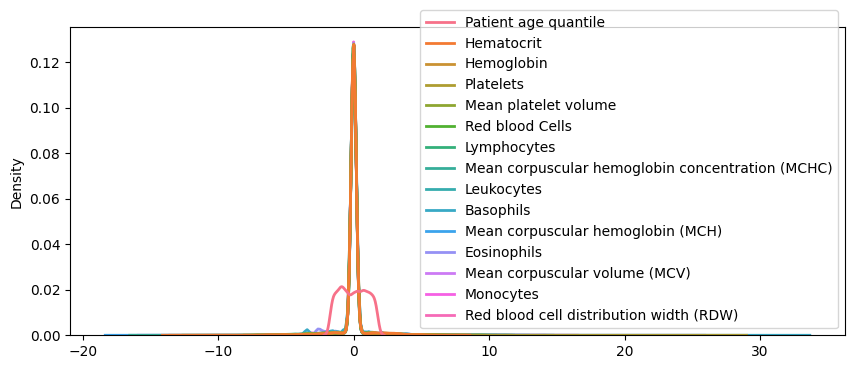

In [244]:
plt.rcParams["figure.figsize"] = (10,4)
sns.kdeplot(data=df_covid_train[numeric_features], lw=2)
plt.show()

<a id="section3"></a> 
# Modélisation 

## Définition de $X_\text{train}, X_\text{test}, y_\text{train}, y_\text{test}$

In [245]:
X_train = df_covid_train.drop('SARS-Cov-2 exam result', axis=1)
y_train = df_covid_train['SARS-Cov-2 exam result']

X_test = df_covid_test.drop('SARS-Cov-2 exam result', axis=1)
y_test = df_covid_test['SARS-Cov-2 exam result']

In [246]:
# En travaillant directement avec y_train, le bug suivant se produit:
# 218     raise ValueError("Unknown label type: %r" % y_type)
# ValueError: Unknown label type: 'unknown'

y_train = y_train.to_numpy().astype(np.int64)
y_test = y_test.to_numpy().astype(np.int64)

In [247]:
## Fonction d'évaluation 
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    N, train_score, val_score = learning_curve(model, 
                                              X_train, 
                                              y_train, 
                                              cv=5, 
                                              scoring='f1',
                                              train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10,6))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='validation_score')
    plt.legend()
    plt.show()

[[1009    9]
 [ 106    5]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1018
           1       0.36      0.05      0.08       111

    accuracy                           0.90      1129
   macro avg       0.63      0.52      0.51      1129
weighted avg       0.85      0.90      0.86      1129



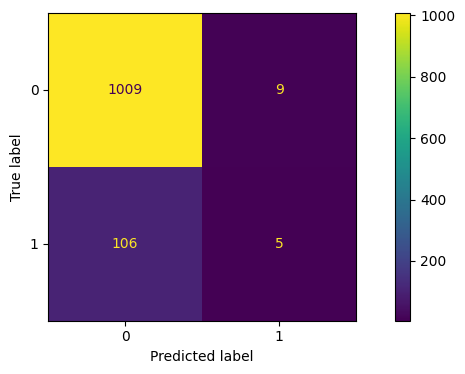

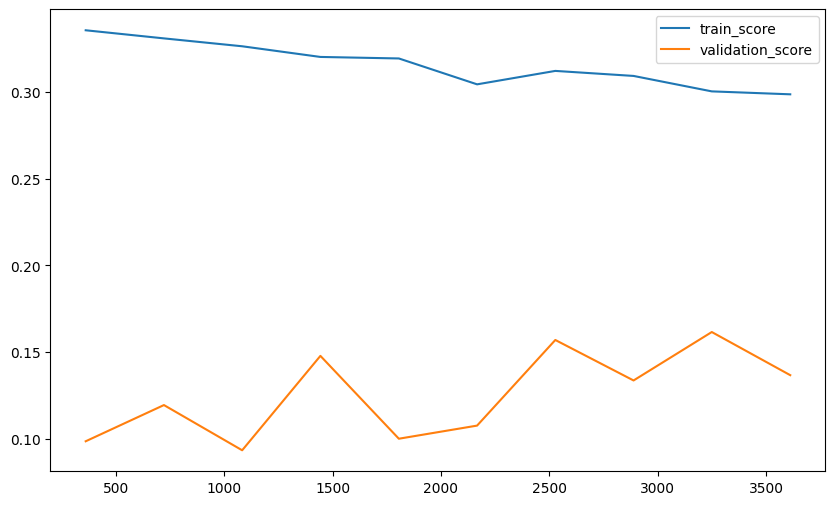

In [248]:
## Modèle 1: Arbres de décision

tree_model = DecisionTreeClassifier(random_state=0)
evaluation(tree_model)

[[1018    0]
 [ 106    5]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       1.00      0.05      0.09       111

    accuracy                           0.91      1129
   macro avg       0.95      0.52      0.52      1129
weighted avg       0.91      0.91      0.87      1129



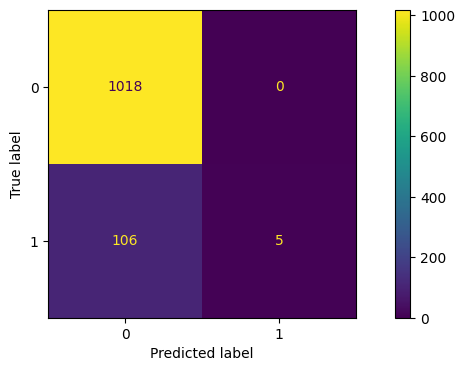

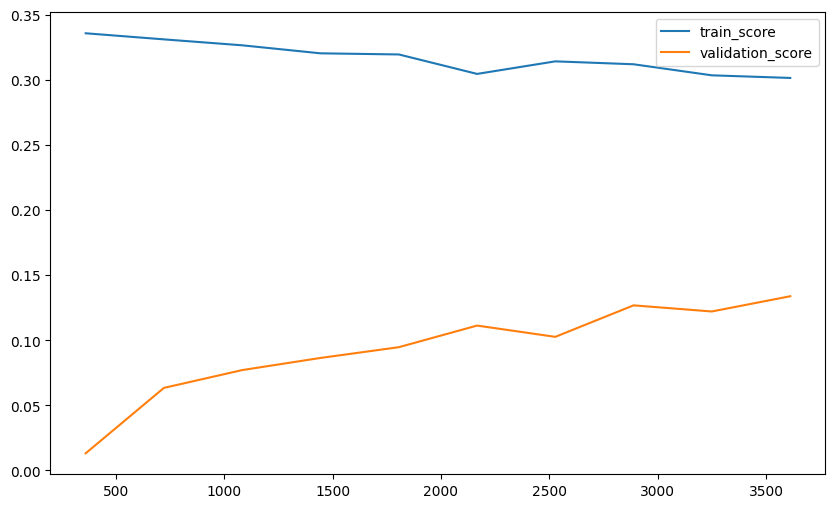

In [249]:
## Modèle 2: 
randforest_model = RandomForestClassifier(random_state=0)
evaluation(randforest_model)

In [250]:
randforest_model.feature_importances_

array([2.20790830e-01, 4.46136667e-02, 3.85211521e-03, 4.56585554e-03,
       3.54139810e-02, 3.51673477e-02, 5.76002971e-02, 3.54721182e-02,
       3.82178957e-02, 3.25065467e-02, 3.13661326e-02, 1.31345151e-01,
       2.18342307e-02, 2.89776152e-02, 4.64404751e-02, 3.06482681e-02,
       5.79424960e-02, 2.67131098e-02, 1.85253418e-03, 1.10386224e-03,
       7.08969985e-03, 6.22774264e-04, 7.49188995e-03, 2.34987987e-02,
       1.34819844e-03, 6.61837277e-04, 7.11595287e-04, 2.82687285e-05,
       5.87166675e-04, 4.83168352e-03, 7.90862059e-04, 6.52478018e-03,
       1.75108542e-04, 1.23894777e-03, 0.00000000e+00, 8.07378922e-03,
       2.46493374e-03, 1.03696059e-03, 4.63981769e-02])

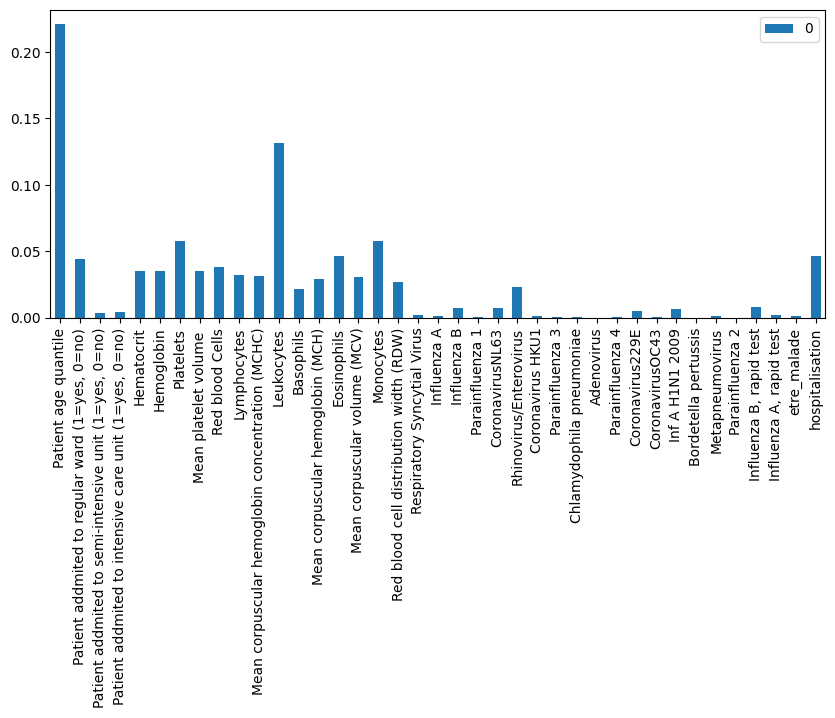

In [251]:
# Injecter ce tableau dans un dataframe
plt.rcParams["figure.figsize"] = (10,4)
pd.DataFrame(randforest_model.feature_importances_, index=X_train.columns).plot.bar()
plt.show()

[[1015    3]
 [ 107    4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.57      0.04      0.07       111

    accuracy                           0.90      1129
   macro avg       0.74      0.52      0.51      1129
weighted avg       0.87      0.90      0.86      1129



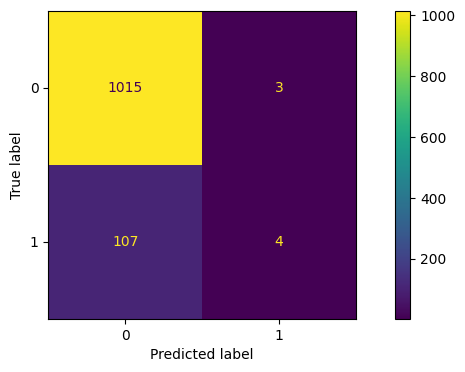

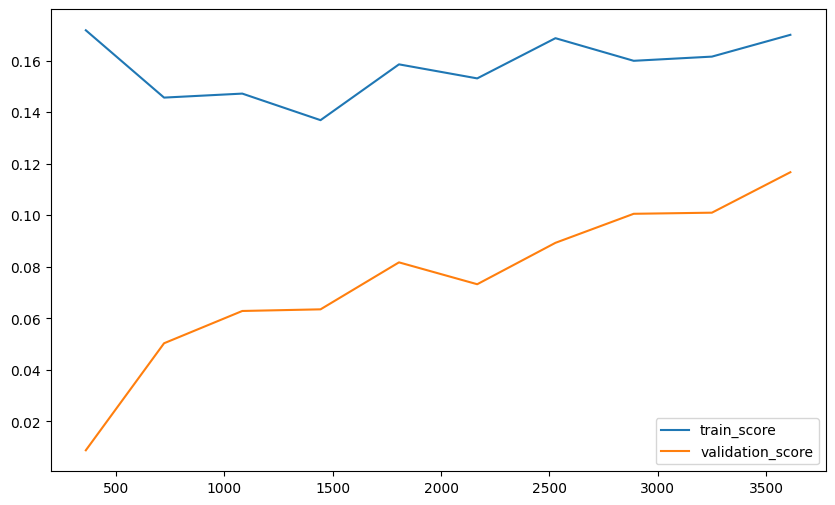

In [252]:
## KNN 
knn_model = KNeighborsClassifier()
evaluation(knn_model)

[[1015    3]
 [ 102    9]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.75      0.08      0.15       111

    accuracy                           0.91      1129
   macro avg       0.83      0.54      0.55      1129
weighted avg       0.89      0.91      0.87      1129



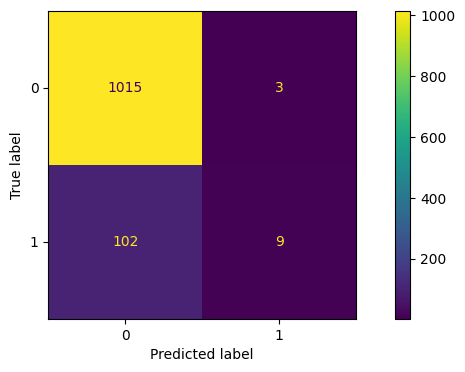

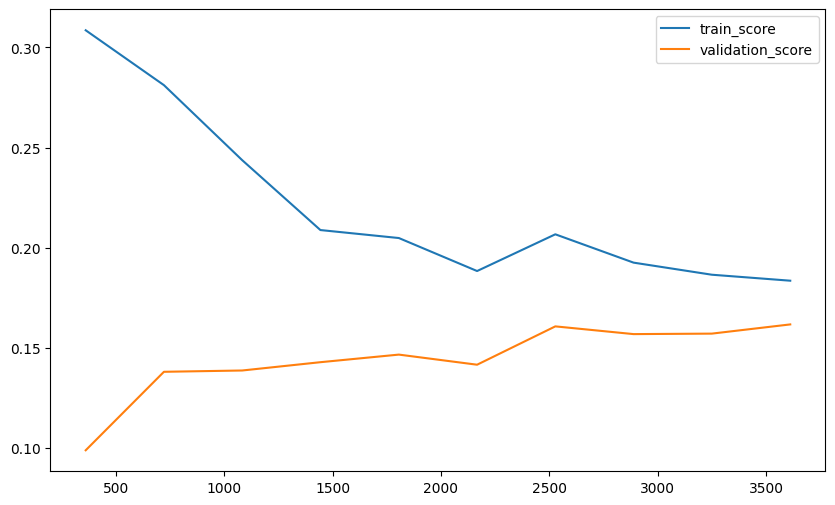

In [253]:
## Logistic regression 
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logistic_model = LogisticRegression(penalty=None, random_state=0)
evaluation(logistic_model)

[[1015    3]
 [ 103    8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.73      0.07      0.13       111

    accuracy                           0.91      1129
   macro avg       0.82      0.53      0.54      1129
weighted avg       0.89      0.91      0.87      1129



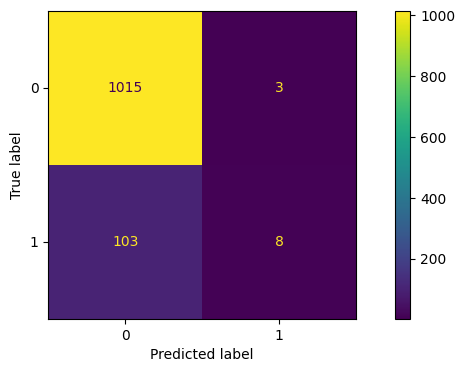

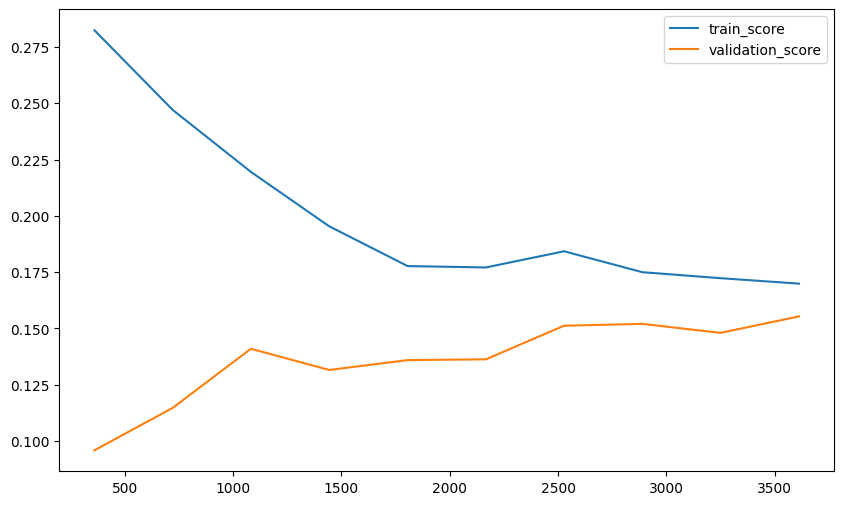

In [254]:
## Ridge
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
ridge_model = LogisticRegression(penalty='l2', random_state=0)
evaluation(ridge_model)

Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
‘lbfgs’ - [‘l2’, None]
‘liblinear’ - [‘l1’, ‘l2’]
‘newton-cg’ - [‘l2’, None]
‘newton-cholesky’ - [‘l2’, None]
‘sag’ - [‘l2’, None]
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

[[1015    3]
 [ 103    8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.73      0.07      0.13       111

    accuracy                           0.91      1129
   macro avg       0.82      0.53      0.54      1129
weighted avg       0.89      0.91      0.87      1129



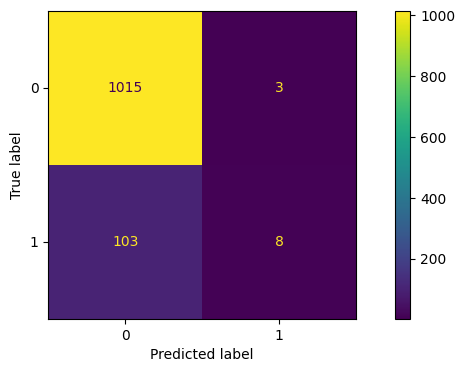

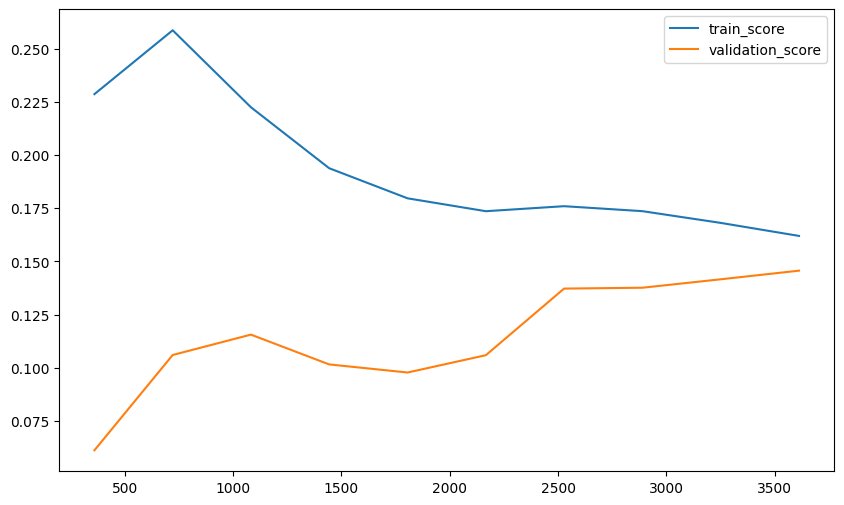

In [255]:
## Lasso
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lasso_model = LogisticRegression(penalty='l1', solver='saga', random_state=0)
evaluation(lasso_model)

In [256]:
## Elastic Net 
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=0)
# evaluation(elasticnet_model)

## Sélection de Features

In [257]:
from sklearn.feature_selection  import SelectKBest, f_classif

In [258]:
random_forest_model_select_features = make_pipeline(
    SelectKBest(f_classif, k=10), 
    RandomForestClassifier(random_state=0)
)
# on va chosisir les 10 premieres features, celles qui ont le lien le plus fort en terme de test ANOVA avec la target
# on garde les k meilleurs ANOVA les plus elévées 

[[1017    1]
 [ 106    5]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.83      0.05      0.09       111

    accuracy                           0.91      1129
   macro avg       0.87      0.52      0.52      1129
weighted avg       0.90      0.91      0.87      1129



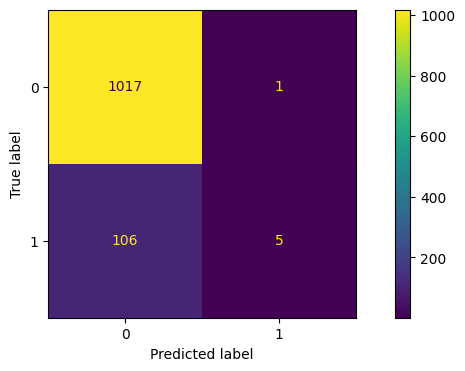

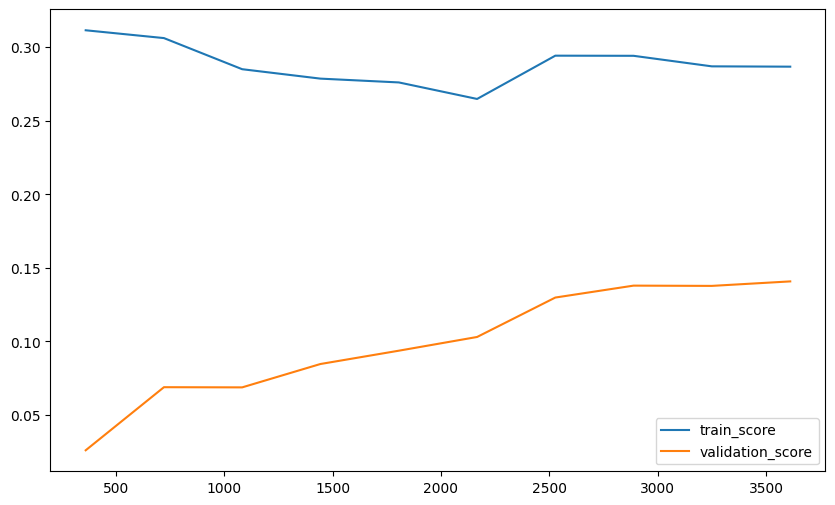

In [259]:
evaluation(random_forest_model_select_features)

[[1015    3]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.67      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.79      0.53      0.52      1129
weighted avg       0.88      0.90      0.87      1129



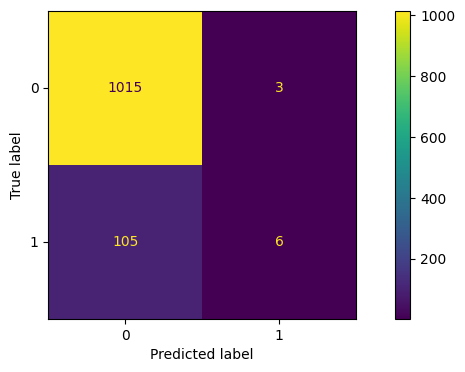

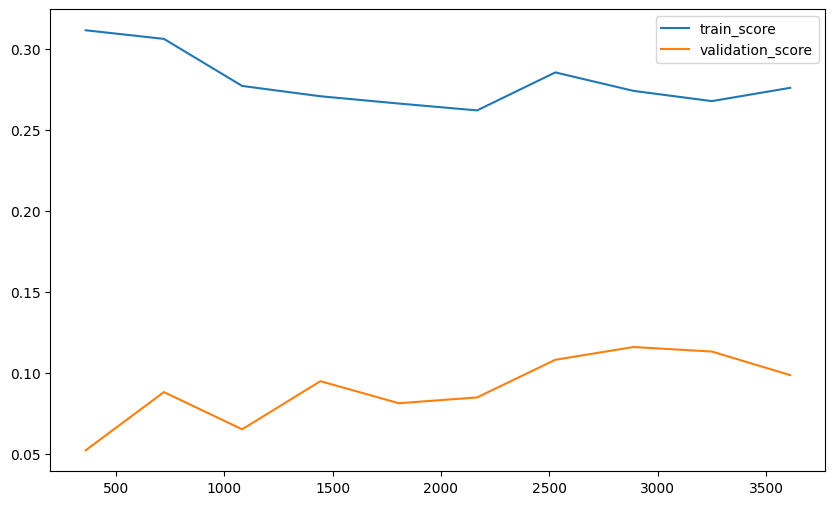

In [260]:
# k = 5
random_forest_model_select_features = make_pipeline(
    SelectKBest(f_classif, k=5), 
    RandomForestClassifier(random_state=0)
)
 
evaluation(random_forest_model_select_features)

In [261]:
## Expension en features polynomrials

[[1014    4]
 [ 103    8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.67      0.07      0.13       111

    accuracy                           0.91      1129
   macro avg       0.79      0.53      0.54      1129
weighted avg       0.88      0.91      0.87      1129



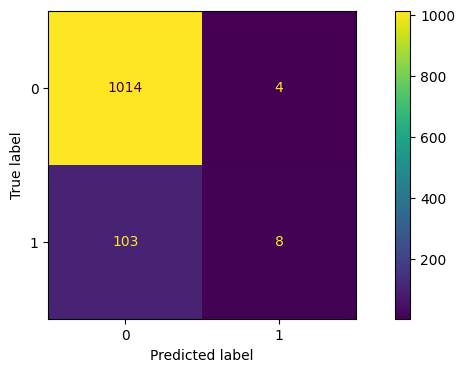

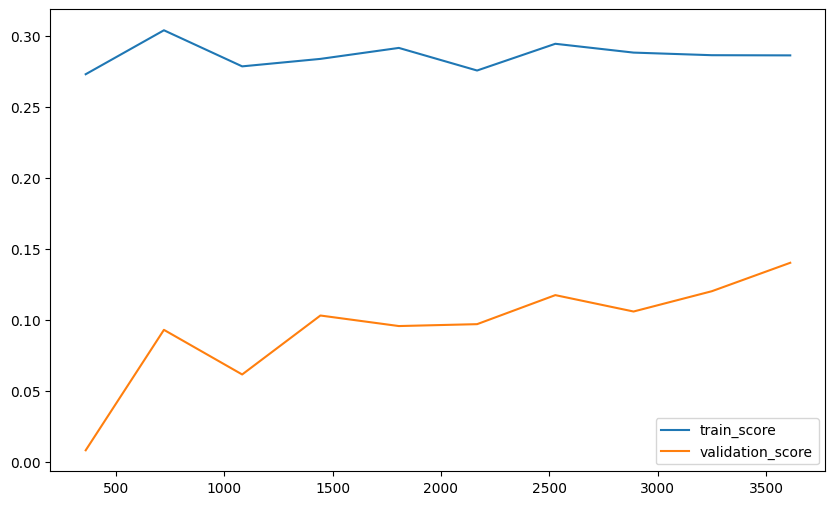

In [262]:
## 
random_forest_model_poly_expand_features = make_pipeline(
    PolynomialFeatures(2), SelectKBest(f_classif, k=10),
    RandomForestClassifier(random_state=0)
)
evaluation(random_forest_model_poly_expand_features)

## Panel de modèles prédictfs

On entraine de plusieurs modèles et on retient celui qui a la meilleur performance en terme de score f1 (pour la modalité positive). Ensuite on va tenter d'améliorer la performance de ce modèle en optimisant ses hyperparamètres grâce à uen série de plusierus algorithmes GridSearch CV.

In [263]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

# On laisse les modèles sur leurs hyperpramètres de base
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [264]:
list_of_models = {'RandomForest':RandomForest,
                  'AdaBoost':AdaBoost,
                  'SVM':SVM,
                  'KNN':KNN}

******************************************************************************************
RandomForest
******************************************************************************************
[[1014    4]
 [ 103    8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.67      0.07      0.13       111

    accuracy                           0.91      1129
   macro avg       0.79      0.53      0.54      1129
weighted avg       0.88      0.91      0.87      1129



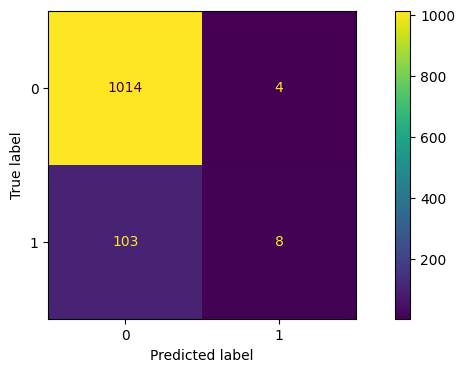

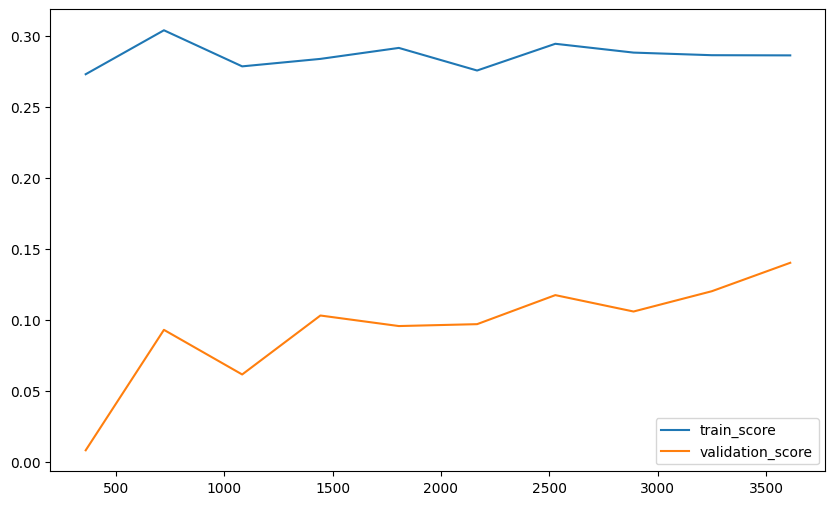

******************************************************************************************
AdaBoost
******************************************************************************************
[[1015    3]
 [ 104    7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.70      0.06      0.12       111

    accuracy                           0.91      1129
   macro avg       0.80      0.53      0.53      1129
weighted avg       0.89      0.91      0.87      1129



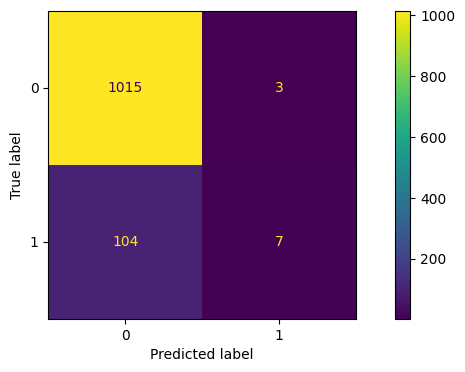

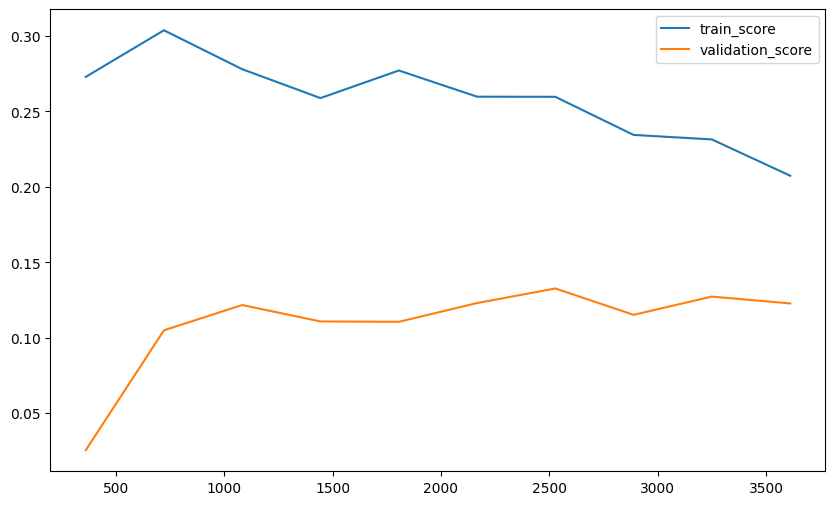

******************************************************************************************
SVM
******************************************************************************************
[[1018    0]
 [ 107    4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       1.00      0.04      0.07       111

    accuracy                           0.91      1129
   macro avg       0.95      0.52      0.51      1129
weighted avg       0.91      0.91      0.86      1129



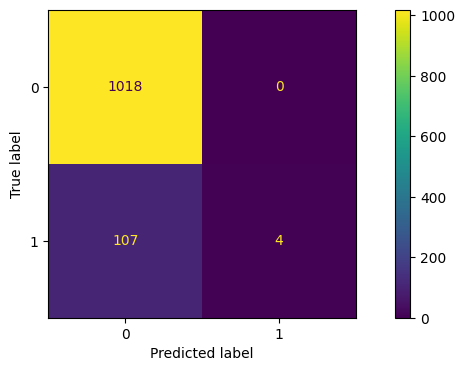

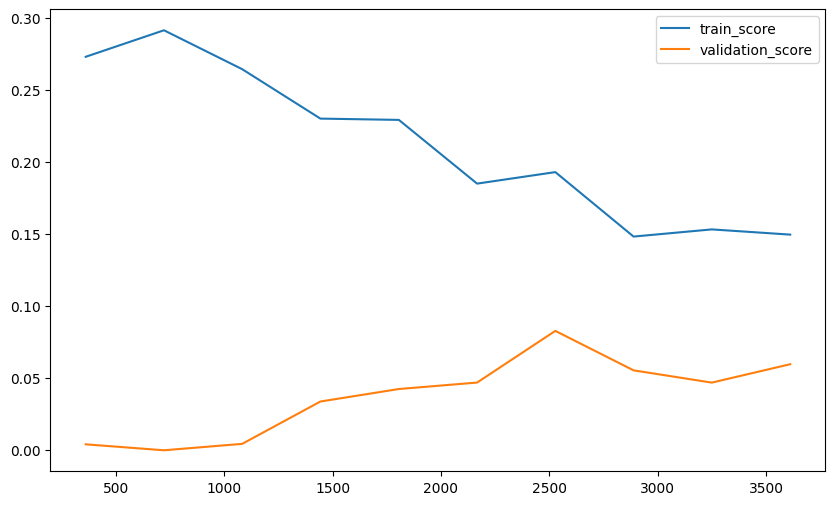

******************************************************************************************
KNN
******************************************************************************************
[[1016    2]
 [ 104    7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.78      0.06      0.12       111

    accuracy                           0.91      1129
   macro avg       0.84      0.53      0.53      1129
weighted avg       0.89      0.91      0.87      1129



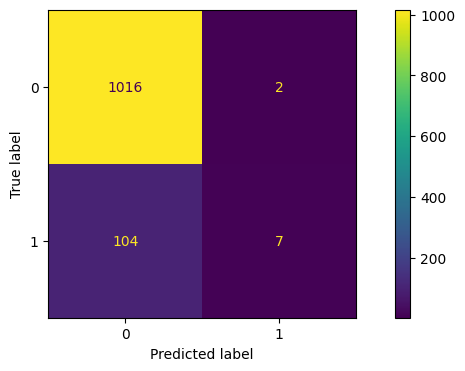

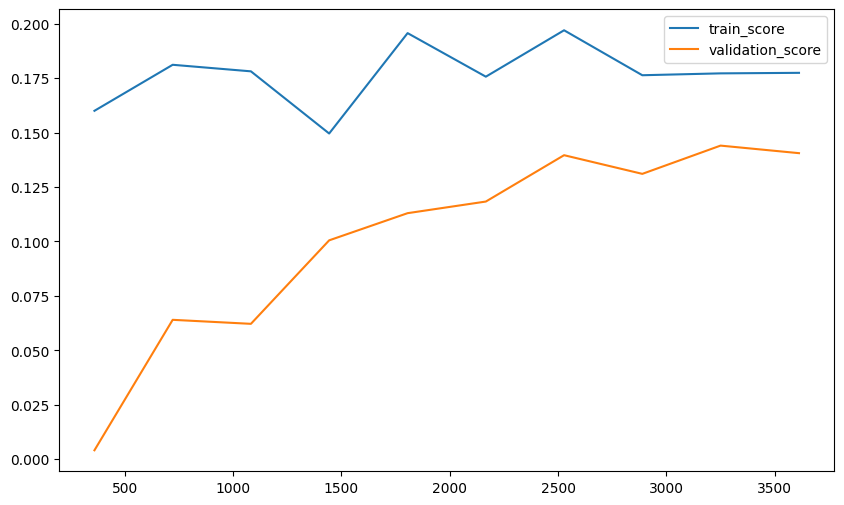

In [265]:
for name, model in list_of_models.items():
    print('*' *90)
    print(name)
    print('*' *90)
    evaluation(model)

<a id="section4"></a>
# Hyper-optimisation

In [266]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [267]:
hyper_params = {'svc__gamma':[1e-3, 1e-4], 
                'svc__C':[1, 10, 100, 1000]} # attention ne mettre pas d'espace

In [268]:
grid_svm = GridSearchCV(SVM, hyper_params, scoring='recall', cv=5)

In [269]:
grid_svm.fit(X_train, y_train)
print(grid_svm.best_params_)
y_pred = grid_svm.predict(X_test)
print(classification_report(y_test, y_pred)) # l'ordre est tres important sinon tous les calculs sont inversés
# dans la matrice de confusion 

{'svc__C': 100, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.83      0.05      0.09       111

    accuracy                           0.91      1129
   macro avg       0.87      0.52      0.52      1129
weighted avg       0.90      0.91      0.87      1129



[[1017    1]
 [ 106    5]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.83      0.05      0.09       111

    accuracy                           0.91      1129
   macro avg       0.87      0.52      0.52      1129
weighted avg       0.90      0.91      0.87      1129



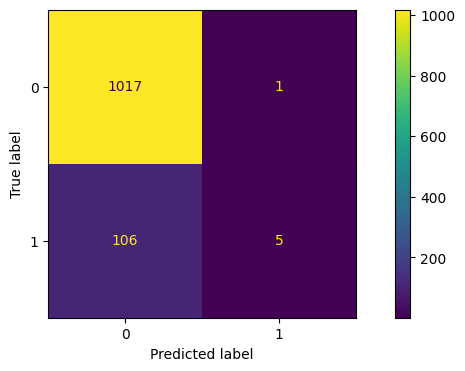

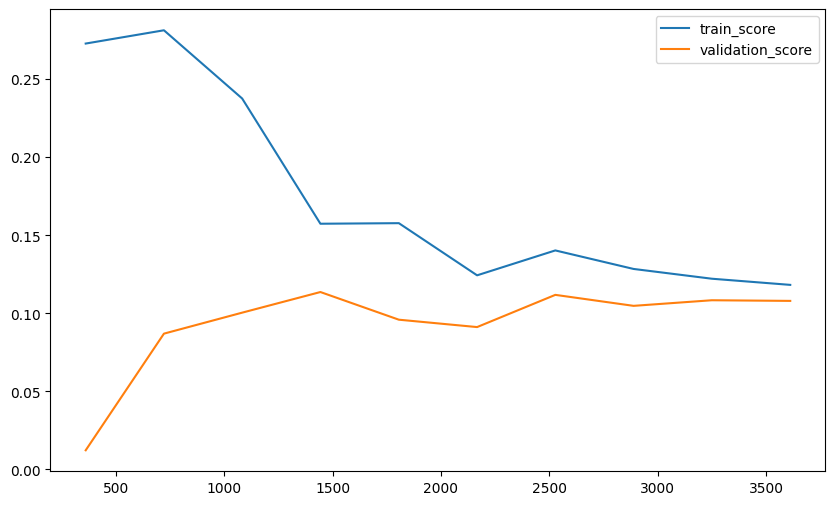

In [270]:
evaluation(grid_svm.best_estimator_)

In [271]:
hyper_params = {
    'svc__gamma':[1e-3, 1e-4], 
    'svc__C':[1, 10, 100, 1000],
    'pipeline__polynomialfeatures__degree':[2, 3],
    'pipeline__selectkbest__k':range(15, 35)
} 

In [272]:
%%time
random_grid_svm = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=5, n_iter=30)
random_grid_svm.fit(X_train, y_train)
print(random_grid_svm.best_params_)
y_pred = random_grid_svm.predict(X_test)
print(classification_report(y_test, y_pred)) #

{'svc__gamma': 0.001, 'svc__C': 100, 'pipeline__selectkbest__k': 30, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.60      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.75      0.53      0.52      1129
weighted avg       0.88      0.90      0.87      1129

CPU times: total: 2min 21s
Wall time: 2min 21s


[[1014    4]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1018
           1       0.60      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.75      0.53      0.52      1129
weighted avg       0.88      0.90      0.87      1129



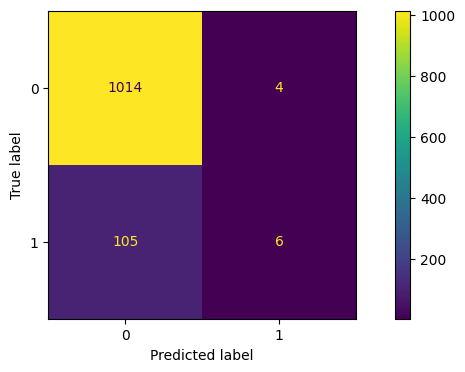

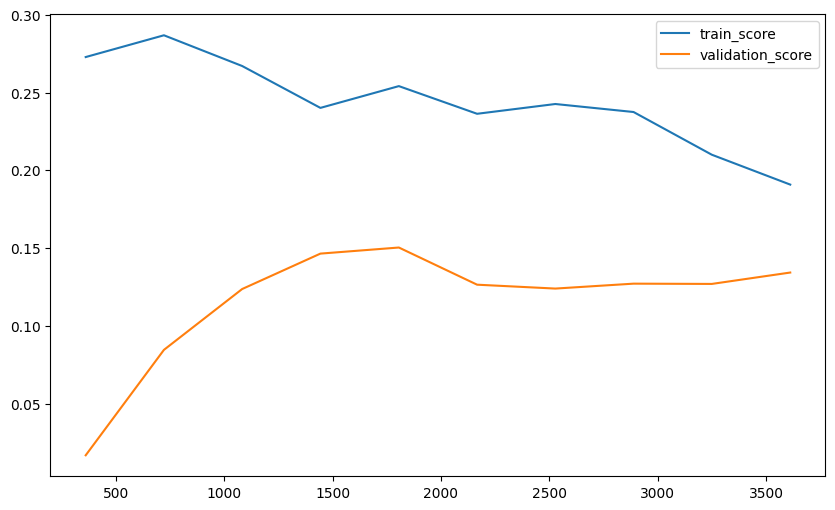

In [273]:
evaluation(random_grid_svm.best_estimator_)

## Hyper-optimisation: RandomForest

In [274]:
categorical_features = categorical_features[1:]

In [275]:
categorical_features

Index(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test',
       'hospitalisation'],
      dtype='object')

In [276]:
numeric_features

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [277]:
# pipelines for pre-processing 

# ([categoricalPipeline,numericPipeline], SelectKBest(f_classif, k=70))
# preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

categoricalPipeline = make_pipeline(
    SimpleImputer(missing_values=pd.NA, strategy='most_frequent'),
    # PolynomialFeatures(2, include_bias=False),
)

numericPipeline = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), 
    # KNNImputer(n_neighbors=3),
    # MinMaxScaler()
    # PolynomialFeatures(4, include_bias=False),
    StandardScaler()
)

preprocessor = make_column_transformer(
    (categoricalPipeline, categorical_features),
    (numericPipeline, numeric_features),
)

# PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=70)

# model
random_forest_composite_model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=200, random_state=0))

adaboost_composite_model = make_pipeline(preprocessor, AdaBoostClassifier(DecisionTreeClassifier(max_depth=100), random_state=0))

In [278]:
random_forest_composite_model 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent'))]),
                                                  Index(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial V...
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=0))])

In [279]:
adaboost_composite_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent'))]),
                                                  Index(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial V...
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object'))])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=100),
                                    random_state=0))])

[[1018    0]
 [ 107    4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       1.00      0.04      0.07       111

    accuracy                           0.91      1129
   macro avg       0.95      0.52      0.51      1129
weighted avg       0.91      0.91      0.86      1129



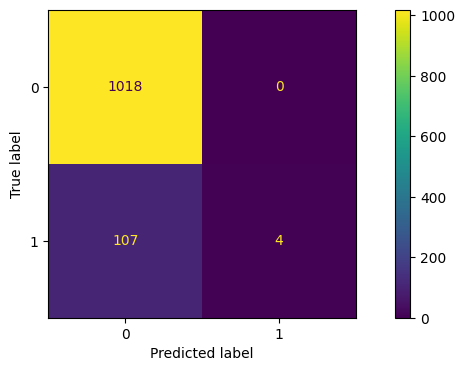

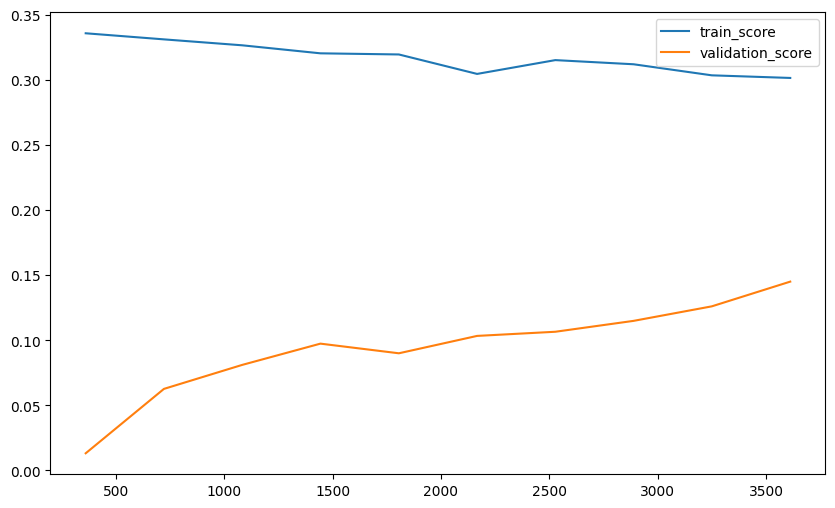

CPU times: total: 24.1 s
Wall time: 24.1 s


In [280]:
%%time
evaluation(random_forest_composite_model)

In [281]:
# %%time
# evaluation(adaboost_composite_model)

In [282]:
random_forest_composite_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent'))]),
                                                  Index(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial V...
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=0))])

In [283]:
print(random_forest_composite_model.steps)

[('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(missing_values=<NA>,
                                                                strategy='most_frequent'))]),
                                 Index(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Para...
                                                  StandardScaler())]),
                                 Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophi

In [284]:
hyper_params = {
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000]
}

In [285]:
%%time
random_grid_random_forest_composite_model = RandomizedSearchCV(
    random_forest_composite_model, 
    hyper_params, 
    scoring='recall', 
    cv=5, 
    n_iter=20
)

random_grid_random_forest_composite_model.fit(X_train, y_train)
print(random_grid_random_forest_composite_model.best_params_)
y_pred = random_grid_random_forest_composite_model.predict(X_test)
print(classification_report(y_test, y_pred)) #

{'randomforestclassifier__n_estimators': 600, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__bootstrap': False}
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       1.00      0.04      0.07       111

    accuracy                           0.91      1129
   macro avg       0.95      0.52      0.51      1129
weighted avg       0.91      0.91      0.86      1129

CPU times: total: 2min 43s
Wall time: 2min 43s


[[1018    0]
 [ 107    4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       1.00      0.04      0.07       111

    accuracy                           0.91      1129
   macro avg       0.95      0.52      0.51      1129
weighted avg       0.91      0.91      0.86      1129



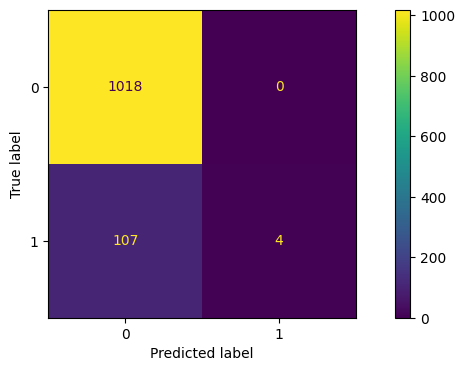

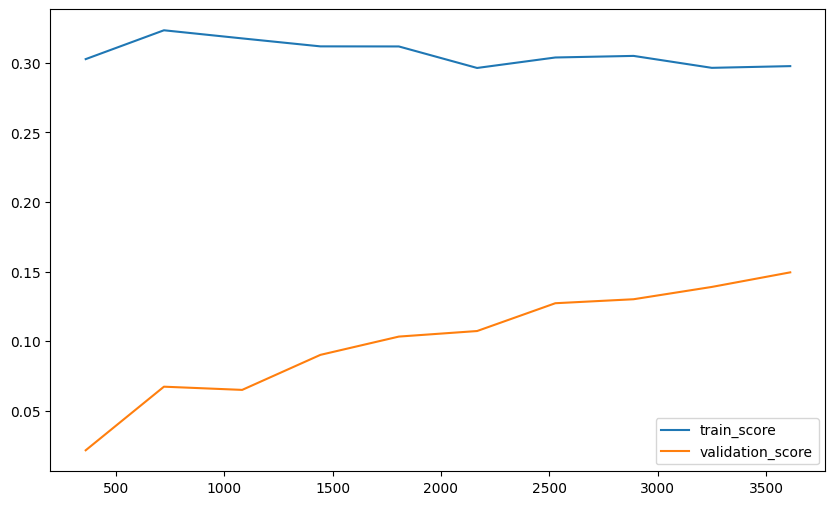

In [286]:
evaluation(random_grid_random_forest_composite_model.best_estimator_)

## Gradient Boosting 

In [287]:
gradient_boosting_composite_model = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(n_estimators=300, learning_rate=1e5, max_depth=10, random_state=0)
)

In [288]:
gradient_boosting_composite_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent'))]),
                                                  Index(['Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Respiratory Syncytial V...
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object'))])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=100000.0,
                                            max_depth=10, n_estimators=300,
                                            random_state=0))])

[[292 726]
 [ 13  98]]
              precision    recall  f1-score   support

           0       0.96      0.29      0.44      1018
           1       0.12      0.88      0.21       111

    accuracy                           0.35      1129
   macro avg       0.54      0.58      0.33      1129
weighted avg       0.87      0.35      0.42      1129



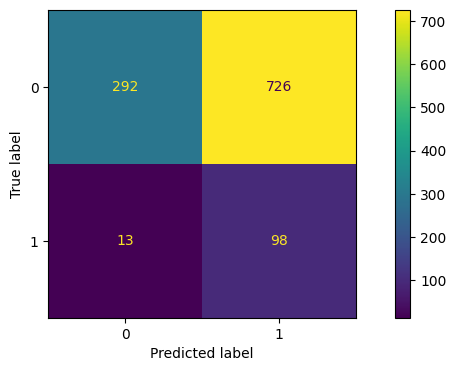

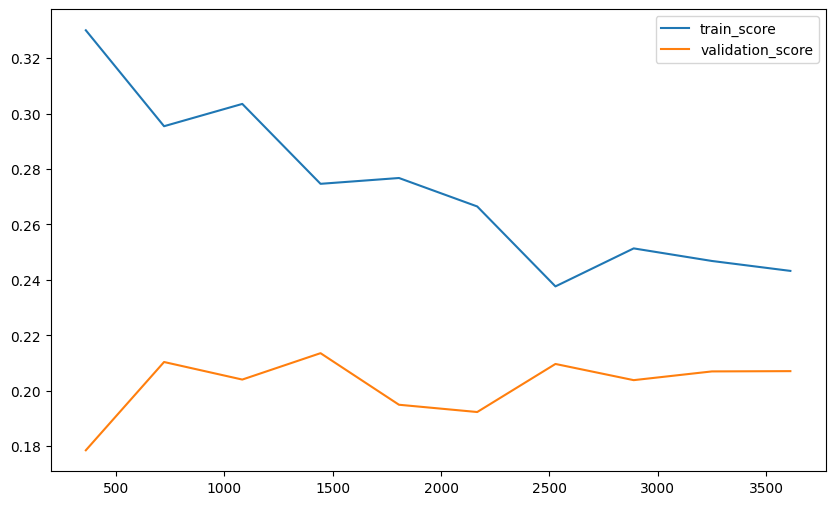

CPU times: total: 1min 5s
Wall time: 1min 5s


In [289]:
%%time
evaluation(gradient_boosting_composite_model)

[[292 726]
 [ 13  98]]
              precision    recall  f1-score   support

           0       0.96      0.29      0.44      1018
           1       0.12      0.88      0.21       111

    accuracy                           0.35      1129
   macro avg       0.54      0.58      0.33      1129
weighted avg       0.87      0.35      0.42      1129



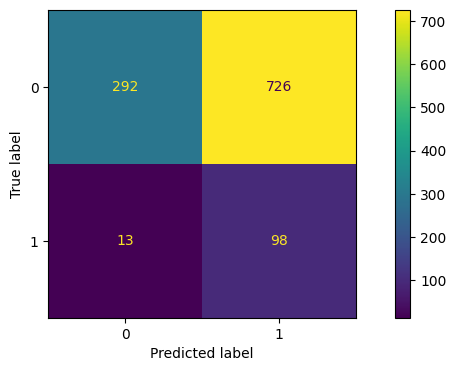

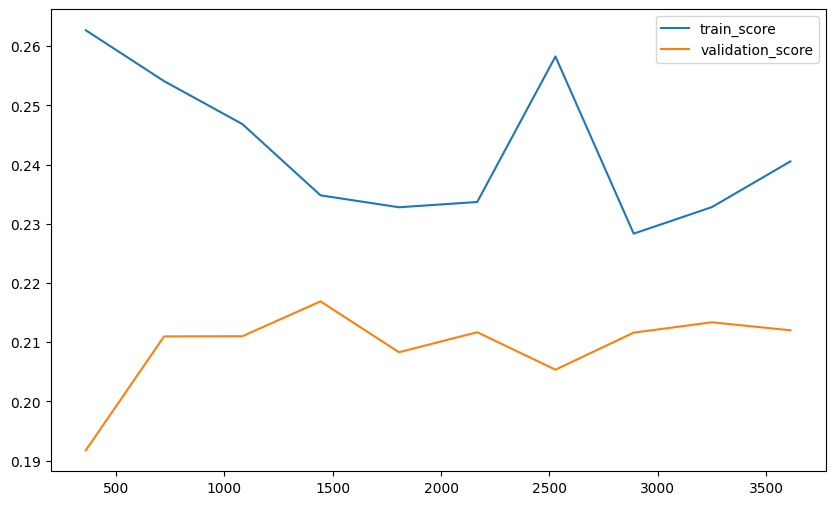

CPU times: total: 22.9 s
Wall time: 23 s


In [290]:
%%time

gradient_boosting_composite_model = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(n_estimators=100, learning_rate=1e3, max_depth=10, random_state=0)
)
evaluation(gradient_boosting_composite_model)

[[252 766]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.97      0.25      0.39      1018
           1       0.12      0.92      0.21       111

    accuracy                           0.31      1129
   macro avg       0.54      0.58      0.30      1129
weighted avg       0.88      0.31      0.38      1129



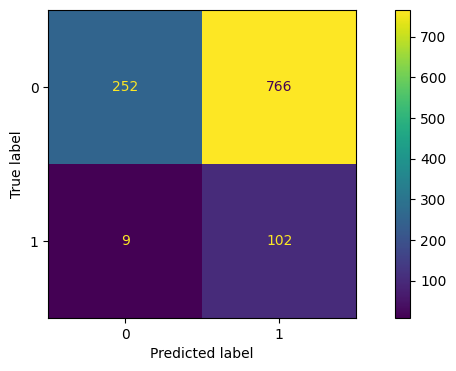

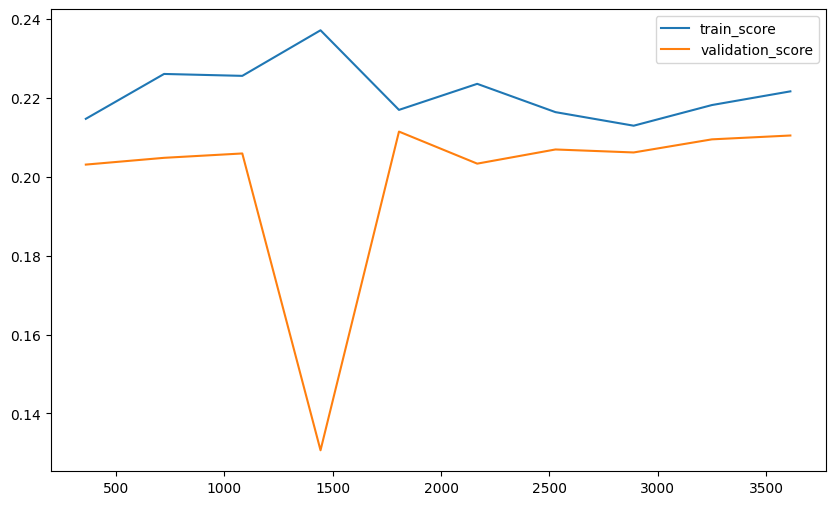

CPU times: total: 9.86 s
Wall time: 9.86 s


In [291]:
%%time

gradient_boosting_composite_model = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(n_estimators=50, learning_rate=1e3, max_depth=5, random_state=0)
)
evaluation(gradient_boosting_composite_model)

# Exercice:
Faire une hyper-optimisation de `gradient_boosting_composite_model`

# Courbe Précision / Recalll 
# seuil de la frontière de décision 
La fonction `precision_recall_curve` permet de visualiser la future précision ou bien la future sensiblité de votre modèle en fonction d'un seuil de précision que vous allez définir.

In [292]:
# random_grid_random_forest_composite_model.best_estimator_.decision_function

In [293]:
precision, recall, threshold = \
precision_recall_curve(y_test, random_grid_random_forest_composite_model.best_estimator_.decision_function(X_test))

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()
plt.show()

In [ ]:
threshold

In [ ]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = final_model(random_grid_random_forest_composite_model.best_estimator_, X_test, threshold=-1)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)